In [1]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import wordcloud
import string
from collections import Counter
from datetime import date
from sklearn.model_selection import train_test_split

In [2]:
client = pymongo.MongoClient('localhost',27017)
scrapy= client['scrapynew']
stackoverflow = scrapy['stackoverflow']
data = pd.DataFrame(stackoverflow.find())

In [3]:
#The loading data also use the follow code to export as csv
#data.to_csv('Stackoverflowpython.csv')
data

,_id,questions,votes,answers,views,links,questionsbody,questionstag,questionstime
0,question-summary-231767,[What does the “yield” keyword do?],[9712],[38],"[2,122,124 views]",[/questions/231767/what-does-the-yield-keyword...,[\r\n What is the use of the yield ...,[tags t-python t-iterator t-generator t-yield ...,[2008-10-23 22:21:11Z]
1,question-summary-394809,[Does Python have a ternary conditional operat...,[5639],[23],"[1,806,936 views]",[/questions/394809/does-python-have-a-ternary-...,[\r\n If Python does not have a ter...,[tags t-python t-operators t-ternary-operator ...,[This post is community owned as of Jan 12 '13...
2,question-summary-419163,[What does if __name__ == “__main__”: do?],[5597],[29],"[2,636,793 views]",[/questions/419163/what-does-if-name-main-do],[\r\n What does the if __name__ == ...,[tags t-python t-namespaces t-main t-python-mo...,[2009-01-07 04:11:00Z]
3,question-summary-100003,[What are metaclasses in Python?],[5443],[16],"[753,627 views]",[/questions/100003/what-are-metaclasses-in-pyt...,[\r\n What are metaclasses and what...,[tags t-python t-oop t-metaclass t-python-data...,[2008-09-19 06:10:46Z]
4,question-summary-82831,[How do I check whether a file exists without ...,[5321],[37],"[3,732,357 views]",[/questions/82831/how-do-i-check-whether-a-fil...,[\r\n How do I see if a file exists...,[tags t-python t-file t-file-exists],[2008-09-17 12:55:00Z]
...,...,...,...,...,...,...,...,...,...
1305232,question-summary-39337756,[Why Python scope my variable outside my funct...,[-7],[1],[64 views],[/questions/39337756/why-python-scope-my-varia...,[\r\n i start with Python. I like t...,[tags t-python t-python-3ûx],[2016-09-05 21:13:26Z]
1305233,question-summary-39077499,"[Python, take value of a list from an input]",[-7],[1],[61 views],[/questions/39077499/python-take-value-of-a-li...,"[\r\n Hi guys i'm Learning python, ...",[tags t-python],[2016-08-22 10:43:48Z]
1305234,question-summary-38818484,[Python Installing issu],[-7],[1],[61 views],[/questions/38818484/python-installing-issu],[\r\n I reinstalled it many times b...,[tags t-python t-installer],[2016-08-07 20:56:29Z]
1305235,question-summary-38639217,[Python : IndexError: list index out of range],[-7],[1],[207 views],[/questions/38639217/python-indexerror-list-in...,[\r\n I'm relatively new to python....,[tags t-python],[2016-07-28 14:22:44Z]


In [4]:
#part of data cleaning and processing
df3 = data.rename(columns = {'_id':'id'}) 

In [5]:
#afraid that may still have duplicate data
df=df3.drop_duplicates(subset='id', keep='last', inplace=False)
#we don't use links now
del df['links']

In [6]:
df

,id,questions,votes,answers,views,questionsbody,questionstag,questionstime
0,question-summary-231767,[What does the “yield” keyword do?],[9712],[38],"[2,122,124 views]",[\r\n What is the use of the yield ...,[tags t-python t-iterator t-generator t-yield ...,[2008-10-23 22:21:11Z]
1,question-summary-394809,[Does Python have a ternary conditional operat...,[5639],[23],"[1,806,936 views]",[\r\n If Python does not have a ter...,[tags t-python t-operators t-ternary-operator ...,[This post is community owned as of Jan 12 '13...
2,question-summary-419163,[What does if __name__ == “__main__”: do?],[5597],[29],"[2,636,793 views]",[\r\n What does the if __name__ == ...,[tags t-python t-namespaces t-main t-python-mo...,[2009-01-07 04:11:00Z]
3,question-summary-100003,[What are metaclasses in Python?],[5443],[16],"[753,627 views]",[\r\n What are metaclasses and what...,[tags t-python t-oop t-metaclass t-python-data...,[2008-09-19 06:10:46Z]
4,question-summary-82831,[How do I check whether a file exists without ...,[5321],[37],"[3,732,357 views]",[\r\n How do I see if a file exists...,[tags t-python t-file t-file-exists],[2008-09-17 12:55:00Z]
...,...,...,...,...,...,...,...,...
1305232,question-summary-39337756,[Why Python scope my variable outside my funct...,[-7],[1],[64 views],[\r\n i start with Python. I like t...,[tags t-python t-python-3ûx],[2016-09-05 21:13:26Z]
1305233,question-summary-39077499,"[Python, take value of a list from an input]",[-7],[1],[61 views],"[\r\n Hi guys i'm Learning python, ...",[tags t-python],[2016-08-22 10:43:48Z]
1305234,question-summary-38818484,[Python Installing issu],[-7],[1],[61 views],[\r\n I reinstalled it many times b...,[tags t-python t-installer],[2016-08-07 20:56:29Z]
1305235,question-summary-38639217,[Python : IndexError: list index out of range],[-7],[1],[207 views],[\r\n I'm relatively new to python....,[tags t-python],[2016-07-28 14:22:44Z]


In [7]:
df['id']=df['id'].str.slice(17,)
df

,id,questions,votes,answers,views,questionsbody,questionstag,questionstime
0,231767,[What does the “yield” keyword do?],[9712],[38],"[2,122,124 views]",[\r\n What is the use of the yield ...,[tags t-python t-iterator t-generator t-yield ...,[2008-10-23 22:21:11Z]
1,394809,[Does Python have a ternary conditional operat...,[5639],[23],"[1,806,936 views]",[\r\n If Python does not have a ter...,[tags t-python t-operators t-ternary-operator ...,[This post is community owned as of Jan 12 '13...
2,419163,[What does if __name__ == “__main__”: do?],[5597],[29],"[2,636,793 views]",[\r\n What does the if __name__ == ...,[tags t-python t-namespaces t-main t-python-mo...,[2009-01-07 04:11:00Z]
3,100003,[What are metaclasses in Python?],[5443],[16],"[753,627 views]",[\r\n What are metaclasses and what...,[tags t-python t-oop t-metaclass t-python-data...,[2008-09-19 06:10:46Z]
4,82831,[How do I check whether a file exists without ...,[5321],[37],"[3,732,357 views]",[\r\n How do I see if a file exists...,[tags t-python t-file t-file-exists],[2008-09-17 12:55:00Z]
...,...,...,...,...,...,...,...,...
1305232,39337756,[Why Python scope my variable outside my funct...,[-7],[1],[64 views],[\r\n i start with Python. I like t...,[tags t-python t-python-3ûx],[2016-09-05 21:13:26Z]
1305233,39077499,"[Python, take value of a list from an input]",[-7],[1],[61 views],"[\r\n Hi guys i'm Learning python, ...",[tags t-python],[2016-08-22 10:43:48Z]
1305234,38818484,[Python Installing issu],[-7],[1],[61 views],[\r\n I reinstalled it many times b...,[tags t-python t-installer],[2016-08-07 20:56:29Z]
1305235,38639217,[Python : IndexError: list index out of range],[-7],[1],[207 views],[\r\n I'm relatively new to python....,[tags t-python],[2016-07-28 14:22:44Z]


In [8]:
#df.votes = df.votes.apply(lambda x: x.replace('[]','')) remove the []
df.views = df.views.apply(lambda x: str(x).replace('[','').replace("]",""))
df.votes = df.votes.apply(lambda x: str(x).replace('[','').replace("]",""))
df.answers = df.answers.apply(lambda x: str(x).replace('[','').replace("]",""))
df.questionstag = df.questionstag.apply(lambda x: str(x).replace('[','').replace("]",""))
df.questionstime = df.questionstime.apply(lambda x: str(x).replace('[','').replace("]",""))
df.questions = df.questions.apply(lambda x: str(x).replace('[','').replace("]",""))
df.questionsbody = df.questionsbody.apply(lambda x: str(x).replace('[','').replace("]",""))

In [ ]:
df

In [9]:
df.views = df.views.apply(lambda x: str(x).replace("'",""))
df.votes = df.votes.apply(lambda x: str(x).replace("'",""))
df.answers = df.answers.apply(lambda x: str(x).replace("'",""))
df.questions = df.questions.apply(lambda x: str(x).replace("'",""))
df.questionstag = df.questionstag.apply(lambda x: str(x).replace("'",""))
df.questionstime = df.questionstime.apply(lambda x: str(x).replace("'",""))
df.questionsbody = df.questionsbody.apply(lambda x: str(x).replace("'",""))
df.questionsbody = df.questionsbody.apply(lambda x: str(x).replace('"',""))
df
#df.dtypes

,id,questions,votes,answers,views,questionsbody,questionstag,questionstime
0,231767,What does the “yield” keyword do?,9712,38,"2,122,124 views",\r\n What is the use of the yield k...,tags t-python t-iterator t-generator t-yield t...,2008-10-23 22:21:11Z
1,394809,Does Python have a ternary conditional operator?,5639,23,"1,806,936 views",\r\n If Python does not have a tern...,tags t-python t-operators t-ternary-operator t...,"""This post is community owned as of Jan 12 13 ..."
2,419163,What does if __name__ == “__main__”: do?,5597,29,"2,636,793 views",\r\n What does the if __name__ == _...,tags t-python t-namespaces t-main t-python-mod...,2009-01-07 04:11:00Z
3,100003,What are metaclasses in Python?,5443,16,"753,627 views",\r\n What are metaclasses and what ...,tags t-python t-oop t-metaclass t-python-datam...,2008-09-19 06:10:46Z
4,82831,How do I check whether a file exists without e...,5321,37,"3,732,357 views",\r\n How do I see if a file exists ...,tags t-python t-file t-file-exists,2008-09-17 12:55:00Z
...,...,...,...,...,...,...,...,...
1305232,39337756,Why Python scope my variable outside my function?,-7,1,64 views,\r\n i start with Python. I like to...,tags t-python t-python-3ûx,2016-09-05 21:13:26Z
1305233,39077499,"Python, take value of a list from an input",-7,1,61 views,"\r\n Hi guys i\m Learning python, i...",tags t-python,2016-08-22 10:43:48Z
1305234,38818484,Python Installing issu,-7,1,61 views,\r\n I reinstalled it many times bu...,tags t-python t-installer,2016-08-07 20:56:29Z
1305235,38639217,Python : IndexError: list index out of range,-7,1,207 views,\r\n Im relatively new to python. I...,tags t-python,2016-07-28 14:22:44Z


In [10]:
df['views']=df['views'].str.slice(0,-5)
df.questionsbody=df.questionsbody.str.slice(5,)
df
#df.answers = df.answers.apply(lambda x: str(x).replace(",",""))
#df.views = df.views.str.replace(r',', '')

,id,questions,votes,answers,views,questionsbody,questionstag,questionstime
0,231767,What does the “yield” keyword do?,9712,38,"2,122,124",What is the use of the yield keywor...,tags t-python t-iterator t-generator t-yield t...,2008-10-23 22:21:11Z
1,394809,Does Python have a ternary conditional operator?,5639,23,"1,806,936",If Python does not have a ternary c...,tags t-python t-operators t-ternary-operator t...,"""This post is community owned as of Jan 12 13 ..."
2,419163,What does if __name__ == “__main__”: do?,5597,29,"2,636,793",What does the if __name__ == __main...,tags t-python t-namespaces t-main t-python-mod...,2009-01-07 04:11:00Z
3,100003,What are metaclasses in Python?,5443,16,"753,627",What are metaclasses and what do we...,tags t-python t-oop t-metaclass t-python-datam...,2008-09-19 06:10:46Z
4,82831,How do I check whether a file exists without e...,5321,37,"3,732,357",How do I see if a file exists or no...,tags t-python t-file t-file-exists,2008-09-17 12:55:00Z
...,...,...,...,...,...,...,...,...
1305232,39337756,Why Python scope my variable outside my function?,-7,1,64,i start with Python. I like to try ...,tags t-python t-python-3ûx,2016-09-05 21:13:26Z
1305233,39077499,"Python, take value of a list from an input",-7,1,61,"Hi guys i\m Learning python, i have...",tags t-python,2016-08-22 10:43:48Z
1305234,38818484,Python Installing issu,-7,1,61,I reinstalled it many times but not...,tags t-python t-installer,2016-08-07 20:56:29Z
1305235,38639217,Python : IndexError: list index out of range,-7,1,207,Im relatively new to python. I was ...,tags t-python,2016-07-28 14:22:44Z


In [11]:
#remove the "," in views
df.views = df.views.apply(lambda x: str(x).replace(",",""))

#df['questionsbody'][0]

In [12]:
#change some columns to number
df['id'] = pd.to_numeric(df['id']) 
df['votes'] = pd.to_numeric(df['votes']) 
df['answers'] = pd.to_numeric(df['answers']) 
df['views'] = pd.to_numeric(df['views']) 

In [13]:
df = df.rename(columns = {'questionstime':'date'}) 
df

,id,questions,votes,answers,views,questionsbody,questionstag,date
0,231767,What does the “yield” keyword do?,9712,38,2122124,What is the use of the yield keywor...,tags t-python t-iterator t-generator t-yield t...,2008-10-23 22:21:11Z
1,394809,Does Python have a ternary conditional operator?,5639,23,1806936,If Python does not have a ternary c...,tags t-python t-operators t-ternary-operator t...,"""This post is community owned as of Jan 12 13 ..."
2,419163,What does if __name__ == “__main__”: do?,5597,29,2636793,What does the if __name__ == __main...,tags t-python t-namespaces t-main t-python-mod...,2009-01-07 04:11:00Z
3,100003,What are metaclasses in Python?,5443,16,753627,What are metaclasses and what do we...,tags t-python t-oop t-metaclass t-python-datam...,2008-09-19 06:10:46Z
4,82831,How do I check whether a file exists without e...,5321,37,3732357,How do I see if a file exists or no...,tags t-python t-file t-file-exists,2008-09-17 12:55:00Z
...,...,...,...,...,...,...,...,...
1305232,39337756,Why Python scope my variable outside my function?,-7,1,64,i start with Python. I like to try ...,tags t-python t-python-3ûx,2016-09-05 21:13:26Z
1305233,39077499,"Python, take value of a list from an input",-7,1,61,"Hi guys i\m Learning python, i have...",tags t-python,2016-08-22 10:43:48Z
1305234,38818484,Python Installing issu,-7,1,61,I reinstalled it many times but not...,tags t-python t-installer,2016-08-07 20:56:29Z
1305235,38639217,Python : IndexError: list index out of range,-7,1,207,Im relatively new to python. I was ...,tags t-python,2016-07-28 14:22:44Z


In [14]:
#I don't know why the second row's time was so strange maybe the website set it.
#this kinds about 1k questions in date related analyse we drop it.
df['date']=df['date'].str.slice(0,10)
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d',errors='coerce')

In [15]:
dfdate=df.dropna(subset=['date'])
dfdate=dfdate.sort_values(by = 'date')
dfdate

,id,questions,votes,answers,views,questionsbody,questionstag,date
10329,469,How can I find the full path to a font from it...,39,4,2869,I am using the Photoshops javascrip...,tags t-python t-macos t-fonts t-photoshop,2008-08-02
5344,337,XML Processing in Python closed,68,12,7926,I am about to build a piece of a pr...,tags t-python t-xml,2008-08-02
9782,502,Get a preview JPEG of a PDF on Windows?,41,3,14157,I have a cross-platform (Python) ap...,tags t-python t-windows t-image t-pdf,2008-08-02
6687,535,Continuous Integration System for a Python Cod...,56,7,8825,I am starting to work on a hobby pr...,tags t-python t-continuous-integration t-extre...,2008-08-02
11575,766,Python and MySQL,35,6,3107,I can get Python to work with Postg...,tags t-python t-mysql t-postgresql t-bpgsql,2008-08-03
...,...,...,...,...,...,...,...,...
1226312,59384009,Python ModuleNotFound urllib2,-1,0,24,I am currently running Python 3.8.0...,tags t-python t-python-3ûx,2019-12-18
1226313,59383978,How to simplify program PYTHON closed,-1,0,24,I have an assignment where I have t...,tags t-python t-simplify,2019-12-18
1226315,59383945,Go to next page when webscraping Google,-1,1,29,I am trying to web scrape the list ...,tags t-python t-python-3ûx t-web-scraping t-be...,2019-12-18
1226316,59383832,how to pass arguments to stats models formula ...,-1,0,9,is it possible to pass arguments to...,tags t-python t-parameter-passing t-formula t-...,2019-12-18


In [16]:
#remove "tages"  and "t-"in questiontag
df['questionstag']=df['questionstag'].str.slice(5,)
df.questionstag = df.questionstag.apply(lambda x: str(x).replace("t-",""))
df

,id,questions,votes,answers,views,questionsbody,questionstag,date
0,231767,What does the “yield” keyword do?,9712,38,2122124,What is the use of the yield keywor...,python iterator generator yield coroutine,2008-10-23
1,394809,Does Python have a ternary conditional operator?,5639,23,1806936,If Python does not have a ternary c...,python operators ternary-operator conditional-...,NaT
2,419163,What does if __name__ == “__main__”: do?,5597,29,2636793,What does the if __name__ == __main...,python namespaces main python-module idioms,2009-01-07
3,100003,What are metaclasses in Python?,5443,16,753627,What are metaclasses and what do we...,python oop metaclass python-datamodel,2008-09-19
4,82831,How do I check whether a file exists without e...,5321,37,3732357,How do I see if a file exists or no...,python file file-exists,2008-09-17
...,...,...,...,...,...,...,...,...
1305232,39337756,Why Python scope my variable outside my function?,-7,1,64,i start with Python. I like to try ...,python python-3ûx,2016-09-05
1305233,39077499,"Python, take value of a list from an input",-7,1,61,"Hi guys i\m Learning python, i have...",python,2016-08-22
1305234,38818484,Python Installing issu,-7,1,61,I reinstalled it many times but not...,python installer,2016-08-07
1305235,38639217,Python : IndexError: list index out of range,-7,1,207,Im relatively new to python. I was ...,python,2016-07-28


In [17]:
#the 2018 and 2019 was not complete so we select 2009-2018 to analyse year and month related
dfyear=dfdate.set_index('date')
dfyear=dfyear['2009-01-01':'2018-12-31']
dfyear

,id,questions,votes,answers,views,questionsbody,questionstag
date,,,,,,,
2009-01-01,405374,Python source code collection closed,3,7,30988,Does anyone know anywhere theres a ...,tags t-python
2009-01-01,405282,Many instances of a class,4,5,5207,I am trying to write a life simulat...,tags t-python t-class t-object t-multiple-inst...
2009-01-01,405106,"""I cant but help get the idea Im doing it all ...",2,4,433,All of the questions that Ive asked...,tags t-php t-python t-project t-project-planning
2009-01-01,404795,LBYL vs EAFP in Java?,59,5,18175,I was recently teaching myself Pyth...,tags t-java t-python t-error-handling t-idioms
2009-01-01,405617,insert two values from an mysql table into ano...,-2,2,1771,Im having a small problem with a Py...,tags t-python t-mysql t-database
...,...,...,...,...,...,...,...
2018-12-31,53988018,`setCalculateVarImportance` changes result in ...,2,0,42,Looking at the documentation for cv...,tags t-python t-opencv t-machine-learning t-ra...
2018-12-31,53982611,Python debugger with line edition in a program...,4,1,135,To add an ad hoc debugger breakpoin...,tags t-python t-python-3ûx t-stdin t-readline ...
2018-12-31,53986221,Adding variable arguments to a zip in Python d...,2,0,23,"When trying to make a variable zip,...",tags t-python t-dictionary t-variables t-zip


In [18]:
dfyear=dfyear.reset_index()
dfyear

,date,id,questions,votes,answers,views,questionsbody,questionstag
0,2009-01-01,405374,Python source code collection closed,3,7,30988,Does anyone know anywhere theres a ...,tags t-python
1,2009-01-01,405282,Many instances of a class,4,5,5207,I am trying to write a life simulat...,tags t-python t-class t-object t-multiple-inst...
2,2009-01-01,405106,"""I cant but help get the idea Im doing it all ...",2,4,433,All of the questions that Ive asked...,tags t-php t-python t-project t-project-planning
3,2009-01-01,404795,LBYL vs EAFP in Java?,59,5,18175,I was recently teaching myself Pyth...,tags t-java t-python t-error-handling t-idioms
4,2009-01-01,405617,insert two values from an mysql table into ano...,-2,2,1771,Im having a small problem with a Py...,tags t-python t-mysql t-database
...,...,...,...,...,...,...,...,...
1052863,2018-12-31,53988018,`setCalculateVarImportance` changes result in ...,2,0,42,Looking at the documentation for cv...,tags t-python t-opencv t-machine-learning t-ra...
1052864,2018-12-31,53982611,Python debugger with line edition in a program...,4,1,135,To add an ad hoc debugger breakpoin...,tags t-python t-python-3ûx t-stdin t-readline ...
1052865,2018-12-31,53986221,Adding variable arguments to a zip in Python d...,2,0,23,"When trying to make a variable zip,...",tags t-python t-dictionary t-variables t-zip
1052866,2018-12-31,53986190,Running scipy optimize yields attribute-error,2,1,49,Im trying to use scipy optimize wit...,tags t-python


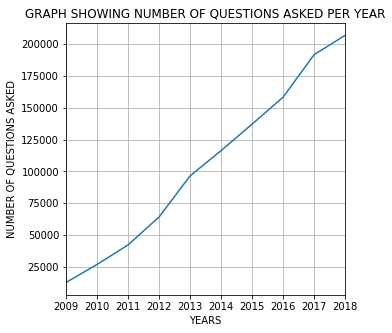

In [19]:
#Question asked in year  we can see that there are more and more python questions asked in trend(2009-2018)
dfyear['year'] = dfyear['date'].apply(lambda x: x.year)
series = dfyear.year.value_counts().sort_index()
#print(dfyear.resample('AS').sum().to_period('A'))
series.plot(figsize=(5,5), grid=True)
plt.xlabel("YEARS")
plt.ylabel("NUMBER OF QUESTIONS ASKED")
plt.title("GRAPH SHOWING NUMBER OF QUESTIONS ASKED PER YEAR")
plt.show()

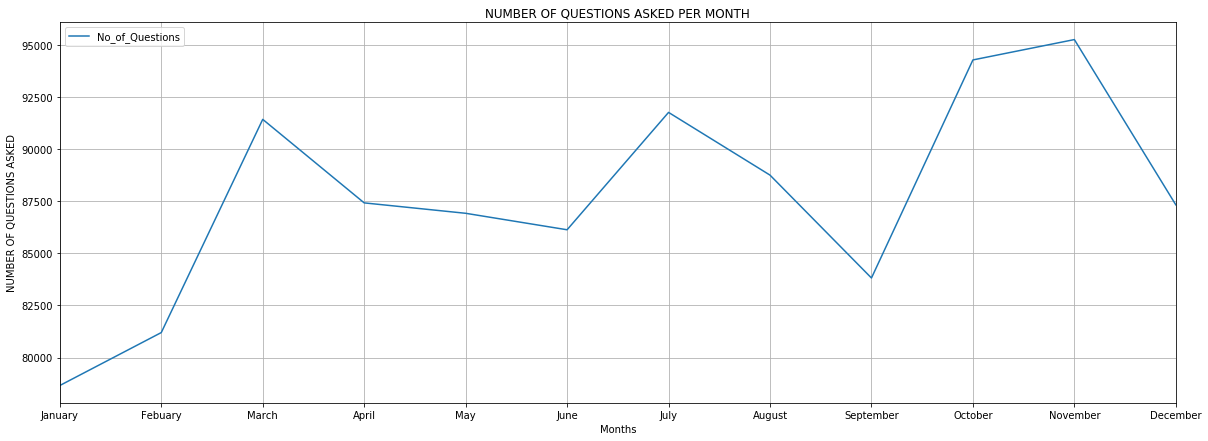

In [20]:
#Question asked in month and see which month have most python questions(2009-2018)
#we found it interesting that in March and July and November there are increase of question we guess it was a lot of students use python
# and it is time for them to finish project and January is the lowest maybe they go back home to enjoy spring festival...
look_up = ["January",
          "Febuary",
          "March",
          "April",
          "May",
          "June",
          "July",
          "August",
          "September",
          "October",
          "November",
          "December"]
monthname = pd.Series( (v for v in look_up) )
monthname.index += 1
dfyear['Month'] = dfyear['date'].apply(lambda x: x.month)
series = dfyear.Month.value_counts().sort_index()
month_wise_data = pd.concat([monthname, series], axis=1)
month_wise_data.rename(columns={0:'Months'}, inplace=True)
month_wise_data.rename(columns={'Month':'No_of_Questions'}, inplace=True)
ax = month_wise_data.plot(figsize=(20,7),grid=True)
ax.set_xticks(month_wise_data.index)
ax.set_xticklabels(month_wise_data.Months)
plt.title("NUMBER OF QUESTIONS ASKED PER MONTH")
plt.xlabel("Months")
plt.ylabel("NUMBER OF QUESTIONS ASKED")
plt.show()

In [21]:
df.sort_values("votes",ascending=False,inplace=True)
df

,id,questions,votes,answers,views,questionsbody,questionstag,date
0,231767,What does the “yield” keyword do?,9712,38,2122124,What is the use of the yield keywor...,python iterator generator yield coroutine,2008-10-23
1,394809,Does Python have a ternary conditional operator?,5639,23,1806936,If Python does not have a ternary c...,python operators ternary-operator conditional-...,NaT
2,419163,What does if __name__ == “__main__”: do?,5597,29,2636793,What does the if __name__ == __main...,python namespaces main python-module idioms,2009-01-07
3,100003,What are metaclasses in Python?,5443,16,753627,What are metaclasses and what do we...,python oop metaclass python-datamodel,2008-09-19
4,82831,How do I check whether a file exists without e...,5321,37,3732357,How do I see if a file exists or no...,python file file-exists,2008-09-17
...,...,...,...,...,...,...,...,...
1305006,39434084,Regular expression for separating strings,-7,2,47,I have the following string\r\n Lo...,python regex,2016-09-11
1305005,39532534,Why does Python call both functions?,-7,2,35,I have some problems to understand ...,python,2016-09-16
1305004,39585895,"""whats wrong with my code? countconsonant""",-7,2,47,def countConsonant (s):\n\n Coun...,python,2016-09-20
1305003,39756447,Generic Pythonic Code to Solve: 2**2**2**2**0 ...,-7,3,79,I got the python code below that so...,python generics python-3û5,2016-09-28


In [22]:
#We can see the 10 most votes (high quality) python question 
df.head(10).questions

0                    What does the “yield” keyword do?
1     Does Python have a ternary conditional operator?
2             What does if __name__ == “__main__”: do?
3                      What are metaclasses in Python?
4    How do I check whether a file exists without e...
5              Calling an external command from Python
6    How do I merge two dictionaries in a single ex...
7          How can I safely create a nested directory?
8    "Does Python have a string contains substring ...
9              How do I list all files of a directory?
Name: questions, dtype: object

C:\Users\gcw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


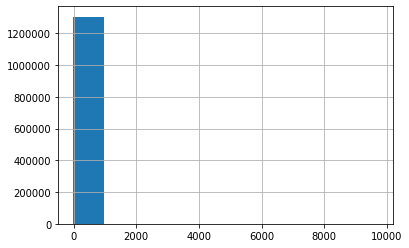

In [23]:
#We can see nearly all the questions are less than 1000 votes we consider more than 1000 is high votes questions
df["votes"].hist().get_figure().show()

In [24]:
df

,id,questions,votes,answers,views,questionsbody,questionstag,date
0,231767,What does the “yield” keyword do?,9712,38,2122124,What is the use of the yield keywor...,python iterator generator yield coroutine,2008-10-23
1,394809,Does Python have a ternary conditional operator?,5639,23,1806936,If Python does not have a ternary c...,python operators ternary-operator conditional-...,NaT
2,419163,What does if __name__ == “__main__”: do?,5597,29,2636793,What does the if __name__ == __main...,python namespaces main python-module idioms,2009-01-07
3,100003,What are metaclasses in Python?,5443,16,753627,What are metaclasses and what do we...,python oop metaclass python-datamodel,2008-09-19
4,82831,How do I check whether a file exists without e...,5321,37,3732357,How do I see if a file exists or no...,python file file-exists,2008-09-17
...,...,...,...,...,...,...,...,...
1305006,39434084,Regular expression for separating strings,-7,2,47,I have the following string\r\n Lo...,python regex,2016-09-11
1305005,39532534,Why does Python call both functions?,-7,2,35,I have some problems to understand ...,python,2016-09-16
1305004,39585895,"""whats wrong with my code? countconsonant""",-7,2,47,def countConsonant (s):\n\n Coun...,python,2016-09-20
1305003,39756447,Generic Pythonic Code to Solve: 2**2**2**2**0 ...,-7,3,79,I got the python code below that so...,python generics python-3û5,2016-09-28


In [25]:
dftag=df["questionstag"].str.split(' ', expand=True)

In [26]:
dftag = dftag.stack()
dftag

0        0        python
         1      iterator
         2     generator
         3         yield
         4     coroutine
                 ...    
1305004  0        python
1305003  0        python
         1      generics
         2    python-3û5
1305236  0        python
Length: 4080356, dtype: object

In [27]:
dftag = dftag.reset_index(level=1, drop=True)

In [28]:
dftag=dftag.value_counts()
dftag=dftag.sort_values(ascending=False)
dftag.drop('python',axis=0,inplace=True)

In [29]:
dftag1=dftag.head(10)
dftag2=dftag.head(500)
dftag1

python-3ûx    118355
pandas        111274
django        108514
numpy          60300
python-2û7     60071
list           41012
matplotlib     36671
dataframe      31250
dictionary     28703
regex          26161
dtype: int64

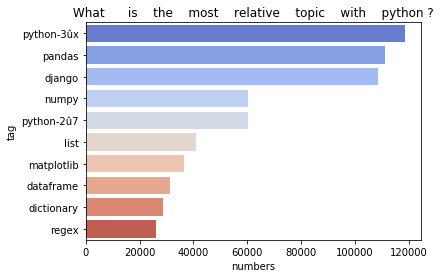

In [30]:
#Here we show the python's most 10 related question tag,pandas is really popular
dict_dftag = {'tag':dftag1.index,'numbers':dftag1.values}
df_tag = pd.DataFrame(dict_dftag)
ax = sns.barplot(x=df_tag.numbers, y=df_tag.tag,data=df_tag,palette="coolwarm").set_title(" What      is    the    most    relative    topic    with    python ? ")

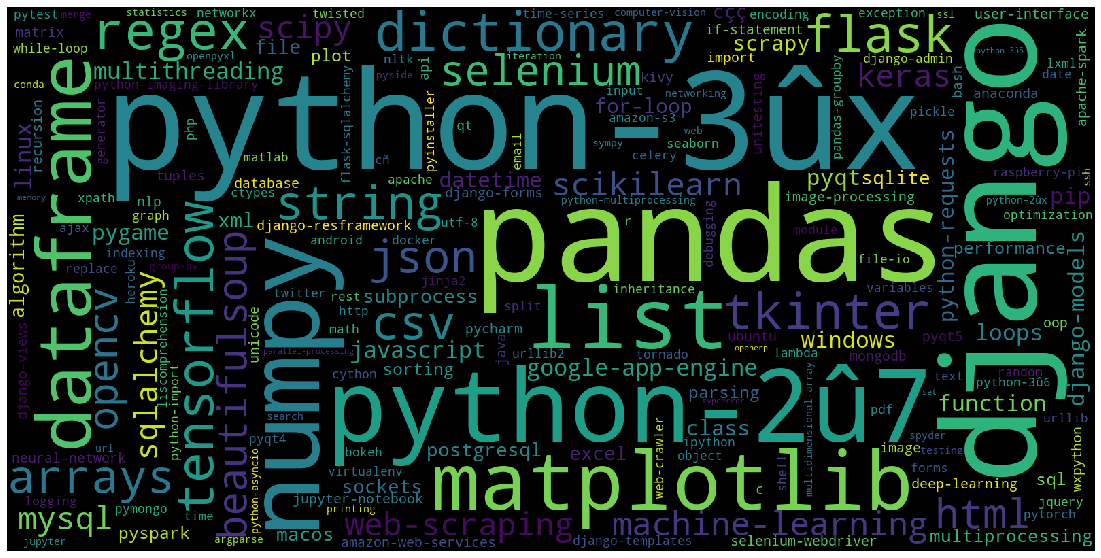

In [31]:
#Also show the most related tag as wordcloud
dict_dftag2 = {'tag':dftag2.index,'numbers':dftag2.values}
df_tag2 = pd.DataFrame(dict_dftag2)
dic = dict(zip(df_tag2['tag'], df_tag2['numbers']))
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=200,
                            width=1600,
                            height=800,
                            max_words=200,
                            relative_scaling=.5).generate_from_frequencies(dic)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.savefig('stackOverflowQuestionTitle.png')
plt.imshow(cloud)

In [32]:
#Since we aready know that most of the question votes less than 1000. We select those very high votes questions and analyse
dfhighvote=df[df["votes"]>1000]

In [33]:
dfhighvote

,id,questions,votes,answers,views,questionsbody,questionstag,date
0,231767,What does the “yield” keyword do?,9712,38,2122124,What is the use of the yield keywor...,python iterator generator yield coroutine,2008-10-23
1,394809,Does Python have a ternary conditional operator?,5639,23,1806936,If Python does not have a ternary c...,python operators ternary-operator conditional-...,NaT
2,419163,What does if __name__ == “__main__”: do?,5597,29,2636793,What does the if __name__ == __main...,python namespaces main python-module idioms,2009-01-07
3,100003,What are metaclasses in Python?,5443,16,753627,What are metaclasses and what do we...,python oop metaclass python-datamodel,2008-09-19
4,82831,How do I check whether a file exists without e...,5321,37,3732357,How do I see if a file exists or no...,python file file-exists,2008-09-17
...,...,...,...,...,...,...,...,...
128,2998215,"If Python is interpreted, what are .pyc files?",1022,9,475442,I\ve been given to understand that ...,python compiled interpreted-language pyc,2010-06-08
129,354883,How do I return multiple values from a functio...,1016,14,1110073,The canonical way to return multipl...,python coding-style return return-value,2008-12-10
131,1952464,"In Python, how do I determine if an object is ...",1009,20,416858,Is there a method like isiterable? ...,python iterable,2009-12-23
130,1534210,Use different Python version with virtualenv,1009,28,680956,I have a Debian system currently ru...,python virtualenv virtualenvwrapper,2009-10-07


In [34]:
#using sapcy in text cleaning
spacy_nlp = spacy.load('en_core_web_sm')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
spacy_stopwords.add("/")
spacy_stopwords.add("=")
spacy_stopwords.add(">")
spacy_stopwords.add("<")
spacy_stopwords.add("#")

customize_stop_words = [
    '/', '=','>','<','#','`','|','}','{','¦',';'
    
]
for w in customize_stop_words:
    spacy_nlp.vocab[w].is_stop = True

In [35]:
titleWords = []
i = 0
for word in dfhighvote.questions:
    word = word.replace(".","").replace(",","").replace(":","").replace("\"","").replace("!","").replace("?","").replace("_","").replace("*","").replace("-","").replace("'","").replace("]","").replace("[","").replace(")","").replace("(","")
    doc = spacy_nlp(word.lower())
    tokens = [token.text for token in doc if not token.is_stop]
    titleWords= titleWords + tokens

word_counter = Counter(titleWords)

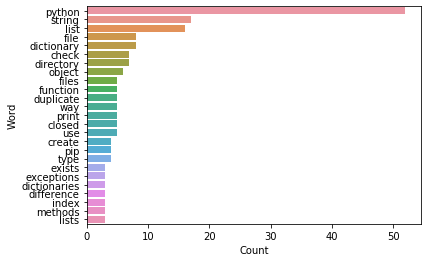

In [36]:
lst = word_counter.most_common(27)
lst1 = word_counter.most_common(202)
df13 = pd.DataFrame(lst, columns = ['Word', 'Count'])
df14 = pd.DataFrame(lst1, columns = ['Word', 'Count'])
df13=df13.drop([8])
df13=df13.drop([9])
df14=df14.drop([8])
df14=df14.drop([9])
#we  can see the high vote question are usually related with ------
ax = sns.barplot(x="Count", y="Word", data=df13)

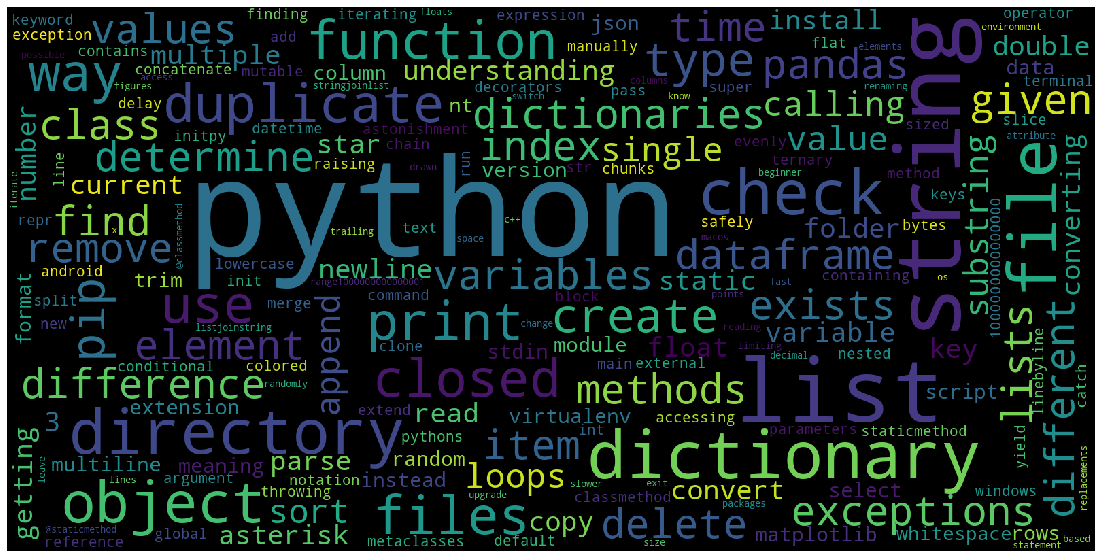

In [37]:
#Same we generate the most 200 related words with high vote question ,so how to ask a high quality python question?
#Maybe Using python to store string in a list and store dictionary in file and check?
dic = dict(zip(df14['Word'], df14['Count']))
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=200,
                            width=1600,
                            height=800,
                            max_words=200,
                            relative_scaling=.5).generate_from_frequencies(dic)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.savefig('stackOverflowQuestionTitle.png')
plt.imshow(cloud)

In [ ]:
'''
bodyWords = []
i = 0
for word in dfhighvote.questionsbody:
    word = word.replace(".","").replace(",","").replace(":","").replace("\"","").replace("!","").replace("?","").replace("_","").replace("*","").replace("-","").replace("'","").replace("]","").replace("[","").replace(")","").replace("(","")
    doc = spacy_nlp(word.lower())
    tokens = [token.text for token in doc if not token.is_stop]
    bodyWords= titleWords + tokens

word_counter = Counter(titleWords)
'''

In [38]:
#analyse do time contribute to votes?
#calculate the question released time as 'Day'
dfdate=dfdate.reset_index(drop=True)
Start=pd.datetime(2019,12,18)
day=pd.Series((Start-Time).days for Time in pd.to_datetime(dfdate["date"]))
dfdate['Day']=day
#today = date(2018, 6, 23)
#dfdate['days_diff'] = (dfdate['date'] - today).apply(lambda x: x.days)
dfdate

,id,questions,votes,answers,views,questionsbody,questionstag,date,Day
0,469,How can I find the full path to a font from it...,39,4,2869,I am using the Photoshops javascrip...,tags t-python t-macos t-fonts t-photoshop,2008-08-02,4155
1,337,XML Processing in Python closed,68,12,7926,I am about to build a piece of a pr...,tags t-python t-xml,2008-08-02,4155
2,502,Get a preview JPEG of a PDF on Windows?,41,3,14157,I have a cross-platform (Python) ap...,tags t-python t-windows t-image t-pdf,2008-08-02,4155
3,535,Continuous Integration System for a Python Cod...,56,7,8825,I am starting to work on a hobby pr...,tags t-python t-continuous-integration t-extre...,2008-08-02,4155
4,766,Python and MySQL,35,6,3107,I can get Python to work with Postg...,tags t-python t-mysql t-postgresql t-bpgsql,2008-08-03,4154
...,...,...,...,...,...,...,...,...,...
1304680,59384009,Python ModuleNotFound urllib2,-1,0,24,I am currently running Python 3.8.0...,tags t-python t-python-3ûx,2019-12-18,0
1304681,59383978,How to simplify program PYTHON closed,-1,0,24,I have an assignment where I have t...,tags t-python t-simplify,2019-12-18,0
1304682,59383945,Go to next page when webscraping Google,-1,1,29,I am trying to web scrape the list ...,tags t-python t-python-3ûx t-web-scraping t-be...,2019-12-18,0
1304683,59383832,how to pass arguments to stats models formula ...,-1,0,9,is it possible to pass arguments to...,tags t-python t-parameter-passing t-formula t-...,2019-12-18,0


In [39]:
dfdate

,id,questions,votes,answers,views,questionsbody,questionstag,date,Day
0,469,How can I find the full path to a font from it...,39,4,2869,I am using the Photoshops javascrip...,tags t-python t-macos t-fonts t-photoshop,2008-08-02,4155
1,337,XML Processing in Python closed,68,12,7926,I am about to build a piece of a pr...,tags t-python t-xml,2008-08-02,4155
2,502,Get a preview JPEG of a PDF on Windows?,41,3,14157,I have a cross-platform (Python) ap...,tags t-python t-windows t-image t-pdf,2008-08-02,4155
3,535,Continuous Integration System for a Python Cod...,56,7,8825,I am starting to work on a hobby pr...,tags t-python t-continuous-integration t-extre...,2008-08-02,4155
4,766,Python and MySQL,35,6,3107,I can get Python to work with Postg...,tags t-python t-mysql t-postgresql t-bpgsql,2008-08-03,4154
...,...,...,...,...,...,...,...,...,...
1304680,59384009,Python ModuleNotFound urllib2,-1,0,24,I am currently running Python 3.8.0...,tags t-python t-python-3ûx,2019-12-18,0
1304681,59383978,How to simplify program PYTHON closed,-1,0,24,I have an assignment where I have t...,tags t-python t-simplify,2019-12-18,0
1304682,59383945,Go to next page when webscraping Google,-1,1,29,I am trying to web scrape the list ...,tags t-python t-python-3ûx t-web-scraping t-be...,2019-12-18,0
1304683,59383832,how to pass arguments to stats models formula ...,-1,0,9,is it possible to pass arguments to...,tags t-python t-parameter-passing t-formula t-...,2019-12-18,0


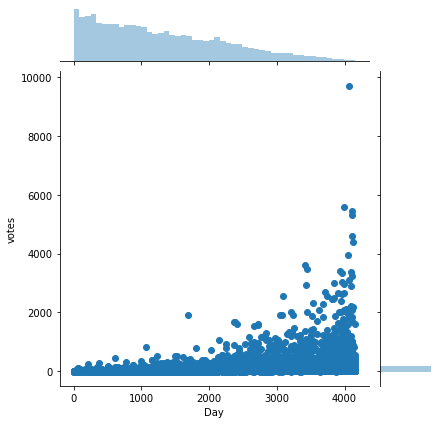

In [40]:
#we can see that the older question seems have more high votes
sns.jointplot(x ='Day', y = 'votes', data = dfdate)

In [41]:
#The correlation coefficient shows that they really have weak correlation  0.1< x<0.3
dfdate.votes.corr(dfdate.Day)

0.11320800248694295

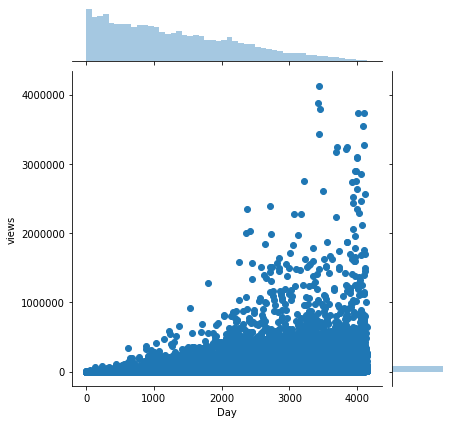

In [42]:
sns.jointplot(x ='Day', y = 'views', data = dfdate)

In [43]:
dfdate.views.corr(dfdate.Day)

0.12710813527798398

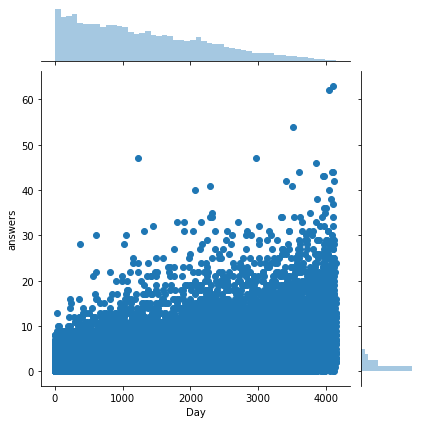

In [44]:
sns.jointplot(x ='Day', y = 'answers', data = dfdate)

In [45]:
dfdate.answers.corr(dfdate.Day)

0.3063262972917076

In [46]:
#sns.jointplot(x = 'answers', y = 'votes', data = df ,kind = 'kde')

In [47]:
#We random sample some of the data 
dfsample=df.sample(n=2000,random_state=None,axis=0)

In [48]:
#sns.jointplot(x = 'answers', y = 'votes', data = dfsample ,kind = 'kde')

In [49]:
#dfsample1=dfdate.sample(n=2000,random_state=None,axis=0)
#sns.jointplot(x = 'Day', y = 'views', data = dfsample ,kind = 'kde',space=0, color="g")

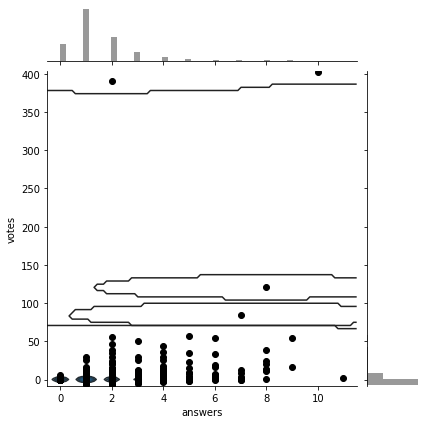

In [50]:
#seems that answer and votes and also related
g = (sns.jointplot("answers", "votes",
                   data=dfsample, color="k")
     .plot_joint(sns.kdeplot, zorder=0, n_levels=10))
plt.show()


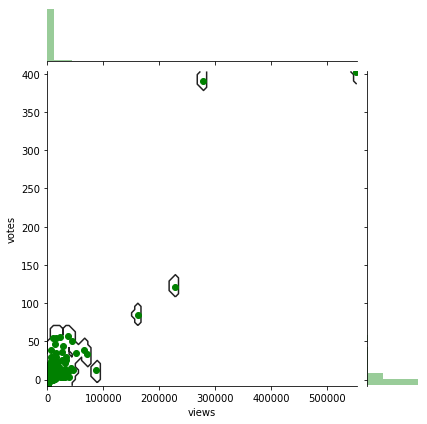

In [51]:
g = (sns.jointplot("views", "votes",
                   data=dfsample, color="g")
     .plot_joint(sns.kdeplot, zorder=0, n_levels=10))
plt.show()

In [52]:
df.votes.corr(df.views)

0.8089030156284096

In [53]:
df.votes.corr(df.answers)

0.3178890897713148

In [54]:
#Doing the AI prediction part, since we aready know the vote related with day answers and views ,
#to predict the questions votes, AI may know
#data preparation
dfdate

,id,questions,votes,answers,views,questionsbody,questionstag,date,Day
0,469,How can I find the full path to a font from it...,39,4,2869,I am using the Photoshops javascrip...,tags t-python t-macos t-fonts t-photoshop,2008-08-02,4155
1,337,XML Processing in Python closed,68,12,7926,I am about to build a piece of a pr...,tags t-python t-xml,2008-08-02,4155
2,502,Get a preview JPEG of a PDF on Windows?,41,3,14157,I have a cross-platform (Python) ap...,tags t-python t-windows t-image t-pdf,2008-08-02,4155
3,535,Continuous Integration System for a Python Cod...,56,7,8825,I am starting to work on a hobby pr...,tags t-python t-continuous-integration t-extre...,2008-08-02,4155
4,766,Python and MySQL,35,6,3107,I can get Python to work with Postg...,tags t-python t-mysql t-postgresql t-bpgsql,2008-08-03,4154
...,...,...,...,...,...,...,...,...,...
1304680,59384009,Python ModuleNotFound urllib2,-1,0,24,I am currently running Python 3.8.0...,tags t-python t-python-3ûx,2019-12-18,0
1304681,59383978,How to simplify program PYTHON closed,-1,0,24,I have an assignment where I have t...,tags t-python t-simplify,2019-12-18,0
1304682,59383945,Go to next page when webscraping Google,-1,1,29,I am trying to web scrape the list ...,tags t-python t-python-3ûx t-web-scraping t-be...,2019-12-18,0
1304683,59383832,how to pass arguments to stats models formula ...,-1,0,9,is it possible to pass arguments to...,tags t-python t-parameter-passing t-formula t-...,2019-12-18,0


In [66]:
dftrain=pd.DataFrame(dfdate,columns = ['votes','answers','views','Day'])
dftrain

,votes,answers,views,Day
0,39,4,2869,4155
1,68,12,7926,4155
2,41,3,14157,4155
3,56,7,8825,4155
4,35,6,3107,4154
...,...,...,...,...
1304680,-1,0,24,0
1304681,-1,0,24,0
1304682,-1,1,29,0
1304683,-1,0,9,0


In [67]:
#from sklearn import preprocessing
#dftrain['label'] = list(map(lambda x:  1 if x>500 else 0 , dftrain['votes']))
#dftrain['label'] =dftrain['votes']
#dftrain

In [68]:
feature = ['answers','views','Day']
label = ['votes']
X_train = dftrain[feature].as_matrix()
#x_train=preprocessing.scale(x_train)
X_train[0]

C:\Users\gcw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([   4, 2869, 4155], dtype=int64)

In [69]:
Y_train = dftrain[label].as_matrix()
Y_train.shape

C:\Users\gcw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(1304685, 1)

In [73]:
#Seperated as train (x)and test (y) dataset 
x_train, y_train, x_test,y_test = train_test_split(X_train, Y_train, test_size=0.001,random_state=0)
#Standarlized

data_mean =x_train.mean()  
data_std =x_train.std()  
x_train = (x_train - data_mean)/data_std

data_mean1 =x_test.mean()  
data_std1 =x_test.std()  
x_test = (x_test - data_mean1)/data_std1

x_train.shape

(1303380, 3)

In [74]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential() 
model.add(Dense(12,input_dim=3,init='uniform')) 
model.add(Activation('relu')) 
model.add(Dense(1,input_dim=12))  
model.compile(loss='mean_squared_error', optimizer='sgd') 
model.fit(x_train, x_test, nb_epoch =10, batch_size = 5)
model.save_weights(modelfile) 

C:\Users\gcw\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=3, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\gcw\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10


  70875/1303380 [>.............................] - ETA: 18:42:16 - loss: 0.005 - ETA: 24:25 - loss: 0.9530  - ETA: 16:17 - loss: 0.60 - ETA: 12:44 - loss: 0.43 - ETA: 10:23 - loss: 0.32 - ETA: 9:28 - loss: 0.3199 - ETA: 8:42 - loss: 0.269 - ETA: 8:03 - loss: 0.249 - ETA: 7:26 - loss: 171.779 - ETA: 7:01 - loss: 151.540 - ETA: 6:58 - loss: 141.184 - ETA: 6:44 - loss: 128.045 - ETA: 6:33 - loss: 117.339 - ETA: 6:22 - loss: 107.772 - ETA: 6:14 - loss: 99.944 - ETA: 6:10 - loss: 94.08 - ETA: 6:02 - loss: 88.55 - ETA: 5:56 - loss: 83.14 - ETA: 5:49 - loss: 77.91 - ETA: 5:42 - loss: 73.14 - ETA: 5:41 - loss: 70.06 - ETA: 5:38 - loss: 66.77 - ETA: 5:35 - loss: 63.71 - ETA: 5:32 - loss: 60.92 - ETA: 5:29 - loss: 58.31 - ETA: 5:27 - loss: 56.05 - ETA: 5:25 - loss: 53.98 - ETA: 5:22 - loss: 51.85 - ETA: 5:18 - loss: 49.62 - ETA: 5:14 - loss: 47.61 - ETA: 5:10 - loss: 45.74 - ETA: 5:10 - loss: 44.49 - ETA: 5:07 - loss: 43.11 - ETA: 5:04 - loss: 41.57 - ETA: 5:01 - loss: 40.16 - ETA: 4:59 - loss: 

 143315/1303380 [==>...........................] - ETA: 4:40 - loss: 5.378 - ETA: 4:39 - loss: 5.358 - ETA: 4:39 - loss: 5.343 - ETA: 4:40 - loss: 5.329 - ETA: 4:39 - loss: 5.311 - ETA: 4:39 - loss: 5.294 - ETA: 4:39 - loss: 5.276 - ETA: 4:39 - loss: 5.257 - ETA: 4:39 - loss: 5.237 - ETA: 4:39 - loss: 5.219 - ETA: 4:39 - loss: 5.207 - ETA: 4:39 - loss: 5.189 - ETA: 4:38 - loss: 5.172 - ETA: 4:38 - loss: 5.155 - ETA: 4:38 - loss: 5.137 - ETA: 4:38 - loss: 5.123 - ETA: 4:38 - loss: 5.106 - ETA: 4:38 - loss: 5.089 - ETA: 4:38 - loss: 5.072 - ETA: 4:37 - loss: 5.054 - ETA: 4:37 - loss: 5.039 - ETA: 4:37 - loss: 5.025 - ETA: 4:37 - loss: 5.008 - ETA: 4:37 - loss: 4.991 - ETA: 4:36 - loss: 4.973 - ETA: 4:36 - loss: 4.958 - ETA: 4:36 - loss: 4.945 - ETA: 4:36 - loss: 4.931 - ETA: 4:36 - loss: 4.916 - ETA: 4:36 - loss: 4.903 - ETA: 4:36 - loss: 4.902 - ETA: 4:36 - loss: 4.891 - ETA: 4:36 - loss: 4.880 - ETA: 4:36 - loss: 4.868 - ETA: 4:36 - loss: 4.853 - ETA: 4:36 - loss: 4.840 - ETA: 4:36 - l

 208350/1303380 [===>..........................] - ETA: 4:19 - loss: 3.240 - ETA: 4:19 - loss: 3.234 - ETA: 4:19 - loss: 3.230 - ETA: 4:19 - loss: 3.225 - ETA: 4:19 - loss: 3.219 - ETA: 4:19 - loss: 3.215 - ETA: 4:19 - loss: 3.209 - ETA: 4:19 - loss: 3.226 - ETA: 4:19 - loss: 3.221 - ETA: 4:19 - loss: 3.216 - ETA: 4:18 - loss: 3.211 - ETA: 4:18 - loss: 3.206 - ETA: 4:18 - loss: 3.201 - ETA: 4:18 - loss: 3.195 - ETA: 4:18 - loss: 3.190 - ETA: 4:18 - loss: 3.186 - ETA: 4:18 - loss: 3.182 - ETA: 4:18 - loss: 3.177 - ETA: 4:18 - loss: 3.172 - ETA: 4:18 - loss: 3.167 - ETA: 4:18 - loss: 3.162 - ETA: 4:18 - loss: 3.158 - ETA: 4:18 - loss: 3.153 - ETA: 4:18 - loss: 3.148 - ETA: 4:17 - loss: 3.143 - ETA: 4:17 - loss: 3.137 - ETA: 4:17 - loss: 3.133 - ETA: 4:17 - loss: 3.127 - ETA: 4:17 - loss: 3.122 - ETA: 4:17 - loss: 3.117 - ETA: 4:17 - loss: 3.111 - ETA: 4:17 - loss: 3.108 - ETA: 4:17 - loss: 3.103 - ETA: 4:17 - loss: 3.098 - ETA: 4:17 - loss: 3.093 - ETA: 4:17 - loss: 3.088 - ETA: 4:17 - l

 274885/1303380 [=====>........................] - ETA: 4:12 - loss: 2.447 - ETA: 4:12 - loss: 2.445 - ETA: 4:12 - loss: 2.442 - ETA: 4:12 - loss: 2.440 - ETA: 4:12 - loss: 2.438 - ETA: 4:12 - loss: 2.435 - ETA: 4:12 - loss: 2.432 - ETA: 4:12 - loss: 2.431 - ETA: 4:12 - loss: 2.428 - ETA: 4:12 - loss: 2.425 - ETA: 4:12 - loss: 2.423 - ETA: 4:12 - loss: 2.420 - ETA: 4:12 - loss: 2.418 - ETA: 4:12 - loss: 2.416 - ETA: 4:12 - loss: 2.413 - ETA: 4:11 - loss: 2.410 - ETA: 4:11 - loss: 2.408 - ETA: 4:11 - loss: 2.406 - ETA: 4:11 - loss: 2.403 - ETA: 4:11 - loss: 2.400 - ETA: 4:11 - loss: 2.398 - ETA: 4:11 - loss: 2.395 - ETA: 4:11 - loss: 2.393 - ETA: 4:11 - loss: 2.391 - ETA: 4:11 - loss: 2.389 - ETA: 4:11 - loss: 2.386 - ETA: 4:11 - loss: 2.386 - ETA: 4:11 - loss: 2.383 - ETA: 4:11 - loss: 2.381 - ETA: 4:11 - loss: 2.378 - ETA: 4:11 - loss: 2.377 - ETA: 4:10 - loss: 2.375 - ETA: 4:11 - loss: 2.373 - ETA: 4:11 - loss: 2.372 - ETA: 4:10 - loss: 2.370 - ETA: 4:10 - loss: 2.367 - ETA: 4:10 - l

 343240/1303380 [======>.......................] - ETA: 3:59 - loss: 2.044 - ETA: 3:59 - loss: 2.042 - ETA: 3:59 - loss: 2.041 - ETA: 3:59 - loss: 2.040 - ETA: 3:59 - loss: 2.038 - ETA: 3:59 - loss: 2.037 - ETA: 3:59 - loss: 2.035 - ETA: 3:59 - loss: 2.033 - ETA: 3:59 - loss: 2.031 - ETA: 3:59 - loss: 2.030 - ETA: 3:59 - loss: 2.028 - ETA: 3:59 - loss: 2.026 - ETA: 3:59 - loss: 2.025 - ETA: 3:59 - loss: 2.023 - ETA: 3:59 - loss: 2.022 - ETA: 3:58 - loss: 2.020 - ETA: 3:58 - loss: 2.019 - ETA: 3:58 - loss: 2.017 - ETA: 3:58 - loss: 2.015 - ETA: 3:58 - loss: 2.014 - ETA: 3:58 - loss: 2.012 - ETA: 3:58 - loss: 2.010 - ETA: 3:58 - loss: 2.008 - ETA: 3:58 - loss: 2.006 - ETA: 3:58 - loss: 2.005 - ETA: 3:58 - loss: 2.003 - ETA: 3:58 - loss: 2.001 - ETA: 3:58 - loss: 1.999 - ETA: 3:57 - loss: 1.997 - ETA: 3:57 - loss: 1.996 - ETA: 3:57 - loss: 1.994 - ETA: 3:57 - loss: 1.993 - ETA: 3:57 - loss: 1.992 - ETA: 3:57 - loss: 1.997 - ETA: 3:57 - loss: 1.996 - ETA: 3:57 - loss: 1.994 - ETA: 3:57 - l

 419970/1303380 [========>.....................] - ETA: 3:44 - loss: 1.844 - ETA: 3:43 - loss: 1.860 - ETA: 3:43 - loss: 1.859 - ETA: 3:43 - loss: 1.858 - ETA: 3:43 - loss: 1.859 - ETA: 3:43 - loss: 1.859 - ETA: 3:43 - loss: 1.858 - ETA: 3:43 - loss: 1.857 - ETA: 3:43 - loss: 1.856 - ETA: 3:43 - loss: 1.856 - ETA: 3:43 - loss: 1.855 - ETA: 3:43 - loss: 1.854 - ETA: 3:43 - loss: 1.853 - ETA: 3:43 - loss: 1.852 - ETA: 3:43 - loss: 1.851 - ETA: 3:42 - loss: 1.850 - ETA: 3:42 - loss: 1.849 - ETA: 3:42 - loss: 1.847 - ETA: 3:42 - loss: 1.846 - ETA: 3:42 - loss: 1.845 - ETA: 3:42 - loss: 1.844 - ETA: 3:42 - loss: 1.843 - ETA: 3:42 - loss: 1.842 - ETA: 3:42 - loss: 1.841 - ETA: 3:42 - loss: 1.839 - ETA: 3:42 - loss: 1.838 - ETA: 3:42 - loss: 1.837 - ETA: 3:42 - loss: 1.836 - ETA: 3:42 - loss: 1.834 - ETA: 3:41 - loss: 1.833 - ETA: 3:41 - loss: 1.832 - ETA: 3:41 - loss: 1.831 - ETA: 3:41 - loss: 1.829 - ETA: 3:41 - loss: 1.828 - ETA: 3:41 - loss: 1.827 - ETA: 3:41 - loss: 1.826 - ETA: 3:41 - l

 496265/1303380 [==========>...................] - ETA: 3:22 - loss: 1.620 - ETA: 3:22 - loss: 1.620 - ETA: 3:22 - loss: 1.619 - ETA: 3:21 - loss: 1.618 - ETA: 3:21 - loss: 1.617 - ETA: 3:21 - loss: 1.616 - ETA: 3:21 - loss: 1.615 - ETA: 3:21 - loss: 1.614 - ETA: 3:21 - loss: 1.613 - ETA: 3:21 - loss: 1.612 - ETA: 3:21 - loss: 1.611 - ETA: 3:21 - loss: 1.610 - ETA: 3:21 - loss: 1.609 - ETA: 3:21 - loss: 1.620 - ETA: 3:21 - loss: 1.619 - ETA: 3:21 - loss: 1.619 - ETA: 3:21 - loss: 1.618 - ETA: 3:21 - loss: 1.617 - ETA: 3:20 - loss: 1.616 - ETA: 3:20 - loss: 1.616 - ETA: 3:20 - loss: 1.615 - ETA: 3:20 - loss: 1.614 - ETA: 3:20 - loss: 1.613 - ETA: 3:20 - loss: 1.613 - ETA: 3:20 - loss: 1.612 - ETA: 3:20 - loss: 1.611 - ETA: 3:20 - loss: 1.610 - ETA: 3:20 - loss: 1.609 - ETA: 3:20 - loss: 1.608 - ETA: 3:20 - loss: 1.607 - ETA: 3:20 - loss: 1.606 - ETA: 3:20 - loss: 1.605 - ETA: 3:20 - loss: 1.604 - ETA: 3:20 - loss: 1.603 - ETA: 3:19 - loss: 1.602 - ETA: 3:19 - loss: 1.601 - ETA: 3:19 - l

 572120/1303380 [============>.................] - ETA: 3:02 - loss: 1.465 - ETA: 3:02 - loss: 1.464 - ETA: 3:02 - loss: 1.463 - ETA: 3:02 - loss: 1.463 - ETA: 3:01 - loss: 1.462 - ETA: 3:01 - loss: 1.461 - ETA: 3:01 - loss: 1.460 - ETA: 3:01 - loss: 1.460 - ETA: 3:01 - loss: 1.459 - ETA: 3:01 - loss: 1.458 - ETA: 3:01 - loss: 1.457 - ETA: 3:01 - loss: 1.457 - ETA: 3:01 - loss: 1.456 - ETA: 3:01 - loss: 1.455 - ETA: 3:01 - loss: 1.457 - ETA: 3:01 - loss: 1.456 - ETA: 3:01 - loss: 1.456 - ETA: 3:00 - loss: 1.455 - ETA: 3:00 - loss: 1.455 - ETA: 3:00 - loss: 1.454 - ETA: 3:00 - loss: 1.453 - ETA: 3:00 - loss: 1.453 - ETA: 3:00 - loss: 1.452 - ETA: 3:00 - loss: 1.468 - ETA: 3:00 - loss: 1.468 - ETA: 3:00 - loss: 1.469 - ETA: 3:00 - loss: 1.469 - ETA: 3:00 - loss: 1.468 - ETA: 3:00 - loss: 1.468 - ETA: 3:00 - loss: 1.468 - ETA: 3:00 - loss: 1.467 - ETA: 3:00 - loss: 1.467 - ETA: 3:00 - loss: 1.466 - ETA: 3:00 - loss: 1.466 - ETA: 2:59 - loss: 1.465 - ETA: 2:59 - loss: 1.464 - ETA: 2:59 - l

 651810/1303380 [==============>...............] - ETA: 2:43 - loss: 1.355 - ETA: 2:43 - loss: 1.354 - ETA: 2:43 - loss: 1.354 - ETA: 2:43 - loss: 1.353 - ETA: 2:43 - loss: 1.352 - ETA: 2:43 - loss: 1.352 - ETA: 2:43 - loss: 1.351 - ETA: 2:43 - loss: 1.351 - ETA: 2:43 - loss: 1.350 - ETA: 2:43 - loss: 1.350 - ETA: 2:43 - loss: 1.349 - ETA: 2:42 - loss: 1.349 - ETA: 2:42 - loss: 1.348 - ETA: 2:42 - loss: 1.347 - ETA: 2:42 - loss: 1.347 - ETA: 2:42 - loss: 1.346 - ETA: 2:42 - loss: 1.345 - ETA: 2:42 - loss: 1.345 - ETA: 2:42 - loss: 1.344 - ETA: 2:42 - loss: 1.344 - ETA: 2:42 - loss: 1.343 - ETA: 2:42 - loss: 1.343 - ETA: 2:42 - loss: 1.342 - ETA: 2:42 - loss: 1.342 - ETA: 2:42 - loss: 1.341 - ETA: 2:42 - loss: 1.340 - ETA: 2:41 - loss: 1.340 - ETA: 2:41 - loss: 1.348 - ETA: 2:41 - loss: 1.347 - ETA: 2:41 - loss: 1.350 - ETA: 2:41 - loss: 1.349 - ETA: 2:41 - loss: 1.349 - ETA: 2:41 - loss: 1.348 - ETA: 2:41 - loss: 1.348 - ETA: 2:41 - loss: 1.347 - ETA: 2:41 - loss: 1.347 - ETA: 2:41 - l

 730650/1303380 [===============>..............] - ETA: 2:23 - loss: 1.318 - ETA: 2:23 - loss: 1.317 - ETA: 2:23 - loss: 1.317 - ETA: 2:23 - loss: 1.316 - ETA: 2:23 - loss: 1.316 - ETA: 2:23 - loss: 1.316 - ETA: 2:23 - loss: 1.315 - ETA: 2:23 - loss: 1.315 - ETA: 2:23 - loss: 1.314 - ETA: 2:23 - loss: 1.314 - ETA: 2:23 - loss: 1.313 - ETA: 2:23 - loss: 1.313 - ETA: 2:23 - loss: 1.312 - ETA: 2:23 - loss: 1.312 - ETA: 2:23 - loss: 1.311 - ETA: 2:23 - loss: 1.311 - ETA: 2:22 - loss: 1.311 - ETA: 2:22 - loss: 1.311 - ETA: 2:22 - loss: 1.310 - ETA: 2:22 - loss: 1.310 - ETA: 2:22 - loss: 1.309 - ETA: 2:22 - loss: 1.309 - ETA: 2:22 - loss: 1.308 - ETA: 2:22 - loss: 1.308 - ETA: 2:22 - loss: 1.307 - ETA: 2:22 - loss: 1.307 - ETA: 2:22 - loss: 1.307 - ETA: 2:22 - loss: 1.306 - ETA: 2:22 - loss: 1.306 - ETA: 2:22 - loss: 1.305 - ETA: 2:22 - loss: 1.305 - ETA: 2:22 - loss: 1.304 - ETA: 2:21 - loss: 1.304 - ETA: 2:21 - loss: 1.304 - ETA: 2:21 - loss: 1.303 - ETA: 2:21 - loss: 1.303 - ETA: 2:21 - l

 809285/1303380 [=================>............] - ETA: 2:05 - loss: 1.273 - ETA: 2:05 - loss: 1.273 - ETA: 2:05 - loss: 1.273 - ETA: 2:05 - loss: 1.272 - ETA: 2:05 - loss: 1.272 - ETA: 2:05 - loss: 1.272 - ETA: 2:05 - loss: 1.272 - ETA: 2:05 - loss: 1.271 - ETA: 2:04 - loss: 1.271 - ETA: 2:04 - loss: 1.270 - ETA: 2:04 - loss: 1.270 - ETA: 2:04 - loss: 1.270 - ETA: 2:04 - loss: 1.269 - ETA: 2:04 - loss: 1.285 - ETA: 2:04 - loss: 1.287 - ETA: 2:04 - loss: 1.288 - ETA: 2:04 - loss: 1.290 - ETA: 2:04 - loss: 1.290 - ETA: 2:04 - loss: 1.291 - ETA: 2:04 - loss: 1.291 - ETA: 2:04 - loss: 1.291 - ETA: 2:04 - loss: 1.291 - ETA: 2:04 - loss: 1.291 - ETA: 2:04 - loss: 1.291 - ETA: 2:04 - loss: 1.291 - ETA: 2:03 - loss: 1.291 - ETA: 2:03 - loss: 1.291 - ETA: 2:03 - loss: 1.291 - ETA: 2:03 - loss: 1.291 - ETA: 2:03 - loss: 1.291 - ETA: 2:03 - loss: 1.291 - ETA: 2:03 - loss: 1.291 - ETA: 2:03 - loss: 1.291 - ETA: 2:03 - loss: 1.290 - ETA: 2:03 - loss: 1.290 - ETA: 2:03 - loss: 1.290 - ETA: 2:03 - l

 901875/1303380 [===================>..........] - ETA: 1:47 - loss: 1.232 - ETA: 1:47 - loss: 1.231 - ETA: 1:47 - loss: 1.231 - ETA: 1:47 - loss: 1.231 - ETA: 1:47 - loss: 1.230 - ETA: 1:47 - loss: 1.230 - ETA: 1:46 - loss: 1.230 - ETA: 1:46 - loss: 1.230 - ETA: 1:46 - loss: 1.229 - ETA: 1:46 - loss: 1.229 - ETA: 1:46 - loss: 1.229 - ETA: 1:46 - loss: 1.228 - ETA: 1:46 - loss: 1.228 - ETA: 1:46 - loss: 1.228 - ETA: 1:46 - loss: 1.227 - ETA: 1:46 - loss: 1.227 - ETA: 1:46 - loss: 1.227 - ETA: 1:46 - loss: 1.226 - ETA: 1:46 - loss: 1.226 - ETA: 1:46 - loss: 1.225 - ETA: 1:45 - loss: 1.226 - ETA: 1:45 - loss: 1.226 - ETA: 1:45 - loss: 1.225 - ETA: 1:45 - loss: 1.225 - ETA: 1:45 - loss: 1.225 - ETA: 1:45 - loss: 1.224 - ETA: 1:45 - loss: 1.225 - ETA: 1:45 - loss: 1.224 - ETA: 1:45 - loss: 1.224 - ETA: 1:45 - loss: 1.223 - ETA: 1:45 - loss: 1.223 - ETA: 1:45 - loss: 1.223 - ETA: 1:45 - loss: 1.222 - ETA: 1:45 - loss: 1.225 - ETA: 1:44 - loss: 1.224 - ETA: 1:44 - loss: 1.224 - ETA: 1:44 - l

 990710/1303380 [=====================>........] - ETA: 1:25 - loss: 1.186 - ETA: 1:25 - loss: 1.186 - ETA: 1:25 - loss: 1.185 - ETA: 1:25 - loss: 1.185 - ETA: 1:25 - loss: 1.184 - ETA: 1:25 - loss: 1.184 - ETA: 1:24 - loss: 1.184 - ETA: 1:24 - loss: 1.183 - ETA: 1:24 - loss: 1.183 - ETA: 1:24 - loss: 1.189 - ETA: 1:24 - loss: 1.189 - ETA: 1:24 - loss: 1.189 - ETA: 1:24 - loss: 1.189 - ETA: 1:24 - loss: 1.188 - ETA: 1:24 - loss: 1.188 - ETA: 1:24 - loss: 1.188 - ETA: 1:24 - loss: 1.188 - ETA: 1:24 - loss: 1.187 - ETA: 1:24 - loss: 1.187 - ETA: 1:24 - loss: 1.187 - ETA: 1:24 - loss: 1.186 - ETA: 1:23 - loss: 1.186 - ETA: 1:23 - loss: 1.186 - ETA: 1:23 - loss: 1.185 - ETA: 1:23 - loss: 1.185 - ETA: 1:23 - loss: 1.185 - ETA: 1:23 - loss: 1.185 - ETA: 1:23 - loss: 1.185 - ETA: 1:23 - loss: 1.184 - ETA: 1:23 - loss: 1.185 - ETA: 1:23 - loss: 1.185 - ETA: 1:23 - loss: 1.184 - ETA: 1:23 - loss: 1.184 - ETA: 1:23 - loss: 1.184 - ETA: 1:23 - loss: 1.184 - ETA: 1:23 - loss: 1.183 - ETA: 1:22 - l

1073640/1303380 [=======================>......] - ETA: 1:05 - loss: 1.134 - ETA: 1:05 - loss: 1.133 - ETA: 1:05 - loss: 1.133 - ETA: 1:05 - loss: 1.133 - ETA: 1:05 - loss: 1.133 - ETA: 1:05 - loss: 1.132 - ETA: 1:05 - loss: 1.132 - ETA: 1:05 - loss: 1.132 - ETA: 1:05 - loss: 1.132 - ETA: 1:05 - loss: 1.131 - ETA: 1:05 - loss: 1.131 - ETA: 1:05 - loss: 1.132 - ETA: 1:04 - loss: 1.131 - ETA: 1:04 - loss: 1.131 - ETA: 1:04 - loss: 1.131 - ETA: 1:04 - loss: 1.131 - ETA: 1:04 - loss: 1.130 - ETA: 1:04 - loss: 1.130 - ETA: 1:04 - loss: 1.130 - ETA: 1:04 - loss: 1.131 - ETA: 1:04 - loss: 1.130 - ETA: 1:04 - loss: 1.131 - ETA: 1:04 - loss: 1.131 - ETA: 1:04 - loss: 1.131 - ETA: 1:04 - loss: 1.130 - ETA: 1:04 - loss: 1.130 - ETA: 1:04 - loss: 1.130 - ETA: 1:04 - loss: 1.129 - ETA: 1:04 - loss: 1.129 - ETA: 1:04 - loss: 1.129 - ETA: 1:04 - loss: 1.129 - ETA: 1:03 - loss: 1.128 - ETA: 1:03 - loss: 1.128 - ETA: 1:03 - loss: 1.128 - ETA: 1:03 - loss: 1.128 - ETA: 1:03 - loss: 1.127 - ETA: 1:03 - l

1159360/1303380 [=========================>....] - ETA: 48s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 47s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 46s - loss: 1.09 - ETA: 45s - lo

1245410/1303380 [===========================>..] - ETA: 30s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 29s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.08 - ETA: 28s - loss: 1.08 - ETA: 28s - loss: 1.08 - ETA: 28s - loss: 1.09 - ETA: 28s - loss: 1.09 - ETA: 27s - lo

1303380/1303380 [==============================] - ETA: 12s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 11s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.04 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - loss: 1.05 - ETA: 10s - lo

  88655/1303380 [=>............................] - ETA: 29:32:11 - loss: 0.109 - ETA: 41:31 - loss: 0.0762  - ETA: 23:18 - loss: 0.06 - ETA: 16:20 - loss: 0.05 - ETA: 13:40 - loss: 0.04 - ETA: 11:46 - loss: 0.06 - ETA: 10:16 - loss: 0.10 - ETA: 9:13 - loss: 0.0900 - ETA: 8:29 - loss: 0.099 - ETA: 8:06 - loss: 0.435 - ETA: 7:41 - loss: 0.399 - ETA: 7:17 - loss: 0.365 - ETA: 6:59 - loss: 0.335 - ETA: 6:44 - loss: 0.328 - ETA: 6:34 - loss: 0.316 - ETA: 6:23 - loss: 0.298 - ETA: 6:14 - loss: 0.300 - ETA: 6:04 - loss: 0.316 - ETA: 5:58 - loss: 0.316 - ETA: 5:52 - loss: 0.351 - ETA: 5:47 - loss: 0.346 - ETA: 5:42 - loss: 0.335 - ETA: 5:37 - loss: 0.322 - ETA: 5:30 - loss: 0.312 - ETA: 5:25 - loss: 0.301 - ETA: 5:21 - loss: 0.293 - ETA: 5:16 - loss: 0.282 - ETA: 5:12 - loss: 0.277 - ETA: 5:07 - loss: 0.270 - ETA: 5:04 - loss: 0.262 - ETA: 5:01 - loss: 2.022 - ETA: 4:58 - loss: 1.951 - ETA: 4:55 - loss: 1.917 - ETA: 4:52 - loss: 1.855 - ETA: 4:50 - loss: 1.817 - ETA: 4:48 - loss: 1.764 - ETA: 

 179600/1303380 [===>..........................] - ETA: 3:43 - loss: 0.662 - ETA: 3:43 - loss: 0.660 - ETA: 3:43 - loss: 0.660 - ETA: 3:43 - loss: 0.658 - ETA: 3:42 - loss: 0.661 - ETA: 3:42 - loss: 0.659 - ETA: 3:42 - loss: 0.658 - ETA: 3:42 - loss: 0.656 - ETA: 3:42 - loss: 0.655 - ETA: 3:42 - loss: 0.653 - ETA: 3:42 - loss: 0.651 - ETA: 3:42 - loss: 0.651 - ETA: 3:42 - loss: 0.655 - ETA: 3:42 - loss: 0.653 - ETA: 3:41 - loss: 0.654 - ETA: 3:41 - loss: 0.652 - ETA: 3:41 - loss: 0.650 - ETA: 3:41 - loss: 0.649 - ETA: 3:41 - loss: 0.647 - ETA: 3:41 - loss: 0.646 - ETA: 3:41 - loss: 0.836 - ETA: 3:41 - loss: 0.833 - ETA: 3:41 - loss: 0.832 - ETA: 3:41 - loss: 0.830 - ETA: 3:40 - loss: 0.998 - ETA: 3:40 - loss: 0.996 - ETA: 3:40 - loss: 0.993 - ETA: 3:40 - loss: 0.991 - ETA: 3:40 - loss: 0.988 - ETA: 3:40 - loss: 0.986 - ETA: 3:40 - loss: 1.071 - ETA: 3:40 - loss: 1.068 - ETA: 3:40 - loss: 1.066 - ETA: 3:40 - loss: 1.063 - ETA: 3:40 - loss: 1.063 - ETA: 3:40 - loss: 1.060 - ETA: 3:40 - l

 271405/1303380 [=====>........................] - ETA: 3:21 - loss: 1.024 - ETA: 3:21 - loss: 1.023 - ETA: 3:21 - loss: 1.022 - ETA: 3:21 - loss: 1.020 - ETA: 3:21 - loss: 1.019 - ETA: 3:21 - loss: 1.017 - ETA: 3:21 - loss: 1.016 - ETA: 3:21 - loss: 1.014 - ETA: 3:21 - loss: 1.013 - ETA: 3:21 - loss: 1.011 - ETA: 3:21 - loss: 1.010 - ETA: 3:21 - loss: 1.008 - ETA: 3:21 - loss: 1.007 - ETA: 3:21 - loss: 1.005 - ETA: 3:21 - loss: 1.004 - ETA: 3:20 - loss: 1.003 - ETA: 3:20 - loss: 1.001 - ETA: 3:20 - loss: 1.000 - ETA: 3:20 - loss: 0.998 - ETA: 3:20 - loss: 0.997 - ETA: 3:20 - loss: 0.996 - ETA: 3:20 - loss: 0.996 - ETA: 3:20 - loss: 0.995 - ETA: 3:20 - loss: 0.993 - ETA: 3:20 - loss: 0.999 - ETA: 3:20 - loss: 0.998 - ETA: 3:20 - loss: 0.996 - ETA: 3:20 - loss: 0.995 - ETA: 3:20 - loss: 0.994 - ETA: 3:19 - loss: 0.992 - ETA: 3:19 - loss: 0.991 - ETA: 3:19 - loss: 0.989 - ETA: 3:19 - loss: 0.988 - ETA: 3:19 - loss: 0.986 - ETA: 3:19 - loss: 0.985 - ETA: 3:19 - loss: 0.983 - ETA: 3:19 - l

 359975/1303380 [=======>......................] - ETA: 3:03 - loss: 1.024 - ETA: 3:03 - loss: 1.025 - ETA: 3:03 - loss: 1.024 - ETA: 3:03 - loss: 1.023 - ETA: 3:03 - loss: 1.023 - ETA: 3:03 - loss: 1.022 - ETA: 3:03 - loss: 1.021 - ETA: 3:03 - loss: 1.020 - ETA: 3:03 - loss: 1.019 - ETA: 3:02 - loss: 1.019 - ETA: 3:02 - loss: 1.018 - ETA: 3:02 - loss: 1.017 - ETA: 3:02 - loss: 1.016 - ETA: 3:02 - loss: 1.014 - ETA: 3:02 - loss: 1.013 - ETA: 3:02 - loss: 1.013 - ETA: 3:02 - loss: 1.012 - ETA: 3:02 - loss: 1.012 - ETA: 3:02 - loss: 1.011 - ETA: 3:02 - loss: 1.010 - ETA: 3:02 - loss: 1.009 - ETA: 3:02 - loss: 1.008 - ETA: 3:02 - loss: 1.007 - ETA: 3:02 - loss: 1.007 - ETA: 3:02 - loss: 1.006 - ETA: 3:02 - loss: 1.005 - ETA: 3:02 - loss: 1.005 - ETA: 3:02 - loss: 1.004 - ETA: 3:02 - loss: 1.003 - ETA: 3:02 - loss: 1.002 - ETA: 3:02 - loss: 1.002 - ETA: 3:02 - loss: 1.001 - ETA: 3:02 - loss: 1.000 - ETA: 3:02 - loss: 0.999 - ETA: 3:01 - loss: 0.998 - ETA: 3:01 - loss: 0.997 - ETA: 3:01 - l

 448435/1303380 [=========>....................] - ETA: 2:48 - loss: 0.871 - ETA: 2:48 - loss: 0.870 - ETA: 2:48 - loss: 0.870 - ETA: 2:48 - loss: 0.869 - ETA: 2:48 - loss: 0.869 - ETA: 2:48 - loss: 0.868 - ETA: 2:48 - loss: 0.868 - ETA: 2:48 - loss: 0.872 - ETA: 2:48 - loss: 0.871 - ETA: 2:48 - loss: 0.870 - ETA: 2:48 - loss: 0.870 - ETA: 2:48 - loss: 0.903 - ETA: 2:47 - loss: 0.902 - ETA: 2:47 - loss: 0.908 - ETA: 2:47 - loss: 0.908 - ETA: 2:47 - loss: 0.907 - ETA: 2:47 - loss: 0.907 - ETA: 2:47 - loss: 0.906 - ETA: 2:47 - loss: 0.905 - ETA: 2:47 - loss: 0.905 - ETA: 2:47 - loss: 0.904 - ETA: 2:47 - loss: 0.904 - ETA: 2:47 - loss: 0.903 - ETA: 2:47 - loss: 0.902 - ETA: 2:47 - loss: 0.919 - ETA: 2:47 - loss: 0.918 - ETA: 2:47 - loss: 0.920 - ETA: 2:47 - loss: 0.919 - ETA: 2:47 - loss: 0.919 - ETA: 2:47 - loss: 0.918 - ETA: 2:47 - loss: 0.917 - ETA: 2:47 - loss: 0.917 - ETA: 2:46 - loss: 0.917 - ETA: 2:46 - loss: 0.916 - ETA: 2:46 - loss: 0.916 - ETA: 2:46 - loss: 0.916 - ETA: 2:46 - l

 538125/1303380 [===========>..................] - ETA: 2:32 - loss: 0.935 - ETA: 2:32 - loss: 0.934 - ETA: 2:32 - loss: 0.934 - ETA: 2:32 - loss: 0.934 - ETA: 2:32 - loss: 0.933 - ETA: 2:32 - loss: 0.933 - ETA: 2:32 - loss: 0.932 - ETA: 2:32 - loss: 0.931 - ETA: 2:32 - loss: 0.931 - ETA: 2:32 - loss: 0.936 - ETA: 2:32 - loss: 0.935 - ETA: 2:32 - loss: 0.935 - ETA: 2:32 - loss: 0.935 - ETA: 2:32 - loss: 0.934 - ETA: 2:32 - loss: 0.935 - ETA: 2:32 - loss: 0.946 - ETA: 2:32 - loss: 0.945 - ETA: 2:32 - loss: 0.945 - ETA: 2:32 - loss: 0.944 - ETA: 2:31 - loss: 0.944 - ETA: 2:31 - loss: 0.943 - ETA: 2:31 - loss: 0.943 - ETA: 2:31 - loss: 0.944 - ETA: 2:31 - loss: 0.944 - ETA: 2:31 - loss: 0.943 - ETA: 2:31 - loss: 0.943 - ETA: 2:31 - loss: 0.942 - ETA: 2:31 - loss: 0.942 - ETA: 2:31 - loss: 0.941 - ETA: 2:31 - loss: 0.949 - ETA: 2:31 - loss: 0.948 - ETA: 2:31 - loss: 0.948 - ETA: 2:31 - loss: 0.947 - ETA: 2:31 - loss: 0.946 - ETA: 2:31 - loss: 0.946 - ETA: 2:31 - loss: 0.946 - ETA: 2:31 - l

 628495/1303380 [=============>................] - ETA: 2:16 - loss: 0.918 - ETA: 2:16 - loss: 0.918 - ETA: 2:16 - loss: 0.917 - ETA: 2:16 - loss: 0.917 - ETA: 2:16 - loss: 0.917 - ETA: 2:16 - loss: 0.916 - ETA: 2:16 - loss: 0.916 - ETA: 2:16 - loss: 0.915 - ETA: 2:16 - loss: 0.931 - ETA: 2:16 - loss: 0.930 - ETA: 2:16 - loss: 0.930 - ETA: 2:16 - loss: 0.930 - ETA: 2:16 - loss: 0.929 - ETA: 2:16 - loss: 0.929 - ETA: 2:15 - loss: 0.929 - ETA: 2:15 - loss: 0.928 - ETA: 2:15 - loss: 0.928 - ETA: 2:15 - loss: 0.928 - ETA: 2:15 - loss: 0.927 - ETA: 2:15 - loss: 0.927 - ETA: 2:15 - loss: 0.927 - ETA: 2:15 - loss: 0.926 - ETA: 2:15 - loss: 0.926 - ETA: 2:15 - loss: 0.925 - ETA: 2:15 - loss: 0.925 - ETA: 2:15 - loss: 0.925 - ETA: 2:15 - loss: 0.925 - ETA: 2:15 - loss: 0.925 - ETA: 2:15 - loss: 0.924 - ETA: 2:15 - loss: 0.924 - ETA: 2:15 - loss: 0.923 - ETA: 2:15 - loss: 0.923 - ETA: 2:15 - loss: 0.923 - ETA: 2:15 - loss: 0.922 - ETA: 2:14 - loss: 0.922 - ETA: 2:14 - loss: 0.921 - ETA: 2:14 - l

 710580/1303380 [===============>..............] - ETA: 2:00 - loss: 0.886 - ETA: 2:00 - loss: 0.886 - ETA: 2:00 - loss: 0.885 - ETA: 2:00 - loss: 0.885 - ETA: 2:00 - loss: 0.885 - ETA: 2:00 - loss: 0.885 - ETA: 2:00 - loss: 0.884 - ETA: 2:00 - loss: 0.884 - ETA: 1:59 - loss: 0.884 - ETA: 1:59 - loss: 0.883 - ETA: 1:59 - loss: 0.883 - ETA: 1:59 - loss: 0.883 - ETA: 1:59 - loss: 0.883 - ETA: 1:59 - loss: 0.883 - ETA: 1:59 - loss: 0.882 - ETA: 1:59 - loss: 0.882 - ETA: 1:59 - loss: 0.881 - ETA: 1:59 - loss: 0.881 - ETA: 1:59 - loss: 0.881 - ETA: 1:59 - loss: 0.881 - ETA: 1:59 - loss: 0.880 - ETA: 1:59 - loss: 0.880 - ETA: 1:59 - loss: 0.880 - ETA: 1:59 - loss: 0.880 - ETA: 1:59 - loss: 0.879 - ETA: 1:59 - loss: 0.879 - ETA: 1:59 - loss: 0.879 - ETA: 1:59 - loss: 0.879 - ETA: 1:58 - loss: 0.878 - ETA: 1:58 - loss: 0.878 - ETA: 1:58 - loss: 0.877 - ETA: 1:58 - loss: 0.877 - ETA: 1:58 - loss: 0.877 - ETA: 1:58 - loss: 0.876 - ETA: 1:58 - loss: 0.876 - ETA: 1:58 - loss: 0.876 - ETA: 1:58 - l

 785825/1303380 [=================>............] - ETA: 1:46 - loss: 0.847 - ETA: 1:46 - loss: 0.847 - ETA: 1:46 - loss: 0.847 - ETA: 1:46 - loss: 0.847 - ETA: 1:46 - loss: 0.847 - ETA: 1:46 - loss: 0.846 - ETA: 1:46 - loss: 0.846 - ETA: 1:46 - loss: 0.846 - ETA: 1:46 - loss: 0.846 - ETA: 1:46 - loss: 0.845 - ETA: 1:46 - loss: 0.845 - ETA: 1:46 - loss: 0.845 - ETA: 1:46 - loss: 0.845 - ETA: 1:46 - loss: 0.845 - ETA: 1:46 - loss: 0.845 - ETA: 1:46 - loss: 0.845 - ETA: 1:46 - loss: 0.844 - ETA: 1:46 - loss: 0.844 - ETA: 1:46 - loss: 0.844 - ETA: 1:46 - loss: 0.843 - ETA: 1:46 - loss: 0.843 - ETA: 1:46 - loss: 0.844 - ETA: 1:46 - loss: 0.844 - ETA: 1:46 - loss: 0.843 - ETA: 1:46 - loss: 0.843 - ETA: 1:46 - loss: 0.843 - ETA: 1:45 - loss: 0.843 - ETA: 1:45 - loss: 0.842 - ETA: 1:45 - loss: 0.842 - ETA: 1:45 - loss: 0.842 - ETA: 1:45 - loss: 0.842 - ETA: 1:45 - loss: 0.841 - ETA: 1:45 - loss: 0.841 - ETA: 1:45 - loss: 0.841 - ETA: 1:45 - loss: 0.841 - ETA: 1:45 - loss: 0.840 - ETA: 1:45 - l

 861920/1303380 [==================>...........] - ETA: 1:34 - loss: 0.806 - ETA: 1:34 - loss: 0.806 - ETA: 1:34 - loss: 0.806 - ETA: 1:34 - loss: 0.806 - ETA: 1:34 - loss: 0.806 - ETA: 1:34 - loss: 0.805 - ETA: 1:34 - loss: 0.805 - ETA: 1:34 - loss: 0.805 - ETA: 1:34 - loss: 0.809 - ETA: 1:34 - loss: 0.809 - ETA: 1:34 - loss: 0.809 - ETA: 1:34 - loss: 0.809 - ETA: 1:34 - loss: 0.809 - ETA: 1:34 - loss: 0.808 - ETA: 1:34 - loss: 0.808 - ETA: 1:34 - loss: 0.808 - ETA: 1:34 - loss: 0.808 - ETA: 1:34 - loss: 0.808 - ETA: 1:34 - loss: 0.808 - ETA: 1:34 - loss: 0.807 - ETA: 1:34 - loss: 0.807 - ETA: 1:34 - loss: 0.807 - ETA: 1:34 - loss: 0.807 - ETA: 1:33 - loss: 0.807 - ETA: 1:33 - loss: 0.806 - ETA: 1:33 - loss: 0.806 - ETA: 1:33 - loss: 0.806 - ETA: 1:33 - loss: 0.806 - ETA: 1:33 - loss: 0.805 - ETA: 1:33 - loss: 0.806 - ETA: 1:33 - loss: 0.805 - ETA: 1:33 - loss: 0.805 - ETA: 1:33 - loss: 0.805 - ETA: 1:33 - loss: 0.805 - ETA: 1:33 - loss: 0.805 - ETA: 1:33 - loss: 0.804 - ETA: 1:33 - l

 936665/1303380 [====================>.........] - ETA: 1:21 - loss: 0.841 - ETA: 1:21 - loss: 0.841 - ETA: 1:21 - loss: 0.841 - ETA: 1:21 - loss: 0.840 - ETA: 1:21 - loss: 0.840 - ETA: 1:21 - loss: 0.840 - ETA: 1:21 - loss: 0.840 - ETA: 1:21 - loss: 0.840 - ETA: 1:21 - loss: 0.840 - ETA: 1:21 - loss: 0.840 - ETA: 1:21 - loss: 0.840 - ETA: 1:21 - loss: 0.839 - ETA: 1:21 - loss: 0.839 - ETA: 1:21 - loss: 0.839 - ETA: 1:21 - loss: 0.839 - ETA: 1:21 - loss: 0.839 - ETA: 1:21 - loss: 0.842 - ETA: 1:21 - loss: 0.845 - ETA: 1:21 - loss: 0.845 - ETA: 1:21 - loss: 0.845 - ETA: 1:21 - loss: 0.845 - ETA: 1:21 - loss: 0.845 - ETA: 1:21 - loss: 0.845 - ETA: 1:21 - loss: 0.844 - ETA: 1:21 - loss: 0.844 - ETA: 1:20 - loss: 0.844 - ETA: 1:20 - loss: 0.844 - ETA: 1:20 - loss: 0.844 - ETA: 1:20 - loss: 0.843 - ETA: 1:20 - loss: 0.843 - ETA: 1:20 - loss: 0.843 - ETA: 1:20 - loss: 0.843 - ETA: 1:20 - loss: 0.842 - ETA: 1:20 - loss: 0.842 - ETA: 1:20 - loss: 0.842 - ETA: 1:20 - loss: 0.842 - ETA: 1:20 - l

1014785/1303380 [======================>.......] - ETA: 1:08 - loss: 0.824 - ETA: 1:08 - loss: 0.824 - ETA: 1:08 - loss: 0.824 - ETA: 1:08 - loss: 0.824 - ETA: 1:08 - loss: 0.824 - ETA: 1:08 - loss: 0.824 - ETA: 1:08 - loss: 0.824 - ETA: 1:08 - loss: 0.823 - ETA: 1:08 - loss: 0.823 - ETA: 1:08 - loss: 0.823 - ETA: 1:08 - loss: 0.823 - ETA: 1:08 - loss: 0.823 - ETA: 1:08 - loss: 0.823 - ETA: 1:08 - loss: 0.823 - ETA: 1:08 - loss: 0.823 - ETA: 1:08 - loss: 0.822 - ETA: 1:08 - loss: 0.822 - ETA: 1:08 - loss: 0.822 - ETA: 1:08 - loss: 0.822 - ETA: 1:08 - loss: 0.822 - ETA: 1:08 - loss: 0.822 - ETA: 1:08 - loss: 0.821 - ETA: 1:08 - loss: 0.821 - ETA: 1:08 - loss: 0.821 - ETA: 1:07 - loss: 0.821 - ETA: 1:07 - loss: 0.821 - ETA: 1:07 - loss: 0.821 - ETA: 1:07 - loss: 0.821 - ETA: 1:07 - loss: 0.820 - ETA: 1:07 - loss: 0.820 - ETA: 1:07 - loss: 0.820 - ETA: 1:07 - loss: 0.820 - ETA: 1:07 - loss: 0.820 - ETA: 1:07 - loss: 0.819 - ETA: 1:07 - loss: 0.819 - ETA: 1:07 - loss: 0.819 - ETA: 1:07 - l

1098315/1303380 [========================>.....] - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 54s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.83 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 53s - loss: 0.84 - ETA: 52s - loss: 0.84 - ETA: 52s - loss: 0.84 - ETA: 52s - lo

1182010/1303380 [==========================>...] - ETA: 39s - loss: 0.83 - ETA: 39s - loss: 0.83 - ETA: 39s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 38s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - loss: 0.83 - ETA: 37s - lo

1265385/1303380 [============================>.] - ETA: 23s - loss: 0.94 - ETA: 23s - loss: 0.94 - ETA: 23s - loss: 0.94 - ETA: 23s - loss: 0.94 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - lo

1303380/1303380 [==============================] - ETA: 7s - loss: 0.964 - ETA: 7s - loss: 0.963 - ETA: 7s - loss: 0.963 - ETA: 7s - loss: 0.963 - ETA: 7s - loss: 0.963 - ETA: 7s - loss: 0.963 - ETA: 7s - loss: 0.963 - ETA: 6s - loss: 0.962 - ETA: 6s - loss: 0.962 - ETA: 6s - loss: 0.962 - ETA: 6s - loss: 0.962 - ETA: 6s - loss: 0.962 - ETA: 6s - loss: 0.962 - ETA: 6s - loss: 0.962 - ETA: 6s - loss: 0.962 - ETA: 6s - loss: 0.961 - ETA: 6s - loss: 0.961 - ETA: 6s - loss: 0.961 - ETA: 6s - loss: 0.961 - ETA: 6s - loss: 0.961 - ETA: 6s - loss: 0.961 - ETA: 6s - loss: 0.960 - ETA: 6s - loss: 0.960 - ETA: 6s - loss: 0.960 - ETA: 6s - loss: 0.960 - ETA: 6s - loss: 0.960 - ETA: 6s - loss: 0.960 - ETA: 6s - loss: 0.959 - ETA: 5s - loss: 0.959 - ETA: 5s - loss: 0.959 - ETA: 5s - loss: 0.959 - ETA: 5s - loss: 0.959 - ETA: 5s - loss: 0.959 - ETA: 5s - loss: 0.959 - ETA: 5s - loss: 0.958 - ETA: 5s - loss: 0.958 - ETA: 5s - loss: 0.958 - ETA: 5s - loss: 0.958 - ETA: 5s - loss: 0.958 - ETA: 5s - los

  74770/1303380 [>.............................] - ETA: 15:18:42 - loss: 0.013 - ETA: 25:19 - loss: 0.0338  - ETA: 14:28 - loss: 0.04 - ETA: 11:03 - loss: 0.03 - ETA: 9:47 - loss: 0.0325 - ETA: 8:54 - loss: 0.033 - ETA: 8:05 - loss: 0.038 - ETA: 7:34 - loss: 0.047 - ETA: 7:03 - loss: 0.410 - ETA: 6:54 - loss: 0.383 - ETA: 6:43 - loss: 0.560 - ETA: 6:32 - loss: 0.529 - ETA: 6:20 - loss: 0.498 - ETA: 6:11 - loss: 0.463 - ETA: 6:04 - loss: 0.443 - ETA: 5:57 - loss: 0.415 - ETA: 5:52 - loss: 0.394 - ETA: 5:46 - loss: 0.374 - ETA: 5:41 - loss: 0.354 - ETA: 5:39 - loss: 0.354 - ETA: 5:36 - loss: 0.359 - ETA: 5:33 - loss: 0.346 - ETA: 5:30 - loss: 0.331 - ETA: 5:26 - loss: 0.318 - ETA: 5:24 - loss: 0.308 - ETA: 5:24 - loss: 0.340 - ETA: 5:21 - loss: 0.332 - ETA: 5:18 - loss: 0.324 - ETA: 5:15 - loss: 0.320 - ETA: 5:13 - loss: 0.312 - ETA: 5:13 - loss: 0.305 - ETA: 5:11 - loss: 0.300 - ETA: 5:10 - loss: 0.295 - ETA: 5:09 - loss: 0.333 - ETA: 5:08 - loss: 0.326 - ETA: 5:07 - loss: 0.318 - ETA: 

 150900/1303380 [==>...........................] - ETA: 4:24 - loss: 0.627 - ETA: 4:24 - loss: 0.625 - ETA: 4:24 - loss: 0.624 - ETA: 4:24 - loss: 0.622 - ETA: 4:24 - loss: 0.620 - ETA: 4:24 - loss: 0.618 - ETA: 4:23 - loss: 0.616 - ETA: 4:23 - loss: 0.614 - ETA: 4:23 - loss: 0.615 - ETA: 4:23 - loss: 0.614 - ETA: 4:23 - loss: 0.613 - ETA: 4:23 - loss: 0.611 - ETA: 4:23 - loss: 0.609 - ETA: 4:23 - loss: 0.608 - ETA: 4:23 - loss: 0.609 - ETA: 4:23 - loss: 0.608 - ETA: 4:23 - loss: 0.609 - ETA: 4:23 - loss: 0.611 - ETA: 4:23 - loss: 0.610 - ETA: 4:23 - loss: 0.608 - ETA: 4:23 - loss: 0.607 - ETA: 4:22 - loss: 0.605 - ETA: 4:22 - loss: 0.604 - ETA: 4:22 - loss: 0.605 - ETA: 4:22 - loss: 0.603 - ETA: 4:22 - loss: 0.601 - ETA: 4:22 - loss: 0.604 - ETA: 4:22 - loss: 0.603 - ETA: 4:21 - loss: 0.601 - ETA: 4:21 - loss: 0.599 - ETA: 4:21 - loss: 0.598 - ETA: 4:21 - loss: 0.597 - ETA: 4:21 - loss: 0.596 - ETA: 4:21 - loss: 0.594 - ETA: 4:21 - loss: 0.713 - ETA: 4:21 - loss: 0.711 - ETA: 4:21 - l

 227365/1303380 [====>.........................] - ETA: 4:04 - loss: 0.784 - ETA: 4:04 - loss: 0.782 - ETA: 4:04 - loss: 0.781 - ETA: 4:04 - loss: 0.780 - ETA: 4:04 - loss: 0.780 - ETA: 4:04 - loss: 0.779 - ETA: 4:04 - loss: 0.778 - ETA: 4:04 - loss: 0.777 - ETA: 4:04 - loss: 0.776 - ETA: 4:04 - loss: 0.803 - ETA: 4:04 - loss: 0.802 - ETA: 4:04 - loss: 0.801 - ETA: 4:04 - loss: 0.800 - ETA: 4:04 - loss: 0.799 - ETA: 4:04 - loss: 0.798 - ETA: 4:04 - loss: 0.797 - ETA: 4:04 - loss: 0.796 - ETA: 4:04 - loss: 0.795 - ETA: 4:03 - loss: 0.794 - ETA: 4:03 - loss: 0.793 - ETA: 4:03 - loss: 0.792 - ETA: 4:03 - loss: 0.804 - ETA: 4:03 - loss: 0.803 - ETA: 4:03 - loss: 0.802 - ETA: 4:03 - loss: 0.801 - ETA: 4:03 - loss: 0.800 - ETA: 4:03 - loss: 0.799 - ETA: 4:03 - loss: 0.798 - ETA: 4:03 - loss: 0.797 - ETA: 4:03 - loss: 0.795 - ETA: 4:03 - loss: 0.795 - ETA: 4:03 - loss: 0.793 - ETA: 4:03 - loss: 0.792 - ETA: 4:03 - loss: 0.791 - ETA: 4:03 - loss: 0.790 - ETA: 4:03 - loss: 0.789 - ETA: 4:03 - l

 301790/1303380 [=====>........................] - ETA: 3:47 - loss: 0.807 - ETA: 3:47 - loss: 0.807 - ETA: 3:47 - loss: 0.806 - ETA: 3:47 - loss: 0.805 - ETA: 3:47 - loss: 0.804 - ETA: 3:47 - loss: 0.824 - ETA: 3:47 - loss: 0.824 - ETA: 3:47 - loss: 0.834 - ETA: 3:47 - loss: 0.833 - ETA: 3:46 - loss: 0.832 - ETA: 3:46 - loss: 0.832 - ETA: 3:46 - loss: 0.832 - ETA: 3:46 - loss: 0.831 - ETA: 3:46 - loss: 0.830 - ETA: 3:46 - loss: 0.829 - ETA: 3:46 - loss: 0.828 - ETA: 3:46 - loss: 0.828 - ETA: 3:46 - loss: 0.827 - ETA: 3:46 - loss: 0.826 - ETA: 3:46 - loss: 0.825 - ETA: 3:46 - loss: 0.825 - ETA: 3:46 - loss: 0.824 - ETA: 3:46 - loss: 0.823 - ETA: 3:46 - loss: 0.822 - ETA: 3:46 - loss: 0.821 - ETA: 3:46 - loss: 0.821 - ETA: 3:46 - loss: 0.822 - ETA: 3:45 - loss: 0.821 - ETA: 3:45 - loss: 0.820 - ETA: 3:45 - loss: 0.819 - ETA: 3:45 - loss: 0.818 - ETA: 3:45 - loss: 0.818 - ETA: 3:45 - loss: 0.817 - ETA: 3:45 - loss: 0.816 - ETA: 3:45 - loss: 0.857 - ETA: 3:45 - loss: 0.856 - ETA: 3:45 - l

 375870/1303380 [=======>......................] - ETA: 3:32 - loss: 0.859 - ETA: 3:32 - loss: 0.859 - ETA: 3:32 - loss: 0.859 - ETA: 3:32 - loss: 0.861 - ETA: 3:32 - loss: 0.861 - ETA: 3:32 - loss: 0.860 - ETA: 3:32 - loss: 0.860 - ETA: 3:32 - loss: 0.859 - ETA: 3:32 - loss: 0.859 - ETA: 3:32 - loss: 0.871 - ETA: 3:32 - loss: 0.870 - ETA: 3:31 - loss: 0.870 - ETA: 3:31 - loss: 0.869 - ETA: 3:31 - loss: 0.871 - ETA: 3:31 - loss: 0.871 - ETA: 3:31 - loss: 0.870 - ETA: 3:31 - loss: 0.870 - ETA: 3:31 - loss: 0.869 - ETA: 3:31 - loss: 0.868 - ETA: 3:31 - loss: 0.868 - ETA: 3:31 - loss: 0.867 - ETA: 3:31 - loss: 0.867 - ETA: 3:31 - loss: 0.866 - ETA: 3:31 - loss: 0.866 - ETA: 3:31 - loss: 0.865 - ETA: 3:31 - loss: 0.866 - ETA: 3:31 - loss: 0.865 - ETA: 3:31 - loss: 0.865 - ETA: 3:31 - loss: 0.864 - ETA: 3:31 - loss: 0.867 - ETA: 3:30 - loss: 0.867 - ETA: 3:30 - loss: 0.866 - ETA: 3:30 - loss: 0.865 - ETA: 3:30 - loss: 0.865 - ETA: 3:30 - loss: 0.864 - ETA: 3:30 - loss: 0.864 - ETA: 3:30 - l

 450950/1303380 [=========>....................] - ETA: 3:17 - loss: 0.794 - ETA: 3:17 - loss: 0.793 - ETA: 3:17 - loss: 0.793 - ETA: 3:17 - loss: 0.793 - ETA: 3:17 - loss: 0.793 - ETA: 3:17 - loss: 0.792 - ETA: 3:17 - loss: 0.792 - ETA: 3:17 - loss: 0.791 - ETA: 3:16 - loss: 0.791 - ETA: 3:16 - loss: 0.790 - ETA: 3:16 - loss: 0.790 - ETA: 3:16 - loss: 0.789 - ETA: 3:16 - loss: 0.789 - ETA: 3:16 - loss: 0.788 - ETA: 3:16 - loss: 0.788 - ETA: 3:16 - loss: 0.788 - ETA: 3:16 - loss: 0.787 - ETA: 3:16 - loss: 0.788 - ETA: 3:16 - loss: 0.787 - ETA: 3:16 - loss: 0.787 - ETA: 3:16 - loss: 0.786 - ETA: 3:16 - loss: 0.786 - ETA: 3:16 - loss: 0.786 - ETA: 3:16 - loss: 0.785 - ETA: 3:16 - loss: 0.785 - ETA: 3:16 - loss: 0.785 - ETA: 3:16 - loss: 0.785 - ETA: 3:16 - loss: 0.784 - ETA: 3:15 - loss: 0.784 - ETA: 3:15 - loss: 0.789 - ETA: 3:15 - loss: 0.789 - ETA: 3:15 - loss: 0.788 - ETA: 3:15 - loss: 0.788 - ETA: 3:15 - loss: 0.787 - ETA: 3:15 - loss: 0.787 - ETA: 3:15 - loss: 0.786 - ETA: 3:15 - l

 525145/1303380 [===========>..................] - ETA: 3:01 - loss: 0.837 - ETA: 3:01 - loss: 0.837 - ETA: 3:01 - loss: 0.836 - ETA: 3:01 - loss: 0.836 - ETA: 3:01 - loss: 0.836 - ETA: 3:01 - loss: 0.835 - ETA: 3:01 - loss: 0.836 - ETA: 3:01 - loss: 0.836 - ETA: 3:00 - loss: 0.836 - ETA: 3:00 - loss: 0.835 - ETA: 3:00 - loss: 0.835 - ETA: 3:00 - loss: 0.835 - ETA: 3:00 - loss: 0.834 - ETA: 3:00 - loss: 0.834 - ETA: 3:00 - loss: 0.833 - ETA: 3:00 - loss: 0.833 - ETA: 3:00 - loss: 0.833 - ETA: 3:00 - loss: 0.832 - ETA: 3:00 - loss: 0.832 - ETA: 3:00 - loss: 0.831 - ETA: 3:00 - loss: 0.831 - ETA: 3:00 - loss: 0.831 - ETA: 3:00 - loss: 0.831 - ETA: 3:00 - loss: 0.830 - ETA: 2:59 - loss: 0.830 - ETA: 2:59 - loss: 0.830 - ETA: 2:59 - loss: 0.829 - ETA: 2:59 - loss: 0.829 - ETA: 2:59 - loss: 0.829 - ETA: 2:59 - loss: 0.828 - ETA: 2:59 - loss: 0.828 - ETA: 2:59 - loss: 0.827 - ETA: 2:59 - loss: 0.827 - ETA: 2:59 - loss: 0.826 - ETA: 2:59 - loss: 0.826 - ETA: 2:59 - loss: 0.826 - ETA: 2:59 - l

 590590/1303380 [============>.................] - ETA: 2:45 - loss: 0.816 - ETA: 2:45 - loss: 0.816 - ETA: 2:45 - loss: 0.815 - ETA: 2:45 - loss: 0.815 - ETA: 2:45 - loss: 0.815 - ETA: 2:45 - loss: 0.814 - ETA: 2:45 - loss: 0.814 - ETA: 2:45 - loss: 0.814 - ETA: 2:45 - loss: 0.818 - ETA: 2:45 - loss: 0.818 - ETA: 2:45 - loss: 0.817 - ETA: 2:45 - loss: 0.818 - ETA: 2:45 - loss: 0.817 - ETA: 2:45 - loss: 0.817 - ETA: 2:45 - loss: 0.817 - ETA: 2:45 - loss: 0.817 - ETA: 2:45 - loss: 0.816 - ETA: 2:45 - loss: 0.816 - ETA: 2:45 - loss: 0.816 - ETA: 2:44 - loss: 0.817 - ETA: 2:44 - loss: 0.816 - ETA: 2:44 - loss: 0.816 - ETA: 2:44 - loss: 0.816 - ETA: 2:44 - loss: 0.816 - ETA: 2:44 - loss: 0.817 - ETA: 2:44 - loss: 0.817 - ETA: 2:44 - loss: 0.816 - ETA: 2:44 - loss: 0.816 - ETA: 2:44 - loss: 0.816 - ETA: 2:44 - loss: 0.816 - ETA: 2:44 - loss: 0.815 - ETA: 2:44 - loss: 0.815 - ETA: 2:44 - loss: 0.815 - ETA: 2:44 - loss: 0.815 - ETA: 2:44 - loss: 0.815 - ETA: 2:44 - loss: 0.815 - ETA: 2:44 - l

 656885/1303380 [==============>...............] - ETA: 2:34 - loss: 0.788 - ETA: 2:34 - loss: 0.788 - ETA: 2:34 - loss: 0.788 - ETA: 2:34 - loss: 0.788 - ETA: 2:34 - loss: 0.787 - ETA: 2:34 - loss: 0.787 - ETA: 2:34 - loss: 0.787 - ETA: 2:34 - loss: 0.787 - ETA: 2:34 - loss: 0.786 - ETA: 2:33 - loss: 0.786 - ETA: 2:33 - loss: 0.786 - ETA: 2:33 - loss: 0.786 - ETA: 2:33 - loss: 0.785 - ETA: 2:33 - loss: 0.785 - ETA: 2:33 - loss: 0.785 - ETA: 2:33 - loss: 0.785 - ETA: 2:33 - loss: 0.785 - ETA: 2:33 - loss: 0.784 - ETA: 2:33 - loss: 0.784 - ETA: 2:33 - loss: 0.792 - ETA: 2:33 - loss: 0.801 - ETA: 2:33 - loss: 0.800 - ETA: 2:33 - loss: 0.800 - ETA: 2:33 - loss: 0.800 - ETA: 2:33 - loss: 0.800 - ETA: 2:33 - loss: 0.799 - ETA: 2:32 - loss: 0.799 - ETA: 2:32 - loss: 0.799 - ETA: 2:32 - loss: 0.798 - ETA: 2:32 - loss: 0.800 - ETA: 2:32 - loss: 0.799 - ETA: 2:32 - loss: 0.799 - ETA: 2:32 - loss: 0.799 - ETA: 2:32 - loss: 0.799 - ETA: 2:32 - loss: 0.798 - ETA: 2:32 - loss: 0.798 - ETA: 2:32 - l

 723345/1303380 [===============>..............] - ETA: 2:21 - loss: 0.825 - ETA: 2:21 - loss: 0.825 - ETA: 2:21 - loss: 0.824 - ETA: 2:21 - loss: 0.825 - ETA: 2:21 - loss: 0.825 - ETA: 2:21 - loss: 0.824 - ETA: 2:21 - loss: 0.824 - ETA: 2:21 - loss: 0.825 - ETA: 2:21 - loss: 0.824 - ETA: 2:21 - loss: 0.824 - ETA: 2:21 - loss: 0.824 - ETA: 2:21 - loss: 0.823 - ETA: 2:21 - loss: 0.823 - ETA: 2:21 - loss: 0.823 - ETA: 2:20 - loss: 0.823 - ETA: 2:20 - loss: 0.822 - ETA: 2:20 - loss: 0.822 - ETA: 2:20 - loss: 0.822 - ETA: 2:20 - loss: 0.822 - ETA: 2:20 - loss: 0.821 - ETA: 2:20 - loss: 0.821 - ETA: 2:20 - loss: 0.821 - ETA: 2:20 - loss: 0.821 - ETA: 2:20 - loss: 0.820 - ETA: 2:20 - loss: 0.820 - ETA: 2:20 - loss: 0.820 - ETA: 2:20 - loss: 0.820 - ETA: 2:20 - loss: 0.820 - ETA: 2:20 - loss: 0.819 - ETA: 2:20 - loss: 0.819 - ETA: 2:20 - loss: 0.819 - ETA: 2:20 - loss: 0.819 - ETA: 2:20 - loss: 0.818 - ETA: 2:20 - loss: 0.818 - ETA: 2:19 - loss: 0.818 - ETA: 2:19 - loss: 0.818 - ETA: 2:19 - l

 789545/1303380 [=================>............] - ETA: 2:08 - loss: 0.830 - ETA: 2:08 - loss: 0.830 - ETA: 2:08 - loss: 0.830 - ETA: 2:08 - loss: 0.831 - ETA: 2:08 - loss: 0.830 - ETA: 2:08 - loss: 0.830 - ETA: 2:07 - loss: 0.830 - ETA: 2:07 - loss: 0.830 - ETA: 2:07 - loss: 0.830 - ETA: 2:07 - loss: 0.830 - ETA: 2:07 - loss: 0.829 - ETA: 2:07 - loss: 0.829 - ETA: 2:07 - loss: 0.829 - ETA: 2:07 - loss: 0.829 - ETA: 2:07 - loss: 0.829 - ETA: 2:07 - loss: 0.830 - ETA: 2:07 - loss: 0.830 - ETA: 2:07 - loss: 0.829 - ETA: 2:07 - loss: 0.830 - ETA: 2:07 - loss: 0.829 - ETA: 2:07 - loss: 0.829 - ETA: 2:07 - loss: 0.834 - ETA: 2:07 - loss: 0.834 - ETA: 2:07 - loss: 0.834 - ETA: 2:07 - loss: 0.834 - ETA: 2:07 - loss: 0.833 - ETA: 2:07 - loss: 0.833 - ETA: 2:07 - loss: 0.833 - ETA: 2:07 - loss: 0.833 - ETA: 2:06 - loss: 0.833 - ETA: 2:06 - loss: 0.832 - ETA: 2:06 - loss: 0.832 - ETA: 2:06 - loss: 0.832 - ETA: 2:06 - loss: 0.832 - ETA: 2:06 - loss: 0.832 - ETA: 2:06 - loss: 0.831 - ETA: 2:06 - l

 868905/1303380 [==================>...........] - ETA: 1:54 - loss: 0.863 - ETA: 1:54 - loss: 0.863 - ETA: 1:54 - loss: 0.863 - ETA: 1:54 - loss: 0.862 - ETA: 1:54 - loss: 0.862 - ETA: 1:54 - loss: 0.862 - ETA: 1:54 - loss: 0.862 - ETA: 1:54 - loss: 0.861 - ETA: 1:54 - loss: 0.861 - ETA: 1:53 - loss: 0.861 - ETA: 1:53 - loss: 0.861 - ETA: 1:53 - loss: 0.861 - ETA: 1:53 - loss: 0.860 - ETA: 1:53 - loss: 0.860 - ETA: 1:53 - loss: 0.860 - ETA: 1:53 - loss: 0.860 - ETA: 1:53 - loss: 0.860 - ETA: 1:53 - loss: 0.860 - ETA: 1:53 - loss: 0.860 - ETA: 1:53 - loss: 0.860 - ETA: 1:53 - loss: 0.859 - ETA: 1:53 - loss: 0.859 - ETA: 1:53 - loss: 0.859 - ETA: 1:53 - loss: 0.859 - ETA: 1:53 - loss: 0.858 - ETA: 1:52 - loss: 0.858 - ETA: 1:52 - loss: 0.858 - ETA: 1:52 - loss: 0.858 - ETA: 1:52 - loss: 0.858 - ETA: 1:52 - loss: 0.857 - ETA: 1:52 - loss: 0.857 - ETA: 1:52 - loss: 0.857 - ETA: 1:52 - loss: 0.856 - ETA: 1:52 - loss: 0.856 - ETA: 1:52 - loss: 0.856 - ETA: 1:52 - loss: 0.856 - ETA: 1:52 - l

 948215/1303380 [====================>.........] - ETA: 1:35 - loss: 0.883 - ETA: 1:35 - loss: 0.882 - ETA: 1:35 - loss: 0.882 - ETA: 1:35 - loss: 0.882 - ETA: 1:35 - loss: 0.882 - ETA: 1:35 - loss: 0.882 - ETA: 1:35 - loss: 0.881 - ETA: 1:35 - loss: 0.881 - ETA: 1:35 - loss: 0.881 - ETA: 1:35 - loss: 0.881 - ETA: 1:35 - loss: 0.881 - ETA: 1:35 - loss: 0.881 - ETA: 1:35 - loss: 0.881 - ETA: 1:35 - loss: 0.881 - ETA: 1:35 - loss: 0.880 - ETA: 1:35 - loss: 0.880 - ETA: 1:35 - loss: 0.880 - ETA: 1:34 - loss: 0.880 - ETA: 1:34 - loss: 0.879 - ETA: 1:34 - loss: 0.879 - ETA: 1:34 - loss: 0.879 - ETA: 1:34 - loss: 0.879 - ETA: 1:34 - loss: 0.879 - ETA: 1:34 - loss: 0.878 - ETA: 1:34 - loss: 0.878 - ETA: 1:34 - loss: 0.878 - ETA: 1:34 - loss: 0.878 - ETA: 1:34 - loss: 0.877 - ETA: 1:34 - loss: 0.877 - ETA: 1:34 - loss: 0.877 - ETA: 1:34 - loss: 0.877 - ETA: 1:34 - loss: 0.876 - ETA: 1:34 - loss: 0.876 - ETA: 1:33 - loss: 0.876 - ETA: 1:33 - loss: 0.876 - ETA: 1:33 - loss: 0.876 - ETA: 1:33 - l

1027255/1303380 [======================>.......] - ETA: 1:17 - loss: 0.885 - ETA: 1:17 - loss: 0.885 - ETA: 1:17 - loss: 0.885 - ETA: 1:17 - loss: 0.885 - ETA: 1:17 - loss: 0.885 - ETA: 1:17 - loss: 0.884 - ETA: 1:17 - loss: 0.884 - ETA: 1:17 - loss: 0.884 - ETA: 1:17 - loss: 0.884 - ETA: 1:17 - loss: 0.884 - ETA: 1:17 - loss: 0.884 - ETA: 1:17 - loss: 0.883 - ETA: 1:17 - loss: 0.883 - ETA: 1:17 - loss: 0.883 - ETA: 1:17 - loss: 0.883 - ETA: 1:16 - loss: 0.883 - ETA: 1:16 - loss: 0.882 - ETA: 1:16 - loss: 0.882 - ETA: 1:16 - loss: 0.882 - ETA: 1:16 - loss: 0.882 - ETA: 1:16 - loss: 0.882 - ETA: 1:16 - loss: 0.881 - ETA: 1:16 - loss: 0.881 - ETA: 1:16 - loss: 0.881 - ETA: 1:16 - loss: 0.881 - ETA: 1:16 - loss: 0.881 - ETA: 1:16 - loss: 0.880 - ETA: 1:16 - loss: 0.880 - ETA: 1:16 - loss: 0.880 - ETA: 1:16 - loss: 0.880 - ETA: 1:16 - loss: 0.880 - ETA: 1:16 - loss: 0.880 - ETA: 1:15 - loss: 0.880 - ETA: 1:15 - loss: 0.879 - ETA: 1:15 - loss: 0.879 - ETA: 1:15 - loss: 0.879 - ETA: 1:15 - l

1110685/1303380 [========================>.....] - ETA: 1:00 - loss: 0.859 - ETA: 1:00 - loss: 0.859 - ETA: 1:00 - loss: 0.859 - ETA: 59s - loss: 0.859 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 59s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 58s - loss: 0.85 - ETA: 57s - loss: 0.85 - ETA: 5

1210535/1303380 [==========================>...] - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 41s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - lo

1303380/1303380 [==============================] - ETA: 19s - loss: 0.97 - ETA: 19s - loss: 0.97 - ETA: 19s - loss: 0.97 - ETA: 19s - loss: 0.97 - ETA: 19s - loss: 0.97 - ETA: 19s - loss: 0.97 - ETA: 19s - loss: 0.97 - ETA: 19s - loss: 0.97 - ETA: 19s - loss: 0.97 - ETA: 19s - loss: 0.97 - ETA: 19s - loss: 0.97 - ETA: 19s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.96 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - lo

  92125/1303380 [=>............................] - ETA: 13:51:56 - loss: 0.004 - ETA: 19:08 - loss: 0.0262  - ETA: 11:28 - loss: 0.03 - ETA: 9:03 - loss: 0.0453 - ETA: 8:12 - loss: 0.047 - ETA: 7:28 - loss: 0.042 - ETA: 6:50 - loss: 1.385 - ETA: 6:23 - loss: 1.223 - ETA: 5:58 - loss: 3.337 - ETA: 5:45 - loss: 2.987 - ETA: 5:31 - loss: 2.671 - ETA: 5:19 - loss: 2.492 - ETA: 5:09 - loss: 2.343 - ETA: 5:01 - loss: 2.153 - ETA: 4:56 - loss: 2.007 - ETA: 4:50 - loss: 2.248 - ETA: 4:45 - loss: 2.103 - ETA: 4:41 - loss: 1.986 - ETA: 4:36 - loss: 1.872 - ETA: 4:35 - loss: 1.788 - ETA: 4:34 - loss: 1.746 - ETA: 4:32 - loss: 1.670 - ETA: 4:30 - loss: 1.598 - ETA: 4:30 - loss: 1.542 - ETA: 4:28 - loss: 1.478 - ETA: 4:26 - loss: 1.421 - ETA: 4:25 - loss: 1.369 - ETA: 4:22 - loss: 1.316 - ETA: 4:20 - loss: 1.266 - ETA: 4:19 - loss: 1.223 - ETA: 4:17 - loss: 1.181 - ETA: 4:16 - loss: 1.141 - ETA: 4:15 - loss: 1.131 - ETA: 4:13 - loss: 1.159 - ETA: 4:13 - loss: 1.137 - ETA: 4:11 - loss: 1.105 - ETA: 

 185650/1303380 [===>..........................] - ETA: 3:31 - loss: 1.036 - ETA: 3:31 - loss: 1.034 - ETA: 3:31 - loss: 1.032 - ETA: 3:31 - loss: 1.030 - ETA: 3:31 - loss: 1.027 - ETA: 3:31 - loss: 1.032 - ETA: 3:31 - loss: 1.029 - ETA: 3:31 - loss: 1.028 - ETA: 3:31 - loss: 1.025 - ETA: 3:31 - loss: 1.022 - ETA: 3:31 - loss: 1.019 - ETA: 3:31 - loss: 1.017 - ETA: 3:30 - loss: 1.014 - ETA: 3:30 - loss: 1.011 - ETA: 3:30 - loss: 1.021 - ETA: 3:30 - loss: 1.018 - ETA: 3:30 - loss: 1.179 - ETA: 3:30 - loss: 1.178 - ETA: 3:30 - loss: 1.176 - ETA: 3:30 - loss: 1.177 - ETA: 3:30 - loss: 1.176 - ETA: 3:30 - loss: 1.173 - ETA: 3:29 - loss: 1.170 - ETA: 3:29 - loss: 1.167 - ETA: 3:29 - loss: 1.164 - ETA: 3:29 - loss: 1.163 - ETA: 3:29 - loss: 1.160 - ETA: 3:29 - loss: 1.157 - ETA: 3:29 - loss: 1.155 - ETA: 3:29 - loss: 1.151 - ETA: 3:29 - loss: 1.148 - ETA: 3:29 - loss: 1.145 - ETA: 3:29 - loss: 1.150 - ETA: 3:29 - loss: 1.146 - ETA: 3:29 - loss: 1.143 - ETA: 3:29 - loss: 1.140 - ETA: 3:29 - l

 278750/1303380 [=====>........................] - ETA: 3:12 - loss: 0.885 - ETA: 3:12 - loss: 0.885 - ETA: 3:12 - loss: 0.884 - ETA: 3:12 - loss: 0.886 - ETA: 3:12 - loss: 0.885 - ETA: 3:12 - loss: 0.884 - ETA: 3:12 - loss: 0.883 - ETA: 3:12 - loss: 0.882 - ETA: 3:12 - loss: 0.881 - ETA: 3:12 - loss: 0.879 - ETA: 3:12 - loss: 0.878 - ETA: 3:12 - loss: 0.877 - ETA: 3:12 - loss: 0.876 - ETA: 3:12 - loss: 0.875 - ETA: 3:12 - loss: 0.874 - ETA: 3:12 - loss: 0.875 - ETA: 3:12 - loss: 0.874 - ETA: 3:11 - loss: 0.872 - ETA: 3:11 - loss: 0.871 - ETA: 3:11 - loss: 0.870 - ETA: 3:11 - loss: 0.869 - ETA: 3:11 - loss: 0.868 - ETA: 3:11 - loss: 0.867 - ETA: 3:11 - loss: 0.865 - ETA: 3:11 - loss: 0.864 - ETA: 3:11 - loss: 0.863 - ETA: 3:11 - loss: 0.862 - ETA: 3:11 - loss: 0.862 - ETA: 3:11 - loss: 0.861 - ETA: 3:11 - loss: 0.859 - ETA: 3:11 - loss: 0.858 - ETA: 3:11 - loss: 0.857 - ETA: 3:11 - loss: 0.856 - ETA: 3:11 - loss: 0.855 - ETA: 3:10 - loss: 0.854 - ETA: 3:10 - loss: 0.853 - ETA: 3:10 - l

 372660/1303380 [=======>......................] - ETA: 2:56 - loss: 0.719 - ETA: 2:56 - loss: 0.718 - ETA: 2:56 - loss: 0.718 - ETA: 2:56 - loss: 0.717 - ETA: 2:56 - loss: 0.717 - ETA: 2:56 - loss: 0.716 - ETA: 2:56 - loss: 0.715 - ETA: 2:56 - loss: 0.715 - ETA: 2:56 - loss: 0.714 - ETA: 2:56 - loss: 0.714 - ETA: 2:56 - loss: 0.713 - ETA: 2:56 - loss: 0.712 - ETA: 2:55 - loss: 0.711 - ETA: 2:55 - loss: 0.711 - ETA: 2:55 - loss: 0.711 - ETA: 2:55 - loss: 0.710 - ETA: 2:55 - loss: 0.709 - ETA: 2:55 - loss: 0.709 - ETA: 2:55 - loss: 0.708 - ETA: 2:55 - loss: 0.708 - ETA: 2:55 - loss: 0.707 - ETA: 2:55 - loss: 0.770 - ETA: 2:55 - loss: 0.770 - ETA: 2:55 - loss: 0.770 - ETA: 2:55 - loss: 0.770 - ETA: 2:55 - loss: 0.769 - ETA: 2:55 - loss: 0.768 - ETA: 2:55 - loss: 0.768 - ETA: 2:55 - loss: 0.769 - ETA: 2:54 - loss: 0.768 - ETA: 2:54 - loss: 0.767 - ETA: 2:54 - loss: 0.767 - ETA: 2:54 - loss: 0.766 - ETA: 2:54 - loss: 0.767 - ETA: 2:54 - loss: 0.767 - ETA: 2:54 - loss: 0.767 - ETA: 2:54 - l

 464225/1303380 [=========>....................] - ETA: 2:39 - loss: 0.767 - ETA: 2:39 - loss: 0.767 - ETA: 2:39 - loss: 0.767 - ETA: 2:39 - loss: 0.766 - ETA: 2:39 - loss: 0.766 - ETA: 2:39 - loss: 0.766 - ETA: 2:39 - loss: 0.765 - ETA: 2:39 - loss: 0.765 - ETA: 2:39 - loss: 0.765 - ETA: 2:39 - loss: 0.764 - ETA: 2:39 - loss: 0.764 - ETA: 2:39 - loss: 0.763 - ETA: 2:39 - loss: 0.763 - ETA: 2:39 - loss: 0.762 - ETA: 2:39 - loss: 0.764 - ETA: 2:38 - loss: 0.766 - ETA: 2:38 - loss: 0.765 - ETA: 2:38 - loss: 0.765 - ETA: 2:38 - loss: 0.764 - ETA: 2:38 - loss: 0.764 - ETA: 2:38 - loss: 0.764 - ETA: 2:38 - loss: 0.763 - ETA: 2:38 - loss: 0.762 - ETA: 2:38 - loss: 0.762 - ETA: 2:38 - loss: 0.761 - ETA: 2:38 - loss: 0.761 - ETA: 2:38 - loss: 0.760 - ETA: 2:38 - loss: 0.760 - ETA: 2:38 - loss: 0.759 - ETA: 2:38 - loss: 0.759 - ETA: 2:38 - loss: 0.758 - ETA: 2:38 - loss: 0.758 - ETA: 2:38 - loss: 0.758 - ETA: 2:38 - loss: 0.757 - ETA: 2:37 - loss: 0.757 - ETA: 2:37 - loss: 0.757 - ETA: 2:37 - l

 556665/1303380 [===========>..................] - ETA: 2:24 - loss: 0.744 - ETA: 2:24 - loss: 0.744 - ETA: 2:24 - loss: 0.743 - ETA: 2:24 - loss: 0.743 - ETA: 2:24 - loss: 0.743 - ETA: 2:24 - loss: 0.742 - ETA: 2:24 - loss: 0.742 - ETA: 2:24 - loss: 0.742 - ETA: 2:24 - loss: 0.741 - ETA: 2:24 - loss: 0.741 - ETA: 2:24 - loss: 0.741 - ETA: 2:23 - loss: 0.740 - ETA: 2:23 - loss: 0.740 - ETA: 2:23 - loss: 0.739 - ETA: 2:23 - loss: 0.739 - ETA: 2:23 - loss: 0.739 - ETA: 2:23 - loss: 0.738 - ETA: 2:23 - loss: 0.739 - ETA: 2:23 - loss: 0.738 - ETA: 2:23 - loss: 0.738 - ETA: 2:23 - loss: 0.738 - ETA: 2:23 - loss: 0.738 - ETA: 2:23 - loss: 0.737 - ETA: 2:23 - loss: 0.737 - ETA: 2:23 - loss: 0.736 - ETA: 2:23 - loss: 0.736 - ETA: 2:23 - loss: 0.735 - ETA: 2:23 - loss: 0.735 - ETA: 2:23 - loss: 0.734 - ETA: 2:23 - loss: 0.734 - ETA: 2:22 - loss: 0.734 - ETA: 2:22 - loss: 0.734 - ETA: 2:22 - loss: 0.733 - ETA: 2:22 - loss: 0.733 - ETA: 2:22 - loss: 0.733 - ETA: 2:22 - loss: 0.732 - ETA: 2:22 - l

 649935/1303380 [=============>................] - ETA: 2:08 - loss: 0.744 - ETA: 2:08 - loss: 0.744 - ETA: 2:08 - loss: 0.744 - ETA: 2:08 - loss: 0.744 - ETA: 2:08 - loss: 0.743 - ETA: 2:08 - loss: 0.743 - ETA: 2:08 - loss: 0.743 - ETA: 2:08 - loss: 0.742 - ETA: 2:08 - loss: 0.742 - ETA: 2:08 - loss: 0.742 - ETA: 2:08 - loss: 0.742 - ETA: 2:08 - loss: 0.741 - ETA: 2:08 - loss: 0.741 - ETA: 2:08 - loss: 0.740 - ETA: 2:08 - loss: 0.740 - ETA: 2:08 - loss: 0.740 - ETA: 2:08 - loss: 0.739 - ETA: 2:08 - loss: 0.739 - ETA: 2:07 - loss: 0.739 - ETA: 2:07 - loss: 0.739 - ETA: 2:07 - loss: 0.738 - ETA: 2:07 - loss: 0.738 - ETA: 2:07 - loss: 0.738 - ETA: 2:07 - loss: 0.737 - ETA: 2:07 - loss: 0.737 - ETA: 2:07 - loss: 0.737 - ETA: 2:07 - loss: 0.736 - ETA: 2:07 - loss: 0.736 - ETA: 2:07 - loss: 0.736 - ETA: 2:07 - loss: 0.737 - ETA: 2:07 - loss: 0.737 - ETA: 2:07 - loss: 0.737 - ETA: 2:07 - loss: 0.737 - ETA: 2:07 - loss: 0.737 - ETA: 2:07 - loss: 0.737 - ETA: 2:07 - loss: 0.736 - ETA: 2:07 - l

 742250/1303380 [================>.............] - ETA: 1:52 - loss: 0.726 - ETA: 1:52 - loss: 0.730 - ETA: 1:52 - loss: 0.729 - ETA: 1:52 - loss: 0.729 - ETA: 1:52 - loss: 0.729 - ETA: 1:52 - loss: 0.729 - ETA: 1:52 - loss: 0.728 - ETA: 1:52 - loss: 0.728 - ETA: 1:52 - loss: 0.728 - ETA: 1:52 - loss: 0.728 - ETA: 1:52 - loss: 0.727 - ETA: 1:52 - loss: 0.727 - ETA: 1:51 - loss: 0.727 - ETA: 1:51 - loss: 0.726 - ETA: 1:51 - loss: 0.726 - ETA: 1:51 - loss: 0.726 - ETA: 1:51 - loss: 0.726 - ETA: 1:51 - loss: 0.734 - ETA: 1:51 - loss: 0.733 - ETA: 1:51 - loss: 0.733 - ETA: 1:51 - loss: 0.733 - ETA: 1:51 - loss: 0.733 - ETA: 1:51 - loss: 0.732 - ETA: 1:51 - loss: 0.732 - ETA: 1:51 - loss: 0.732 - ETA: 1:51 - loss: 0.732 - ETA: 1:51 - loss: 0.731 - ETA: 1:51 - loss: 0.731 - ETA: 1:51 - loss: 0.731 - ETA: 1:51 - loss: 0.731 - ETA: 1:51 - loss: 0.731 - ETA: 1:50 - loss: 0.731 - ETA: 1:50 - loss: 0.731 - ETA: 1:50 - loss: 0.731 - ETA: 1:50 - loss: 0.732 - ETA: 1:50 - loss: 0.732 - ETA: 1:50 - l

 834785/1303380 [==================>...........] - ETA: 1:36 - loss: 0.711 - ETA: 1:36 - loss: 0.711 - ETA: 1:36 - loss: 0.712 - ETA: 1:36 - loss: 0.712 - ETA: 1:36 - loss: 0.711 - ETA: 1:36 - loss: 0.711 - ETA: 1:36 - loss: 0.711 - ETA: 1:36 - loss: 0.711 - ETA: 1:36 - loss: 0.710 - ETA: 1:36 - loss: 0.710 - ETA: 1:36 - loss: 0.710 - ETA: 1:36 - loss: 0.710 - ETA: 1:36 - loss: 0.709 - ETA: 1:35 - loss: 0.709 - ETA: 1:35 - loss: 0.709 - ETA: 1:35 - loss: 0.709 - ETA: 1:35 - loss: 0.708 - ETA: 1:35 - loss: 0.708 - ETA: 1:35 - loss: 0.708 - ETA: 1:35 - loss: 0.708 - ETA: 1:35 - loss: 0.708 - ETA: 1:35 - loss: 0.708 - ETA: 1:35 - loss: 0.707 - ETA: 1:35 - loss: 0.707 - ETA: 1:35 - loss: 0.707 - ETA: 1:35 - loss: 0.707 - ETA: 1:35 - loss: 0.706 - ETA: 1:35 - loss: 0.706 - ETA: 1:35 - loss: 0.706 - ETA: 1:35 - loss: 0.706 - ETA: 1:35 - loss: 0.705 - ETA: 1:35 - loss: 0.705 - ETA: 1:34 - loss: 0.705 - ETA: 1:34 - loss: 0.705 - ETA: 1:34 - loss: 0.704 - ETA: 1:34 - loss: 0.704 - ETA: 1:34 - l

 924410/1303380 [====================>.........] - ETA: 1:20 - loss: 0.862 - ETA: 1:20 - loss: 0.861 - ETA: 1:20 - loss: 0.861 - ETA: 1:20 - loss: 0.861 - ETA: 1:20 - loss: 0.861 - ETA: 1:20 - loss: 0.861 - ETA: 1:20 - loss: 0.860 - ETA: 1:20 - loss: 0.860 - ETA: 1:20 - loss: 0.860 - ETA: 1:20 - loss: 0.860 - ETA: 1:20 - loss: 0.860 - ETA: 1:20 - loss: 0.859 - ETA: 1:20 - loss: 0.859 - ETA: 1:20 - loss: 0.859 - ETA: 1:19 - loss: 0.859 - ETA: 1:19 - loss: 0.858 - ETA: 1:19 - loss: 0.858 - ETA: 1:19 - loss: 0.858 - ETA: 1:19 - loss: 0.857 - ETA: 1:19 - loss: 0.857 - ETA: 1:19 - loss: 0.857 - ETA: 1:19 - loss: 0.857 - ETA: 1:19 - loss: 0.857 - ETA: 1:19 - loss: 0.856 - ETA: 1:19 - loss: 0.856 - ETA: 1:19 - loss: 0.856 - ETA: 1:19 - loss: 0.856 - ETA: 1:19 - loss: 0.856 - ETA: 1:19 - loss: 0.856 - ETA: 1:19 - loss: 0.856 - ETA: 1:19 - loss: 0.855 - ETA: 1:19 - loss: 0.855 - ETA: 1:19 - loss: 0.855 - ETA: 1:18 - loss: 0.855 - ETA: 1:18 - loss: 0.855 - ETA: 1:18 - loss: 0.854 - ETA: 1:18 - l

1022955/1303380 [======================>.......] - ETA: 1:05 - loss: 0.900 - ETA: 1:05 - loss: 0.899 - ETA: 1:05 - loss: 0.899 - ETA: 1:05 - loss: 0.899 - ETA: 1:05 - loss: 0.899 - ETA: 1:05 - loss: 0.899 - ETA: 1:05 - loss: 0.899 - ETA: 1:05 - loss: 0.899 - ETA: 1:05 - loss: 0.899 - ETA: 1:05 - loss: 0.899 - ETA: 1:04 - loss: 0.898 - ETA: 1:04 - loss: 0.898 - ETA: 1:04 - loss: 0.898 - ETA: 1:04 - loss: 0.898 - ETA: 1:04 - loss: 0.898 - ETA: 1:04 - loss: 0.897 - ETA: 1:04 - loss: 0.897 - ETA: 1:04 - loss: 0.897 - ETA: 1:04 - loss: 0.897 - ETA: 1:04 - loss: 0.896 - ETA: 1:04 - loss: 0.896 - ETA: 1:04 - loss: 0.896 - ETA: 1:04 - loss: 0.896 - ETA: 1:04 - loss: 0.897 - ETA: 1:04 - loss: 0.897 - ETA: 1:04 - loss: 0.897 - ETA: 1:04 - loss: 0.897 - ETA: 1:04 - loss: 0.896 - ETA: 1:04 - loss: 0.896 - ETA: 1:03 - loss: 0.896 - ETA: 1:03 - loss: 0.896 - ETA: 1:03 - loss: 0.896 - ETA: 1:03 - loss: 0.895 - ETA: 1:03 - loss: 0.895 - ETA: 1:03 - loss: 0.895 - ETA: 1:03 - loss: 0.894 - ETA: 1:03 - l

1125090/1303380 [========================>.....] - ETA: 48s - loss: 0.91 - ETA: 48s - loss: 0.91 - ETA: 48s - loss: 0.91 - ETA: 48s - loss: 0.91 - ETA: 48s - loss: 0.91 - ETA: 48s - loss: 0.91 - ETA: 48s - loss: 0.91 - ETA: 48s - loss: 0.91 - ETA: 47s - loss: 0.91 - ETA: 47s - loss: 0.91 - ETA: 47s - loss: 0.91 - ETA: 47s - loss: 0.91 - ETA: 47s - loss: 0.91 - ETA: 47s - loss: 0.91 - ETA: 47s - loss: 0.91 - ETA: 47s - loss: 0.90 - ETA: 47s - loss: 0.90 - ETA: 47s - loss: 0.90 - ETA: 47s - loss: 0.90 - ETA: 47s - loss: 0.90 - ETA: 47s - loss: 0.90 - ETA: 47s - loss: 0.90 - ETA: 47s - loss: 0.90 - ETA: 47s - loss: 0.90 - ETA: 47s - loss: 0.90 - ETA: 47s - loss: 0.90 - ETA: 47s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - lo

1224960/1303380 [===========================>..] - ETA: 30s - loss: 0.92 - ETA: 30s - loss: 0.92 - ETA: 30s - loss: 0.92 - ETA: 30s - loss: 0.92 - ETA: 30s - loss: 0.92 - ETA: 30s - loss: 0.92 - ETA: 30s - loss: 0.92 - ETA: 30s - loss: 0.92 - ETA: 30s - loss: 0.92 - ETA: 30s - loss: 0.92 - ETA: 30s - loss: 0.92 - ETA: 30s - loss: 0.93 - ETA: 30s - loss: 0.93 - ETA: 30s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.92 - ETA: 29s - loss: 0.93 - ETA: 29s - loss: 0.93 - ETA: 29s - loss: 0.93 - ETA: 29s - loss: 0.93 - ETA: 29s - loss: 0.93 - ETA: 29s - loss: 0.93 - ETA: 28s - loss: 0.93 - ETA: 28s - loss: 0.93 - ETA: 28s - loss: 0.93 - ETA: 28s - loss: 0.93 - ETA: 28s - loss: 0.93 - ETA: 28s - lo

1303380/1303380 [==============================] - ETA: 13s - loss: 0.99 - ETA: 13s - loss: 0.99 - ETA: 13s - loss: 0.99 - ETA: 13s - loss: 0.99 - ETA: 13s - loss: 0.99 - ETA: 13s - loss: 0.99 - ETA: 13s - loss: 0.99 - ETA: 13s - loss: 0.99 - ETA: 13s - loss: 0.99 - ETA: 13s - loss: 0.99 - ETA: 12s - loss: 0.99 - ETA: 12s - loss: 0.99 - ETA: 12s - loss: 0.99 - ETA: 12s - loss: 0.99 - ETA: 12s - loss: 0.99 - ETA: 12s - loss: 0.99 - ETA: 12s - loss: 0.99 - ETA: 12s - loss: 0.99 - ETA: 12s - loss: 0.99 - ETA: 12s - loss: 0.99 - ETA: 12s - loss: 0.99 - ETA: 12s - loss: 0.98 - ETA: 12s - loss: 0.98 - ETA: 12s - loss: 0.98 - ETA: 12s - loss: 0.98 - ETA: 12s - loss: 0.98 - ETA: 12s - loss: 0.98 - ETA: 12s - loss: 0.98 - ETA: 12s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.99 - ETA: 11s - loss: 1.00 - ETA: 11s - loss: 1.00 - ETA: 11s - loss: 1.00 - ETA: 11s - loss: 1.00 - ETA: 11s - loss: 1.00 - ETA: 11s - loss: 1.00 - ETA: 11s - lo

  92245/1303380 [=>............................] - ETA: 15:05:35 - loss: 0.046 - ETA: 20:51 - loss: 0.0969  - ETA: 12:28 - loss: 0.07 - ETA: 9:40 - loss: 0.0810 - ETA: 8:43 - loss: 0.106 - ETA: 7:48 - loss: 0.092 - ETA: 7:08 - loss: 0.082 - ETA: 6:37 - loss: 0.189 - ETA: 6:15 - loss: 0.175 - ETA: 6:04 - loss: 0.160 - ETA: 5:54 - loss: 0.211 - ETA: 5:42 - loss: 0.197 - ETA: 5:29 - loss: 0.182 - ETA: 5:19 - loss: 0.169 - ETA: 5:12 - loss: 0.205 - ETA: 5:06 - loss: 0.203 - ETA: 4:59 - loss: 0.284 - ETA: 4:53 - loss: 0.268 - ETA: 4:48 - loss: 0.256 - ETA: 4:45 - loss: 0.245 - ETA: 4:41 - loss: 0.234 - ETA: 4:37 - loss: 0.223 - ETA: 4:34 - loss: 0.213 - ETA: 4:31 - loss: 0.223 - ETA: 4:30 - loss: 0.217 - ETA: 4:29 - loss: 0.211 - ETA: 4:28 - loss: 0.243 - ETA: 4:27 - loss: 0.236 - ETA: 4:25 - loss: 0.229 - ETA: 4:24 - loss: 0.222 - ETA: 4:24 - loss: 0.219 - ETA: 4:22 - loss: 0.265 - ETA: 4:21 - loss: 0.268 - ETA: 4:20 - loss: 0.261 - ETA: 4:22 - loss: 0.257 - ETA: 4:22 - loss: 0.252 - ETA: 

 186085/1303380 [===>..........................] - ETA: 3:31 - loss: 0.670 - ETA: 3:31 - loss: 0.668 - ETA: 3:31 - loss: 0.667 - ETA: 3:30 - loss: 0.681 - ETA: 3:30 - loss: 0.680 - ETA: 3:30 - loss: 0.678 - ETA: 3:30 - loss: 0.678 - ETA: 3:30 - loss: 0.676 - ETA: 3:30 - loss: 0.673 - ETA: 3:30 - loss: 0.672 - ETA: 3:30 - loss: 0.670 - ETA: 3:30 - loss: 0.668 - ETA: 3:30 - loss: 0.666 - ETA: 3:30 - loss: 0.664 - ETA: 3:30 - loss: 0.664 - ETA: 3:30 - loss: 0.665 - ETA: 3:30 - loss: 0.663 - ETA: 3:30 - loss: 0.662 - ETA: 3:30 - loss: 0.661 - ETA: 3:30 - loss: 0.660 - ETA: 3:30 - loss: 0.659 - ETA: 3:29 - loss: 0.659 - ETA: 3:29 - loss: 0.657 - ETA: 3:29 - loss: 0.656 - ETA: 3:29 - loss: 0.654 - ETA: 3:29 - loss: 0.653 - ETA: 3:29 - loss: 0.651 - ETA: 3:29 - loss: 0.649 - ETA: 3:29 - loss: 0.648 - ETA: 3:29 - loss: 0.646 - ETA: 3:29 - loss: 0.644 - ETA: 3:29 - loss: 0.643 - ETA: 3:29 - loss: 0.641 - ETA: 3:29 - loss: 0.639 - ETA: 3:29 - loss: 0.646 - ETA: 3:29 - loss: 0.644 - ETA: 3:28 - l

 280120/1303380 [=====>........................] - ETA: 3:12 - loss: 0.744 - ETA: 3:12 - loss: 0.750 - ETA: 3:12 - loss: 0.748 - ETA: 3:12 - loss: 0.748 - ETA: 3:12 - loss: 0.746 - ETA: 3:12 - loss: 0.746 - ETA: 3:12 - loss: 0.745 - ETA: 3:12 - loss: 0.743 - ETA: 3:11 - loss: 0.742 - ETA: 3:11 - loss: 0.741 - ETA: 3:11 - loss: 0.740 - ETA: 3:11 - loss: 0.739 - ETA: 3:11 - loss: 0.738 - ETA: 3:11 - loss: 0.737 - ETA: 3:11 - loss: 0.736 - ETA: 3:11 - loss: 0.735 - ETA: 3:11 - loss: 0.734 - ETA: 3:11 - loss: 0.735 - ETA: 3:11 - loss: 0.734 - ETA: 3:11 - loss: 0.734 - ETA: 3:11 - loss: 0.734 - ETA: 3:11 - loss: 0.733 - ETA: 3:11 - loss: 0.732 - ETA: 3:11 - loss: 0.732 - ETA: 3:11 - loss: 0.731 - ETA: 3:10 - loss: 0.730 - ETA: 3:10 - loss: 0.730 - ETA: 3:10 - loss: 0.729 - ETA: 3:10 - loss: 0.728 - ETA: 3:10 - loss: 0.727 - ETA: 3:10 - loss: 0.731 - ETA: 3:10 - loss: 0.730 - ETA: 3:10 - loss: 0.729 - ETA: 3:10 - loss: 0.728 - ETA: 3:10 - loss: 0.728 - ETA: 3:10 - loss: 0.727 - ETA: 3:10 - l

 374030/1303380 [=======>......................] - ETA: 2:55 - loss: 0.856 - ETA: 2:55 - loss: 0.856 - ETA: 2:55 - loss: 0.855 - ETA: 2:55 - loss: 0.854 - ETA: 2:55 - loss: 0.853 - ETA: 2:55 - loss: 0.853 - ETA: 2:55 - loss: 0.852 - ETA: 2:55 - loss: 0.851 - ETA: 2:54 - loss: 0.850 - ETA: 2:54 - loss: 0.851 - ETA: 2:54 - loss: 0.850 - ETA: 2:54 - loss: 0.849 - ETA: 2:54 - loss: 0.848 - ETA: 2:54 - loss: 0.871 - ETA: 2:54 - loss: 0.870 - ETA: 2:54 - loss: 0.869 - ETA: 2:54 - loss: 0.868 - ETA: 2:54 - loss: 0.867 - ETA: 2:54 - loss: 0.866 - ETA: 2:54 - loss: 0.866 - ETA: 2:54 - loss: 0.865 - ETA: 2:54 - loss: 0.865 - ETA: 2:54 - loss: 0.865 - ETA: 2:54 - loss: 0.864 - ETA: 2:54 - loss: 0.863 - ETA: 2:54 - loss: 0.863 - ETA: 2:54 - loss: 0.862 - ETA: 2:54 - loss: 0.861 - ETA: 2:53 - loss: 0.860 - ETA: 2:53 - loss: 0.860 - ETA: 2:53 - loss: 0.859 - ETA: 2:53 - loss: 0.863 - ETA: 2:53 - loss: 0.862 - ETA: 2:53 - loss: 0.862 - ETA: 2:53 - loss: 0.861 - ETA: 2:53 - loss: 0.860 - ETA: 2:53 - l

 467140/1303380 [=========>....................] - ETA: 2:39 - loss: 0.946 - ETA: 2:38 - loss: 0.945 - ETA: 2:38 - loss: 0.945 - ETA: 2:38 - loss: 0.944 - ETA: 2:38 - loss: 0.943 - ETA: 2:38 - loss: 0.943 - ETA: 2:38 - loss: 0.942 - ETA: 2:38 - loss: 0.943 - ETA: 2:38 - loss: 0.942 - ETA: 2:38 - loss: 0.942 - ETA: 2:38 - loss: 0.941 - ETA: 2:38 - loss: 0.942 - ETA: 2:38 - loss: 0.941 - ETA: 2:38 - loss: 0.940 - ETA: 2:38 - loss: 0.940 - ETA: 2:38 - loss: 0.939 - ETA: 2:38 - loss: 0.939 - ETA: 2:38 - loss: 0.939 - ETA: 2:38 - loss: 0.938 - ETA: 2:38 - loss: 0.937 - ETA: 2:38 - loss: 0.937 - ETA: 2:37 - loss: 0.936 - ETA: 2:37 - loss: 0.935 - ETA: 2:37 - loss: 0.935 - ETA: 2:37 - loss: 0.934 - ETA: 2:37 - loss: 0.933 - ETA: 2:37 - loss: 0.933 - ETA: 2:37 - loss: 0.932 - ETA: 2:37 - loss: 0.931 - ETA: 2:37 - loss: 0.931 - ETA: 2:37 - loss: 0.930 - ETA: 2:37 - loss: 0.930 - ETA: 2:37 - loss: 0.929 - ETA: 2:37 - loss: 0.929 - ETA: 2:37 - loss: 0.928 - ETA: 2:37 - loss: 0.928 - ETA: 2:37 - l

 559655/1303380 [===========>..................] - ETA: 2:23 - loss: 0.954 - ETA: 2:23 - loss: 0.953 - ETA: 2:23 - loss: 0.953 - ETA: 2:23 - loss: 0.952 - ETA: 2:22 - loss: 0.952 - ETA: 2:22 - loss: 0.951 - ETA: 2:22 - loss: 0.951 - ETA: 2:22 - loss: 0.950 - ETA: 2:22 - loss: 0.950 - ETA: 2:22 - loss: 0.949 - ETA: 2:22 - loss: 0.949 - ETA: 2:22 - loss: 0.948 - ETA: 2:22 - loss: 0.947 - ETA: 2:22 - loss: 0.947 - ETA: 2:22 - loss: 0.946 - ETA: 2:22 - loss: 0.946 - ETA: 2:22 - loss: 0.945 - ETA: 2:22 - loss: 0.945 - ETA: 2:22 - loss: 0.944 - ETA: 2:22 - loss: 0.944 - ETA: 2:22 - loss: 0.943 - ETA: 2:22 - loss: 0.943 - ETA: 2:22 - loss: 0.942 - ETA: 2:21 - loss: 0.942 - ETA: 2:21 - loss: 0.941 - ETA: 2:21 - loss: 0.941 - ETA: 2:21 - loss: 0.940 - ETA: 2:21 - loss: 0.940 - ETA: 2:21 - loss: 0.939 - ETA: 2:21 - loss: 0.939 - ETA: 2:21 - loss: 0.938 - ETA: 2:21 - loss: 0.938 - ETA: 2:21 - loss: 0.937 - ETA: 2:21 - loss: 0.937 - ETA: 2:21 - loss: 0.936 - ETA: 2:21 - loss: 0.936 - ETA: 2:21 - l

 653125/1303380 [==============>...............] - ETA: 2:07 - loss: 1.133 - ETA: 2:07 - loss: 1.133 - ETA: 2:07 - loss: 1.132 - ETA: 2:07 - loss: 1.132 - ETA: 2:07 - loss: 1.131 - ETA: 2:07 - loss: 1.131 - ETA: 2:07 - loss: 1.130 - ETA: 2:07 - loss: 1.130 - ETA: 2:07 - loss: 1.129 - ETA: 2:07 - loss: 1.129 - ETA: 2:07 - loss: 1.128 - ETA: 2:06 - loss: 1.128 - ETA: 2:06 - loss: 1.128 - ETA: 2:06 - loss: 1.127 - ETA: 2:06 - loss: 1.127 - ETA: 2:06 - loss: 1.126 - ETA: 2:06 - loss: 1.126 - ETA: 2:06 - loss: 1.125 - ETA: 2:06 - loss: 1.125 - ETA: 2:06 - loss: 1.124 - ETA: 2:06 - loss: 1.124 - ETA: 2:06 - loss: 1.123 - ETA: 2:06 - loss: 1.123 - ETA: 2:06 - loss: 1.122 - ETA: 2:06 - loss: 1.122 - ETA: 2:06 - loss: 1.122 - ETA: 2:06 - loss: 1.121 - ETA: 2:06 - loss: 1.120 - ETA: 2:06 - loss: 1.120 - ETA: 2:06 - loss: 1.119 - ETA: 2:05 - loss: 1.123 - ETA: 2:05 - loss: 1.123 - ETA: 2:05 - loss: 1.122 - ETA: 2:05 - loss: 1.122 - ETA: 2:05 - loss: 1.121 - ETA: 2:05 - loss: 1.121 - ETA: 2:05 - l

 746785/1303380 [================>.............] - ETA: 1:51 - loss: 1.096 - ETA: 1:51 - loss: 1.095 - ETA: 1:51 - loss: 1.095 - ETA: 1:51 - loss: 1.097 - ETA: 1:51 - loss: 1.096 - ETA: 1:51 - loss: 1.096 - ETA: 1:51 - loss: 1.095 - ETA: 1:51 - loss: 1.095 - ETA: 1:50 - loss: 1.095 - ETA: 1:50 - loss: 1.095 - ETA: 1:50 - loss: 1.094 - ETA: 1:50 - loss: 1.095 - ETA: 1:50 - loss: 1.094 - ETA: 1:50 - loss: 1.094 - ETA: 1:50 - loss: 1.094 - ETA: 1:50 - loss: 1.093 - ETA: 1:50 - loss: 1.093 - ETA: 1:50 - loss: 1.092 - ETA: 1:50 - loss: 1.092 - ETA: 1:50 - loss: 1.091 - ETA: 1:50 - loss: 1.091 - ETA: 1:50 - loss: 1.091 - ETA: 1:50 - loss: 1.091 - ETA: 1:50 - loss: 1.092 - ETA: 1:50 - loss: 1.092 - ETA: 1:50 - loss: 1.092 - ETA: 1:50 - loss: 1.091 - ETA: 1:50 - loss: 1.091 - ETA: 1:49 - loss: 1.090 - ETA: 1:49 - loss: 1.090 - ETA: 1:49 - loss: 1.090 - ETA: 1:49 - loss: 1.089 - ETA: 1:49 - loss: 1.089 - ETA: 1:49 - loss: 1.088 - ETA: 1:49 - loss: 1.088 - ETA: 1:49 - loss: 1.088 - ETA: 1:49 - l

 840205/1303380 [==================>...........] - ETA: 1:35 - loss: 1.035 - ETA: 1:35 - loss: 1.035 - ETA: 1:35 - loss: 1.035 - ETA: 1:35 - loss: 1.034 - ETA: 1:35 - loss: 1.034 - ETA: 1:35 - loss: 1.034 - ETA: 1:35 - loss: 1.033 - ETA: 1:34 - loss: 1.033 - ETA: 1:34 - loss: 1.032 - ETA: 1:34 - loss: 1.032 - ETA: 1:34 - loss: 1.032 - ETA: 1:34 - loss: 1.031 - ETA: 1:34 - loss: 1.031 - ETA: 1:34 - loss: 1.031 - ETA: 1:34 - loss: 1.030 - ETA: 1:34 - loss: 1.030 - ETA: 1:34 - loss: 1.030 - ETA: 1:34 - loss: 1.029 - ETA: 1:34 - loss: 1.029 - ETA: 1:34 - loss: 1.028 - ETA: 1:34 - loss: 1.028 - ETA: 1:34 - loss: 1.028 - ETA: 1:34 - loss: 1.027 - ETA: 1:34 - loss: 1.027 - ETA: 1:34 - loss: 1.027 - ETA: 1:34 - loss: 1.027 - ETA: 1:33 - loss: 1.026 - ETA: 1:33 - loss: 1.026 - ETA: 1:33 - loss: 1.025 - ETA: 1:33 - loss: 1.025 - ETA: 1:33 - loss: 1.025 - ETA: 1:33 - loss: 1.024 - ETA: 1:33 - loss: 1.024 - ETA: 1:33 - loss: 1.024 - ETA: 1:33 - loss: 1.023 - ETA: 1:33 - loss: 1.023 - ETA: 1:33 - l

 933450/1303380 [====================>.........] - ETA: 1:19 - loss: 0.983 - ETA: 1:19 - loss: 0.983 - ETA: 1:19 - loss: 0.983 - ETA: 1:19 - loss: 0.982 - ETA: 1:19 - loss: 0.982 - ETA: 1:19 - loss: 0.982 - ETA: 1:18 - loss: 0.982 - ETA: 1:18 - loss: 0.981 - ETA: 1:18 - loss: 0.981 - ETA: 1:18 - loss: 0.981 - ETA: 1:18 - loss: 0.983 - ETA: 1:18 - loss: 0.982 - ETA: 1:18 - loss: 0.982 - ETA: 1:18 - loss: 0.982 - ETA: 1:18 - loss: 0.982 - ETA: 1:18 - loss: 0.981 - ETA: 1:18 - loss: 0.982 - ETA: 1:18 - loss: 0.982 - ETA: 1:18 - loss: 0.981 - ETA: 1:18 - loss: 0.981 - ETA: 1:18 - loss: 0.981 - ETA: 1:18 - loss: 0.980 - ETA: 1:18 - loss: 0.980 - ETA: 1:18 - loss: 0.980 - ETA: 1:18 - loss: 0.979 - ETA: 1:17 - loss: 0.979 - ETA: 1:17 - loss: 0.979 - ETA: 1:17 - loss: 0.978 - ETA: 1:17 - loss: 0.978 - ETA: 1:17 - loss: 0.978 - ETA: 1:17 - loss: 0.977 - ETA: 1:17 - loss: 0.977 - ETA: 1:17 - loss: 0.977 - ETA: 1:17 - loss: 0.977 - ETA: 1:17 - loss: 0.977 - ETA: 1:17 - loss: 0.976 - ETA: 1:17 - l

1032455/1303380 [======================>.......] - ETA: 1:03 - loss: 0.970 - ETA: 1:03 - loss: 0.970 - ETA: 1:03 - loss: 0.970 - ETA: 1:03 - loss: 0.970 - ETA: 1:03 - loss: 0.970 - ETA: 1:03 - loss: 0.969 - ETA: 1:02 - loss: 0.969 - ETA: 1:02 - loss: 0.969 - ETA: 1:02 - loss: 0.969 - ETA: 1:02 - loss: 0.968 - ETA: 1:02 - loss: 0.968 - ETA: 1:02 - loss: 0.968 - ETA: 1:02 - loss: 0.968 - ETA: 1:02 - loss: 0.967 - ETA: 1:02 - loss: 0.967 - ETA: 1:02 - loss: 0.967 - ETA: 1:02 - loss: 0.966 - ETA: 1:02 - loss: 0.966 - ETA: 1:02 - loss: 0.966 - ETA: 1:02 - loss: 0.966 - ETA: 1:02 - loss: 0.965 - ETA: 1:02 - loss: 0.965 - ETA: 1:02 - loss: 0.965 - ETA: 1:02 - loss: 0.965 - ETA: 1:02 - loss: 0.964 - ETA: 1:02 - loss: 0.964 - ETA: 1:01 - loss: 0.964 - ETA: 1:01 - loss: 0.964 - ETA: 1:01 - loss: 0.963 - ETA: 1:01 - loss: 0.963 - ETA: 1:01 - loss: 0.963 - ETA: 1:01 - loss: 0.963 - ETA: 1:01 - loss: 0.963 - ETA: 1:01 - loss: 0.962 - ETA: 1:01 - loss: 0.973 - ETA: 1:01 - loss: 0.972 - ETA: 1:01 - l

1134150/1303380 [=========================>....] - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 45s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - loss: 0.96 - ETA: 44s - lo

1235140/1303380 [===========================>..] - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 28s - loss: 0.97 - ETA: 27s - loss: 0.97 - ETA: 27s - loss: 0.97 - ETA: 27s - loss: 0.97 - ETA: 27s - loss: 0.97 - ETA: 27s - loss: 0.97 - ETA: 27s - loss: 0.97 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 27s - loss: 0.99 - ETA: 26s - lo

1303380/1303380 [==============================] - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 11s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 10s - loss: 0.98 - ETA: 9s - loss: 0.9834 - ETA: 9s - loss: 0.983 - ETA: 9s - loss: 0.983 - ETA: 9s - loss: 0.983 - ETA: 9s - loss: 0.982 - ETA: 9s - loss: 0.982 - ETA: 9s - lo

  92310/1303380 [=>............................] - ETA: 13:30:06 - loss: 0.058 - ETA: 18:44 - loss: 0.0495  - ETA: 11:55 - loss: 0.04 - ETA: 9:15 - loss: 0.9771 - ETA: 8:05 - loss: 0.846 - ETA: 7:28 - loss: 0.699 - ETA: 6:48 - loss: 0.650 - ETA: 6:20 - loss: 0.556 - ETA: 5:59 - loss: 0.486 - ETA: 5:48 - loss: 0.444 - ETA: 5:37 - loss: 0.449 - ETA: 5:26 - loss: 0.417 - ETA: 5:17 - loss: 0.383 - ETA: 5:10 - loss: 0.379 - ETA: 5:06 - loss: 0.360 - ETA: 5:03 - loss: 0.348 - ETA: 4:58 - loss: 0.331 - ETA: 4:53 - loss: 0.373 - ETA: 4:48 - loss: 0.357 - ETA: 4:45 - loss: 0.343 - ETA: 4:44 - loss: 0.338 - ETA: 4:41 - loss: 0.324 - ETA: 4:38 - loss: 0.313 - ETA: 4:36 - loss: 0.303 - ETA: 4:35 - loss: 0.298 - ETA: 4:33 - loss: 0.292 - ETA: 4:31 - loss: 0.286 - ETA: 4:30 - loss: 0.278 - ETA: 4:28 - loss: 0.268 - ETA: 4:28 - loss: 0.275 - ETA: 4:27 - loss: 0.270 - ETA: 4:26 - loss: 0.264 - ETA: 4:25 - loss: 0.258 - ETA: 4:24 - loss: 0.354 - ETA: 4:23 - loss: 0.495 - ETA: 4:22 - loss: 0.483 - ETA: 

 186170/1303380 [===>..........................] - ETA: 3:30 - loss: 0.573 - ETA: 3:30 - loss: 0.583 - ETA: 3:30 - loss: 0.582 - ETA: 3:30 - loss: 0.581 - ETA: 3:30 - loss: 0.579 - ETA: 3:30 - loss: 0.577 - ETA: 3:30 - loss: 0.575 - ETA: 3:30 - loss: 0.574 - ETA: 3:30 - loss: 0.572 - ETA: 3:30 - loss: 0.571 - ETA: 3:30 - loss: 0.570 - ETA: 3:29 - loss: 0.569 - ETA: 3:29 - loss: 0.567 - ETA: 3:29 - loss: 0.577 - ETA: 3:29 - loss: 0.576 - ETA: 3:29 - loss: 0.575 - ETA: 3:29 - loss: 0.573 - ETA: 3:29 - loss: 0.572 - ETA: 3:29 - loss: 0.571 - ETA: 3:29 - loss: 0.570 - ETA: 3:29 - loss: 0.571 - ETA: 3:29 - loss: 0.570 - ETA: 3:29 - loss: 0.578 - ETA: 3:29 - loss: 0.576 - ETA: 3:29 - loss: 0.574 - ETA: 3:29 - loss: 0.573 - ETA: 3:28 - loss: 0.571 - ETA: 3:28 - loss: 0.570 - ETA: 3:28 - loss: 0.569 - ETA: 3:28 - loss: 0.570 - ETA: 3:28 - loss: 0.569 - ETA: 3:28 - loss: 0.577 - ETA: 3:28 - loss: 0.575 - ETA: 3:28 - loss: 0.574 - ETA: 3:28 - loss: 0.574 - ETA: 3:28 - loss: 0.573 - ETA: 3:28 - l

 279605/1303380 [=====>........................] - ETA: 3:12 - loss: 0.718 - ETA: 3:12 - loss: 0.726 - ETA: 3:12 - loss: 0.725 - ETA: 3:12 - loss: 0.724 - ETA: 3:12 - loss: 0.723 - ETA: 3:12 - loss: 0.722 - ETA: 3:12 - loss: 0.722 - ETA: 3:11 - loss: 0.721 - ETA: 3:11 - loss: 0.720 - ETA: 3:11 - loss: 0.719 - ETA: 3:11 - loss: 0.718 - ETA: 3:11 - loss: 0.717 - ETA: 3:11 - loss: 0.716 - ETA: 3:11 - loss: 0.715 - ETA: 3:11 - loss: 0.714 - ETA: 3:11 - loss: 0.713 - ETA: 3:11 - loss: 0.712 - ETA: 3:11 - loss: 0.711 - ETA: 3:11 - loss: 0.710 - ETA: 3:11 - loss: 0.709 - ETA: 3:11 - loss: 0.708 - ETA: 3:11 - loss: 0.707 - ETA: 3:11 - loss: 0.706 - ETA: 3:11 - loss: 0.705 - ETA: 3:10 - loss: 0.704 - ETA: 3:10 - loss: 0.704 - ETA: 3:10 - loss: 0.704 - ETA: 3:10 - loss: 0.703 - ETA: 3:10 - loss: 0.703 - ETA: 3:10 - loss: 0.702 - ETA: 3:10 - loss: 0.702 - ETA: 3:10 - loss: 0.701 - ETA: 3:10 - loss: 0.700 - ETA: 3:10 - loss: 0.699 - ETA: 3:10 - loss: 0.699 - ETA: 3:10 - loss: 0.699 - ETA: 3:10 - l

 373665/1303380 [=======>......................] - ETA: 2:55 - loss: 1.105 - ETA: 2:55 - loss: 1.105 - ETA: 2:55 - loss: 1.103 - ETA: 2:55 - loss: 1.102 - ETA: 2:55 - loss: 1.101 - ETA: 2:55 - loss: 1.100 - ETA: 2:55 - loss: 1.099 - ETA: 2:55 - loss: 1.098 - ETA: 2:55 - loss: 1.097 - ETA: 2:55 - loss: 1.096 - ETA: 2:55 - loss: 1.095 - ETA: 2:55 - loss: 1.094 - ETA: 2:55 - loss: 1.094 - ETA: 2:55 - loss: 1.093 - ETA: 2:55 - loss: 1.092 - ETA: 2:55 - loss: 1.091 - ETA: 2:55 - loss: 1.093 - ETA: 2:55 - loss: 1.092 - ETA: 2:55 - loss: 1.091 - ETA: 2:54 - loss: 1.090 - ETA: 2:54 - loss: 1.089 - ETA: 2:54 - loss: 1.088 - ETA: 2:54 - loss: 1.088 - ETA: 2:54 - loss: 1.087 - ETA: 2:54 - loss: 1.086 - ETA: 2:54 - loss: 1.085 - ETA: 2:54 - loss: 1.084 - ETA: 2:54 - loss: 1.083 - ETA: 2:54 - loss: 1.082 - ETA: 2:54 - loss: 1.081 - ETA: 2:54 - loss: 1.080 - ETA: 2:54 - loss: 1.079 - ETA: 2:54 - loss: 1.078 - ETA: 2:54 - loss: 1.077 - ETA: 2:54 - loss: 1.076 - ETA: 2:54 - loss: 1.075 - ETA: 2:54 - l

 467185/1303380 [=========>....................] - ETA: 2:39 - loss: 0.977 - ETA: 2:39 - loss: 0.977 - ETA: 2:39 - loss: 0.976 - ETA: 2:39 - loss: 0.976 - ETA: 2:39 - loss: 0.975 - ETA: 2:38 - loss: 0.974 - ETA: 2:38 - loss: 0.974 - ETA: 2:38 - loss: 0.974 - ETA: 2:38 - loss: 0.973 - ETA: 2:38 - loss: 0.972 - ETA: 2:38 - loss: 0.971 - ETA: 2:38 - loss: 0.971 - ETA: 2:38 - loss: 0.970 - ETA: 2:38 - loss: 0.969 - ETA: 2:38 - loss: 0.969 - ETA: 2:38 - loss: 0.968 - ETA: 2:38 - loss: 0.967 - ETA: 2:38 - loss: 0.967 - ETA: 2:38 - loss: 0.966 - ETA: 2:38 - loss: 0.965 - ETA: 2:38 - loss: 0.965 - ETA: 2:38 - loss: 0.964 - ETA: 2:38 - loss: 0.964 - ETA: 2:38 - loss: 0.963 - ETA: 2:38 - loss: 0.963 - ETA: 2:37 - loss: 0.962 - ETA: 2:37 - loss: 0.961 - ETA: 2:37 - loss: 0.961 - ETA: 2:37 - loss: 0.960 - ETA: 2:37 - loss: 0.960 - ETA: 2:37 - loss: 0.959 - ETA: 2:37 - loss: 0.958 - ETA: 2:37 - loss: 0.958 - ETA: 2:37 - loss: 0.957 - ETA: 2:37 - loss: 0.956 - ETA: 2:37 - loss: 0.956 - ETA: 2:37 - l

 560630/1303380 [===========>..................] - ETA: 2:23 - loss: 1.067 - ETA: 2:23 - loss: 1.067 - ETA: 2:23 - loss: 1.066 - ETA: 2:22 - loss: 1.066 - ETA: 2:22 - loss: 1.065 - ETA: 2:22 - loss: 1.064 - ETA: 2:22 - loss: 1.064 - ETA: 2:22 - loss: 1.063 - ETA: 2:22 - loss: 1.063 - ETA: 2:22 - loss: 1.062 - ETA: 2:22 - loss: 1.062 - ETA: 2:22 - loss: 1.061 - ETA: 2:22 - loss: 1.060 - ETA: 2:22 - loss: 1.060 - ETA: 2:22 - loss: 1.059 - ETA: 2:22 - loss: 1.059 - ETA: 2:22 - loss: 1.060 - ETA: 2:22 - loss: 1.059 - ETA: 2:22 - loss: 1.059 - ETA: 2:22 - loss: 1.058 - ETA: 2:22 - loss: 1.061 - ETA: 2:22 - loss: 1.061 - ETA: 2:21 - loss: 1.060 - ETA: 2:21 - loss: 1.060 - ETA: 2:21 - loss: 1.060 - ETA: 2:21 - loss: 1.059 - ETA: 2:21 - loss: 1.059 - ETA: 2:21 - loss: 1.058 - ETA: 2:21 - loss: 1.059 - ETA: 2:21 - loss: 1.058 - ETA: 2:21 - loss: 1.058 - ETA: 2:21 - loss: 1.057 - ETA: 2:21 - loss: 1.057 - ETA: 2:21 - loss: 1.056 - ETA: 2:21 - loss: 1.055 - ETA: 2:21 - loss: 1.055 - ETA: 2:21 - l

 653115/1303380 [==============>...............] - ETA: 2:07 - loss: 1.034 - ETA: 2:07 - loss: 1.033 - ETA: 2:06 - loss: 1.033 - ETA: 2:06 - loss: 1.032 - ETA: 2:06 - loss: 1.032 - ETA: 2:06 - loss: 1.031 - ETA: 2:06 - loss: 1.031 - ETA: 2:06 - loss: 1.030 - ETA: 2:06 - loss: 1.030 - ETA: 2:06 - loss: 1.029 - ETA: 2:06 - loss: 1.029 - ETA: 2:06 - loss: 1.028 - ETA: 2:06 - loss: 1.028 - ETA: 2:06 - loss: 1.028 - ETA: 2:06 - loss: 1.027 - ETA: 2:06 - loss: 1.027 - ETA: 2:06 - loss: 1.026 - ETA: 2:06 - loss: 1.026 - ETA: 2:06 - loss: 1.026 - ETA: 2:06 - loss: 1.025 - ETA: 2:06 - loss: 1.025 - ETA: 2:06 - loss: 1.024 - ETA: 2:05 - loss: 1.024 - ETA: 2:05 - loss: 1.023 - ETA: 2:05 - loss: 1.023 - ETA: 2:05 - loss: 1.023 - ETA: 2:05 - loss: 1.022 - ETA: 2:05 - loss: 1.022 - ETA: 2:05 - loss: 1.021 - ETA: 2:05 - loss: 1.021 - ETA: 2:05 - loss: 1.020 - ETA: 2:05 - loss: 1.020 - ETA: 2:05 - loss: 1.019 - ETA: 2:05 - loss: 1.019 - ETA: 2:05 - loss: 1.018 - ETA: 2:05 - loss: 1.018 - ETA: 2:05 - l

 746265/1303380 [================>.............] - ETA: 1:51 - loss: 1.000 - ETA: 1:51 - loss: 1.000 - ETA: 1:51 - loss: 1.000 - ETA: 1:51 - loss: 1.000 - ETA: 1:51 - loss: 0.999 - ETA: 1:51 - loss: 0.999 - ETA: 1:51 - loss: 0.998 - ETA: 1:51 - loss: 0.998 - ETA: 1:51 - loss: 0.997 - ETA: 1:50 - loss: 0.997 - ETA: 1:50 - loss: 0.997 - ETA: 1:50 - loss: 0.996 - ETA: 1:50 - loss: 0.996 - ETA: 1:50 - loss: 0.996 - ETA: 1:50 - loss: 0.996 - ETA: 1:50 - loss: 0.995 - ETA: 1:50 - loss: 0.995 - ETA: 1:50 - loss: 0.994 - ETA: 1:50 - loss: 0.994 - ETA: 1:50 - loss: 0.994 - ETA: 1:50 - loss: 0.993 - ETA: 1:50 - loss: 0.993 - ETA: 1:50 - loss: 0.992 - ETA: 1:50 - loss: 0.992 - ETA: 1:50 - loss: 0.992 - ETA: 1:50 - loss: 0.991 - ETA: 1:50 - loss: 0.992 - ETA: 1:50 - loss: 0.991 - ETA: 1:49 - loss: 0.992 - ETA: 1:49 - loss: 0.992 - ETA: 1:49 - loss: 0.991 - ETA: 1:49 - loss: 0.991 - ETA: 1:49 - loss: 0.991 - ETA: 1:49 - loss: 0.990 - ETA: 1:49 - loss: 0.990 - ETA: 1:49 - loss: 0.989 - ETA: 1:49 - l

 839115/1303380 [==================>...........] - ETA: 1:35 - loss: 0.975 - ETA: 1:35 - loss: 0.975 - ETA: 1:35 - loss: 0.974 - ETA: 1:35 - loss: 0.974 - ETA: 1:35 - loss: 0.974 - ETA: 1:35 - loss: 0.975 - ETA: 1:35 - loss: 0.975 - ETA: 1:35 - loss: 0.974 - ETA: 1:35 - loss: 0.977 - ETA: 1:35 - loss: 0.976 - ETA: 1:34 - loss: 0.976 - ETA: 1:34 - loss: 0.976 - ETA: 1:34 - loss: 0.975 - ETA: 1:34 - loss: 0.975 - ETA: 1:34 - loss: 0.975 - ETA: 1:34 - loss: 0.974 - ETA: 1:34 - loss: 0.974 - ETA: 1:34 - loss: 0.979 - ETA: 1:34 - loss: 0.978 - ETA: 1:34 - loss: 0.979 - ETA: 1:34 - loss: 0.978 - ETA: 1:34 - loss: 0.978 - ETA: 1:34 - loss: 0.978 - ETA: 1:34 - loss: 0.978 - ETA: 1:34 - loss: 0.977 - ETA: 1:34 - loss: 0.977 - ETA: 1:34 - loss: 0.976 - ETA: 1:34 - loss: 0.976 - ETA: 1:34 - loss: 0.976 - ETA: 1:33 - loss: 0.976 - ETA: 1:33 - loss: 0.975 - ETA: 1:33 - loss: 0.975 - ETA: 1:33 - loss: 0.975 - ETA: 1:33 - loss: 0.974 - ETA: 1:33 - loss: 0.974 - ETA: 1:33 - loss: 0.974 - ETA: 1:33 - l

 933130/1303380 [====================>.........] - ETA: 1:19 - loss: 0.924 - ETA: 1:19 - loss: 0.924 - ETA: 1:19 - loss: 0.923 - ETA: 1:19 - loss: 0.923 - ETA: 1:19 - loss: 0.923 - ETA: 1:19 - loss: 0.923 - ETA: 1:19 - loss: 0.922 - ETA: 1:19 - loss: 0.922 - ETA: 1:19 - loss: 0.922 - ETA: 1:19 - loss: 0.922 - ETA: 1:19 - loss: 0.921 - ETA: 1:19 - loss: 0.921 - ETA: 1:18 - loss: 0.921 - ETA: 1:18 - loss: 0.920 - ETA: 1:18 - loss: 0.920 - ETA: 1:18 - loss: 0.920 - ETA: 1:18 - loss: 0.920 - ETA: 1:18 - loss: 0.920 - ETA: 1:18 - loss: 0.920 - ETA: 1:18 - loss: 0.919 - ETA: 1:18 - loss: 0.919 - ETA: 1:18 - loss: 0.919 - ETA: 1:18 - loss: 0.919 - ETA: 1:18 - loss: 0.918 - ETA: 1:18 - loss: 0.918 - ETA: 1:18 - loss: 0.918 - ETA: 1:18 - loss: 0.917 - ETA: 1:18 - loss: 0.917 - ETA: 1:18 - loss: 0.917 - ETA: 1:18 - loss: 0.917 - ETA: 1:18 - loss: 0.916 - ETA: 1:17 - loss: 0.916 - ETA: 1:17 - loss: 0.916 - ETA: 1:17 - loss: 0.916 - ETA: 1:17 - loss: 0.915 - ETA: 1:17 - loss: 0.916 - ETA: 1:17 - l

1033360/1303380 [======================>.......] - ETA: 1:03 - loss: 0.903 - ETA: 1:03 - loss: 0.903 - ETA: 1:03 - loss: 0.902 - ETA: 1:03 - loss: 0.902 - ETA: 1:03 - loss: 0.902 - ETA: 1:03 - loss: 0.902 - ETA: 1:03 - loss: 0.902 - ETA: 1:03 - loss: 0.901 - ETA: 1:02 - loss: 0.901 - ETA: 1:02 - loss: 0.901 - ETA: 1:02 - loss: 0.901 - ETA: 1:02 - loss: 0.900 - ETA: 1:02 - loss: 0.900 - ETA: 1:02 - loss: 0.900 - ETA: 1:02 - loss: 0.900 - ETA: 1:02 - loss: 0.899 - ETA: 1:02 - loss: 0.899 - ETA: 1:02 - loss: 0.899 - ETA: 1:02 - loss: 0.899 - ETA: 1:02 - loss: 0.898 - ETA: 1:02 - loss: 0.898 - ETA: 1:02 - loss: 0.898 - ETA: 1:02 - loss: 0.898 - ETA: 1:02 - loss: 0.898 - ETA: 1:02 - loss: 0.900 - ETA: 1:02 - loss: 0.900 - ETA: 1:02 - loss: 0.899 - ETA: 1:01 - loss: 0.900 - ETA: 1:01 - loss: 0.900 - ETA: 1:01 - loss: 0.906 - ETA: 1:01 - loss: 0.905 - ETA: 1:01 - loss: 0.905 - ETA: 1:01 - loss: 0.905 - ETA: 1:01 - loss: 0.905 - ETA: 1:01 - loss: 0.904 - ETA: 1:01 - loss: 0.904 - ETA: 1:01 - l

1134845/1303380 [=========================>....] - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 46s - loss: 0.90 - ETA: 45s - loss: 0.90 - ETA: 45s - loss: 0.90 - ETA: 45s - loss: 0.90 - ETA: 45s - loss: 0.90 - ETA: 45s - loss: 0.90 - ETA: 45s - loss: 0.90 - ETA: 45s - loss: 0.90 - ETA: 45s - loss: 0.89 - ETA: 45s - loss: 0.89 - ETA: 45s - loss: 0.89 - ETA: 45s - loss: 0.89 - ETA: 45s - loss: 0.89 - ETA: 45s - loss: 0.89 - ETA: 45s - loss: 0.89 - ETA: 45s - loss: 0.89 - ETA: 45s - loss: 0.89 - ETA: 45s - loss: 0.89 - ETA: 45s - loss: 0.89 - ETA: 45s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - loss: 0.89 - ETA: 44s - lo

1236610/1303380 [===========================>..] - ETA: 28s - loss: 0.85 - ETA: 28s - loss: 0.85 - ETA: 28s - loss: 0.85 - ETA: 28s - loss: 0.85 - ETA: 28s - loss: 0.85 - ETA: 28s - loss: 0.85 - ETA: 28s - loss: 0.85 - ETA: 28s - loss: 0.85 - ETA: 28s - loss: 0.85 - ETA: 28s - loss: 0.85 - ETA: 28s - loss: 0.85 - ETA: 28s - loss: 0.84 - ETA: 28s - loss: 0.84 - ETA: 28s - loss: 0.84 - ETA: 28s - loss: 0.84 - ETA: 28s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 27s - loss: 0.84 - ETA: 26s - loss: 0.84 - ETA: 26s - loss: 0.84 - ETA: 26s - loss: 0.84 - ETA: 26s - lo

1303380/1303380 [==============================] - ETA: 11s - loss: 0.87 - ETA: 11s - loss: 0.87 - ETA: 11s - loss: 0.87 - ETA: 11s - loss: 0.87 - ETA: 11s - loss: 0.87 - ETA: 11s - loss: 0.87 - ETA: 11s - loss: 0.87 - ETA: 11s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 10s - loss: 0.87 - ETA: 9s - loss: 0.8731 - ETA: 9s - loss: 0.872 - ETA: 9s - loss: 0.872 - ETA: 9s - loss: 0.872 - ETA: 9s - loss: 0.872 - ETA: 9s - loss: 0.872 - ETA: 9s - loss: 0.871 - ETA: 9s - loss: 0.871 - ETA: 9s - loss: 0.871 - ETA: 9s - loss: 0.871 - ETA: 9s - loss: 0.871 - ETA: 9s - loss: 0.871 - ETA: 9s - lo

  90180/1303380 [=>............................] - ETA: 13:04:23 - loss: 0.004 - ETA: 17:38 - loss: 0.0496  - ETA: 10:50 - loss: 0.07 - ETA: 8:35 - loss: 0.5824 - ETA: 7:21 - loss: 0.480 - ETA: 6:35 - loss: 0.518 - ETA: 6:04 - loss: 0.437 - ETA: 5:40 - loss: 0.396 - ETA: 5:25 - loss: 0.404 - ETA: 5:16 - loss: 0.378 - ETA: 5:05 - loss: 0.344 - ETA: 4:57 - loss: 0.335 - ETA: 4:49 - loss: 0.309 - ETA: 4:43 - loss: 0.295 - ETA: 4:40 - loss: 0.354 - ETA: 4:36 - loss: 0.335 - ETA: 4:33 - loss: 0.317 - ETA: 4:31 - loss: 0.301 - ETA: 4:29 - loss: 0.437 - ETA: 4:27 - loss: 0.422 - ETA: 4:27 - loss: 0.405 - ETA: 4:26 - loss: 0.389 - ETA: 4:24 - loss: 0.375 - ETA: 4:21 - loss: 0.381 - ETA: 4:20 - loss: 0.368 - ETA: 4:19 - loss: 0.374 - ETA: 4:17 - loss: 0.362 - ETA: 4:15 - loss: 0.353 - ETA: 4:14 - loss: 0.343 - ETA: 4:13 - loss: 0.332 - ETA: 4:12 - loss: 0.325 - ETA: 4:10 - loss: 0.315 - ETA: 4:09 - loss: 0.310 - ETA: 4:08 - loss: 0.301 - ETA: 4:07 - loss: 0.297 - ETA: 4:07 - loss: 0.299 - ETA: 

 181970/1303380 [===>..........................] - ETA: 3:36 - loss: 0.531 - ETA: 3:36 - loss: 0.530 - ETA: 3:36 - loss: 0.529 - ETA: 3:35 - loss: 0.527 - ETA: 3:35 - loss: 0.526 - ETA: 3:35 - loss: 0.539 - ETA: 3:35 - loss: 0.538 - ETA: 3:35 - loss: 0.536 - ETA: 3:35 - loss: 0.535 - ETA: 3:35 - loss: 0.533 - ETA: 3:35 - loss: 0.532 - ETA: 3:35 - loss: 0.530 - ETA: 3:35 - loss: 0.539 - ETA: 3:35 - loss: 0.537 - ETA: 3:35 - loss: 0.537 - ETA: 3:35 - loss: 0.536 - ETA: 3:35 - loss: 0.535 - ETA: 3:35 - loss: 0.533 - ETA: 3:34 - loss: 0.540 - ETA: 3:34 - loss: 0.539 - ETA: 3:34 - loss: 0.538 - ETA: 3:34 - loss: 0.538 - ETA: 3:34 - loss: 0.538 - ETA: 3:34 - loss: 0.536 - ETA: 3:34 - loss: 0.536 - ETA: 3:34 - loss: 0.534 - ETA: 3:34 - loss: 0.533 - ETA: 3:34 - loss: 0.531 - ETA: 3:34 - loss: 0.531 - ETA: 3:34 - loss: 0.530 - ETA: 3:34 - loss: 0.528 - ETA: 3:34 - loss: 0.527 - ETA: 3:34 - loss: 0.526 - ETA: 3:33 - loss: 0.524 - ETA: 3:33 - loss: 0.586 - ETA: 3:33 - loss: 0.584 - ETA: 3:33 - l

 274390/1303380 [=====>........................] - ETA: 3:17 - loss: 0.674 - ETA: 3:17 - loss: 0.673 - ETA: 3:17 - loss: 0.672 - ETA: 3:17 - loss: 0.671 - ETA: 3:17 - loss: 0.670 - ETA: 3:17 - loss: 0.669 - ETA: 3:17 - loss: 0.669 - ETA: 3:17 - loss: 0.668 - ETA: 3:17 - loss: 0.667 - ETA: 3:17 - loss: 0.666 - ETA: 3:16 - loss: 0.665 - ETA: 3:16 - loss: 0.665 - ETA: 3:16 - loss: 0.664 - ETA: 3:16 - loss: 0.664 - ETA: 3:16 - loss: 0.663 - ETA: 3:16 - loss: 0.662 - ETA: 3:16 - loss: 0.661 - ETA: 3:16 - loss: 0.660 - ETA: 3:16 - loss: 0.659 - ETA: 3:16 - loss: 0.658 - ETA: 3:16 - loss: 0.657 - ETA: 3:16 - loss: 0.657 - ETA: 3:16 - loss: 0.656 - ETA: 3:16 - loss: 0.656 - ETA: 3:15 - loss: 0.655 - ETA: 3:15 - loss: 0.654 - ETA: 3:15 - loss: 0.654 - ETA: 3:15 - loss: 0.655 - ETA: 3:15 - loss: 0.654 - ETA: 3:15 - loss: 0.653 - ETA: 3:15 - loss: 0.653 - ETA: 3:15 - loss: 0.654 - ETA: 3:15 - loss: 0.653 - ETA: 3:15 - loss: 0.652 - ETA: 3:15 - loss: 0.652 - ETA: 3:15 - loss: 0.651 - ETA: 3:15 - l

 367815/1303380 [=======>......................] - ETA: 3:00 - loss: 0.691 - ETA: 3:00 - loss: 0.691 - ETA: 2:59 - loss: 0.690 - ETA: 2:59 - loss: 0.690 - ETA: 2:59 - loss: 0.689 - ETA: 2:59 - loss: 0.688 - ETA: 2:59 - loss: 0.688 - ETA: 2:59 - loss: 0.687 - ETA: 2:59 - loss: 0.686 - ETA: 2:59 - loss: 0.686 - ETA: 2:59 - loss: 0.685 - ETA: 2:59 - loss: 0.684 - ETA: 2:59 - loss: 0.684 - ETA: 2:59 - loss: 0.683 - ETA: 2:59 - loss: 0.683 - ETA: 2:59 - loss: 0.682 - ETA: 2:59 - loss: 0.682 - ETA: 2:59 - loss: 0.682 - ETA: 2:59 - loss: 0.684 - ETA: 2:59 - loss: 0.683 - ETA: 2:58 - loss: 0.683 - ETA: 2:58 - loss: 0.682 - ETA: 2:58 - loss: 0.681 - ETA: 2:58 - loss: 0.681 - ETA: 2:58 - loss: 0.681 - ETA: 2:58 - loss: 0.680 - ETA: 2:58 - loss: 0.679 - ETA: 2:58 - loss: 0.679 - ETA: 2:58 - loss: 0.701 - ETA: 2:58 - loss: 0.701 - ETA: 2:58 - loss: 0.700 - ETA: 2:58 - loss: 0.700 - ETA: 2:58 - loss: 0.699 - ETA: 2:58 - loss: 0.698 - ETA: 2:58 - loss: 0.697 - ETA: 2:58 - loss: 0.697 - ETA: 2:58 - l

 458925/1303380 [=========>....................] - ETA: 2:42 - loss: 0.720 - ETA: 2:42 - loss: 0.719 - ETA: 2:42 - loss: 0.719 - ETA: 2:42 - loss: 0.718 - ETA: 2:42 - loss: 0.718 - ETA: 2:42 - loss: 0.722 - ETA: 2:42 - loss: 0.721 - ETA: 2:42 - loss: 0.721 - ETA: 2:42 - loss: 0.721 - ETA: 2:42 - loss: 0.720 - ETA: 2:42 - loss: 0.720 - ETA: 2:42 - loss: 0.719 - ETA: 2:42 - loss: 0.719 - ETA: 2:42 - loss: 0.718 - ETA: 2:41 - loss: 0.719 - ETA: 2:41 - loss: 0.718 - ETA: 2:41 - loss: 0.718 - ETA: 2:41 - loss: 0.717 - ETA: 2:41 - loss: 0.719 - ETA: 2:41 - loss: 0.719 - ETA: 2:41 - loss: 0.718 - ETA: 2:41 - loss: 0.718 - ETA: 2:41 - loss: 0.717 - ETA: 2:41 - loss: 0.716 - ETA: 2:41 - loss: 0.716 - ETA: 2:41 - loss: 0.716 - ETA: 2:41 - loss: 0.715 - ETA: 2:41 - loss: 0.726 - ETA: 2:41 - loss: 0.726 - ETA: 2:41 - loss: 0.725 - ETA: 2:41 - loss: 0.735 - ETA: 2:41 - loss: 0.734 - ETA: 2:41 - loss: 0.735 - ETA: 2:40 - loss: 0.734 - ETA: 2:40 - loss: 0.734 - ETA: 2:40 - loss: 0.733 - ETA: 2:40 - l

 550725/1303380 [===========>..................] - ETA: 2:27 - loss: 0.809 - ETA: 2:27 - loss: 0.809 - ETA: 2:27 - loss: 0.808 - ETA: 2:27 - loss: 0.808 - ETA: 2:26 - loss: 0.807 - ETA: 2:26 - loss: 0.807 - ETA: 2:26 - loss: 0.807 - ETA: 2:26 - loss: 0.806 - ETA: 2:26 - loss: 0.806 - ETA: 2:26 - loss: 0.805 - ETA: 2:26 - loss: 0.806 - ETA: 2:26 - loss: 0.805 - ETA: 2:26 - loss: 0.805 - ETA: 2:26 - loss: 0.804 - ETA: 2:26 - loss: 0.804 - ETA: 2:26 - loss: 0.804 - ETA: 2:26 - loss: 0.803 - ETA: 2:26 - loss: 0.803 - ETA: 2:26 - loss: 0.802 - ETA: 2:26 - loss: 0.802 - ETA: 2:26 - loss: 0.802 - ETA: 2:26 - loss: 0.802 - ETA: 2:26 - loss: 0.801 - ETA: 2:25 - loss: 0.801 - ETA: 2:25 - loss: 0.801 - ETA: 2:25 - loss: 0.801 - ETA: 2:25 - loss: 0.801 - ETA: 2:25 - loss: 0.800 - ETA: 2:25 - loss: 0.800 - ETA: 2:25 - loss: 0.800 - ETA: 2:25 - loss: 0.800 - ETA: 2:25 - loss: 0.800 - ETA: 2:25 - loss: 0.799 - ETA: 2:25 - loss: 0.799 - ETA: 2:25 - loss: 0.798 - ETA: 2:25 - loss: 0.798 - ETA: 2:25 - l

 644825/1303380 [=============>................] - ETA: 2:11 - loss: 0.836 - ETA: 2:11 - loss: 0.836 - ETA: 2:10 - loss: 0.835 - ETA: 2:10 - loss: 0.835 - ETA: 2:10 - loss: 0.835 - ETA: 2:10 - loss: 0.834 - ETA: 2:10 - loss: 0.834 - ETA: 2:10 - loss: 0.833 - ETA: 2:10 - loss: 0.833 - ETA: 2:10 - loss: 0.832 - ETA: 2:10 - loss: 0.832 - ETA: 2:10 - loss: 0.832 - ETA: 2:10 - loss: 0.831 - ETA: 2:10 - loss: 0.831 - ETA: 2:10 - loss: 0.830 - ETA: 2:10 - loss: 0.830 - ETA: 2:10 - loss: 0.830 - ETA: 2:10 - loss: 0.829 - ETA: 2:10 - loss: 0.829 - ETA: 2:10 - loss: 0.828 - ETA: 2:10 - loss: 0.828 - ETA: 2:09 - loss: 0.828 - ETA: 2:09 - loss: 0.827 - ETA: 2:09 - loss: 0.827 - ETA: 2:09 - loss: 0.827 - ETA: 2:09 - loss: 0.826 - ETA: 2:09 - loss: 0.826 - ETA: 2:09 - loss: 0.825 - ETA: 2:09 - loss: 0.825 - ETA: 2:09 - loss: 0.824 - ETA: 2:09 - loss: 0.824 - ETA: 2:09 - loss: 0.824 - ETA: 2:09 - loss: 0.824 - ETA: 2:09 - loss: 0.823 - ETA: 2:09 - loss: 0.823 - ETA: 2:09 - loss: 0.823 - ETA: 2:09 - l

 737750/1303380 [===============>..............] - ETA: 1:54 - loss: 0.800 - ETA: 1:54 - loss: 0.801 - ETA: 1:54 - loss: 0.801 - ETA: 1:54 - loss: 0.800 - ETA: 1:54 - loss: 0.800 - ETA: 1:54 - loss: 0.800 - ETA: 1:54 - loss: 0.799 - ETA: 1:53 - loss: 0.799 - ETA: 1:53 - loss: 0.799 - ETA: 1:53 - loss: 0.798 - ETA: 1:53 - loss: 0.798 - ETA: 1:53 - loss: 0.800 - ETA: 1:53 - loss: 0.799 - ETA: 1:53 - loss: 0.799 - ETA: 1:53 - loss: 0.799 - ETA: 1:53 - loss: 0.798 - ETA: 1:53 - loss: 0.798 - ETA: 1:53 - loss: 0.798 - ETA: 1:53 - loss: 0.797 - ETA: 1:53 - loss: 0.797 - ETA: 1:53 - loss: 0.797 - ETA: 1:53 - loss: 0.796 - ETA: 1:53 - loss: 0.796 - ETA: 1:53 - loss: 0.796 - ETA: 1:53 - loss: 0.795 - ETA: 1:52 - loss: 0.795 - ETA: 1:52 - loss: 0.796 - ETA: 1:52 - loss: 0.796 - ETA: 1:52 - loss: 0.796 - ETA: 1:52 - loss: 0.796 - ETA: 1:52 - loss: 0.796 - ETA: 1:52 - loss: 0.796 - ETA: 1:52 - loss: 0.796 - ETA: 1:52 - loss: 0.795 - ETA: 1:52 - loss: 0.795 - ETA: 1:52 - loss: 0.795 - ETA: 1:52 - l

 829530/1303380 [==================>...........] - ETA: 1:38 - loss: 0.781 - ETA: 1:37 - loss: 0.781 - ETA: 1:37 - loss: 0.780 - ETA: 1:37 - loss: 0.780 - ETA: 1:37 - loss: 0.960 - ETA: 1:37 - loss: 0.960 - ETA: 1:37 - loss: 0.960 - ETA: 1:37 - loss: 0.959 - ETA: 1:37 - loss: 0.959 - ETA: 1:37 - loss: 0.959 - ETA: 1:37 - loss: 0.958 - ETA: 1:37 - loss: 0.958 - ETA: 1:37 - loss: 0.958 - ETA: 1:37 - loss: 0.957 - ETA: 1:37 - loss: 0.957 - ETA: 1:37 - loss: 0.957 - ETA: 1:37 - loss: 0.957 - ETA: 1:37 - loss: 0.957 - ETA: 1:37 - loss: 0.956 - ETA: 1:37 - loss: 0.956 - ETA: 1:36 - loss: 0.956 - ETA: 1:36 - loss: 0.955 - ETA: 1:36 - loss: 0.957 - ETA: 1:36 - loss: 0.957 - ETA: 1:36 - loss: 0.956 - ETA: 1:36 - loss: 0.956 - ETA: 1:36 - loss: 0.956 - ETA: 1:36 - loss: 0.955 - ETA: 1:36 - loss: 0.955 - ETA: 1:36 - loss: 0.955 - ETA: 1:36 - loss: 0.954 - ETA: 1:36 - loss: 0.954 - ETA: 1:36 - loss: 0.954 - ETA: 1:36 - loss: 0.953 - ETA: 1:36 - loss: 0.953 - ETA: 1:36 - loss: 0.953 - ETA: 1:36 - l

 909285/1303380 [===================>..........] - ETA: 1:22 - loss: 0.973 - ETA: 1:22 - loss: 0.972 - ETA: 1:22 - loss: 0.972 - ETA: 1:22 - loss: 0.972 - ETA: 1:21 - loss: 0.972 - ETA: 1:21 - loss: 0.972 - ETA: 1:21 - loss: 0.971 - ETA: 1:21 - loss: 0.971 - ETA: 1:21 - loss: 0.971 - ETA: 1:21 - loss: 0.970 - ETA: 1:21 - loss: 0.971 - ETA: 1:21 - loss: 0.971 - ETA: 1:21 - loss: 0.970 - ETA: 1:21 - loss: 0.970 - ETA: 1:21 - loss: 0.970 - ETA: 1:21 - loss: 0.969 - ETA: 1:21 - loss: 0.969 - ETA: 1:21 - loss: 0.969 - ETA: 1:21 - loss: 0.968 - ETA: 1:21 - loss: 0.968 - ETA: 1:21 - loss: 0.968 - ETA: 1:21 - loss: 0.968 - ETA: 1:21 - loss: 0.967 - ETA: 1:21 - loss: 0.967 - ETA: 1:20 - loss: 0.967 - ETA: 1:20 - loss: 0.967 - ETA: 1:20 - loss: 0.967 - ETA: 1:20 - loss: 0.966 - ETA: 1:20 - loss: 0.966 - ETA: 1:20 - loss: 0.966 - ETA: 1:20 - loss: 0.965 - ETA: 1:20 - loss: 0.967 - ETA: 1:20 - loss: 0.967 - ETA: 1:20 - loss: 0.967 - ETA: 1:20 - loss: 0.966 - ETA: 1:20 - loss: 0.966 - ETA: 1:20 - l

 972505/1303380 [=====================>........] - ETA: 1:09 - loss: 0.964 - ETA: 1:09 - loss: 0.964 - ETA: 1:09 - loss: 0.964 - ETA: 1:09 - loss: 0.964 - ETA: 1:09 - loss: 0.963 - ETA: 1:09 - loss: 0.963 - ETA: 1:09 - loss: 0.963 - ETA: 1:09 - loss: 0.963 - ETA: 1:09 - loss: 0.963 - ETA: 1:09 - loss: 0.963 - ETA: 1:09 - loss: 0.963 - ETA: 1:08 - loss: 0.964 - ETA: 1:08 - loss: 0.964 - ETA: 1:08 - loss: 0.964 - ETA: 1:08 - loss: 0.964 - ETA: 1:08 - loss: 0.964 - ETA: 1:08 - loss: 0.963 - ETA: 1:08 - loss: 0.963 - ETA: 1:08 - loss: 0.963 - ETA: 1:08 - loss: 0.963 - ETA: 1:08 - loss: 0.963 - ETA: 1:08 - loss: 0.966 - ETA: 1:08 - loss: 0.966 - ETA: 1:08 - loss: 0.966 - ETA: 1:08 - loss: 0.966 - ETA: 1:08 - loss: 0.965 - ETA: 1:08 - loss: 0.965 - ETA: 1:08 - loss: 0.965 - ETA: 1:08 - loss: 0.965 - ETA: 1:08 - loss: 0.965 - ETA: 1:08 - loss: 0.965 - ETA: 1:08 - loss: 0.964 - ETA: 1:08 - loss: 0.964 - ETA: 1:08 - loss: 0.964 - ETA: 1:08 - loss: 0.964 - ETA: 1:08 - loss: 0.964 - ETA: 1:08 - l

1042720/1303380 [=======================>......] - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 59s - loss: 1.01 - ETA: 58s - loss: 1.01 - ETA: 58s - loss: 1.01 - ETA: 58s - loss: 1.01 - ETA: 58s - loss: 1.01 - ETA: 58s - loss: 1.01 - ETA: 58s - loss: 1.01 - ETA: 58s - loss: 1.01 - ETA: 58s - loss: 1.01 - ETA: 58s - loss: 1.01 - ETA: 58s - loss: 1.01 - ETA: 58s - loss: 1.01 - ETA: 58s - loss: 1.00 - ETA: 58s - loss: 1.00 - ETA: 58s - lo

1113165/1303380 [========================>.....] - ETA: 48s - loss: 0.97 - ETA: 48s - loss: 0.97 - ETA: 48s - loss: 0.97 - ETA: 48s - loss: 0.97 - ETA: 48s - loss: 0.97 - ETA: 48s - loss: 0.98 - ETA: 48s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.98 - ETA: 47s - loss: 0.97 - ETA: 47s - loss: 0.97 - ETA: 47s - loss: 0.97 - ETA: 47s - loss: 0.97 - ETA: 47s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - loss: 0.97 - ETA: 46s - lo

1183315/1303380 [==========================>...] - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 35s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - loss: 0.98 - ETA: 34s - lo

1253690/1303380 [===========================>..] - ETA: 23s - loss: 0.98 - ETA: 23s - loss: 0.98 - ETA: 23s - loss: 0.98 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 21s - loss: 0.97 - ETA: 21s - loss: 0.97 - ETA: 21s - loss: 0.97 - ETA: 21s - loss: 0.97 - ETA: 21s - loss: 0.97 - ETA: 21s - loss: 0.97 - ETA: 21s - loss: 0.97 - ETA: 21s - loss: 0.98 - ETA: 21s - loss: 0.98 - ETA: 21s - loss: 0.98 - ETA: 21s - loss: 0.98 - ETA: 21s - lo

1303380/1303380 [==============================] - ETA: 9s - loss: 0.979 - ETA: 9s - loss: 0.979 - ETA: 9s - loss: 0.979 - ETA: 9s - loss: 0.979 - ETA: 9s - loss: 0.979 - ETA: 9s - loss: 0.979 - ETA: 9s - loss: 0.979 - ETA: 9s - loss: 0.978 - ETA: 9s - loss: 0.978 - ETA: 9s - loss: 0.978 - ETA: 9s - loss: 0.978 - ETA: 9s - loss: 0.978 - ETA: 9s - loss: 0.978 - ETA: 9s - loss: 0.977 - ETA: 9s - loss: 0.977 - ETA: 9s - loss: 0.977 - ETA: 8s - loss: 0.977 - ETA: 8s - loss: 0.977 - ETA: 8s - loss: 0.977 - ETA: 8s - loss: 0.976 - ETA: 8s - loss: 0.976 - ETA: 8s - loss: 0.976 - ETA: 8s - loss: 0.976 - ETA: 8s - loss: 0.976 - ETA: 8s - loss: 0.976 - ETA: 8s - loss: 0.975 - ETA: 8s - loss: 0.975 - ETA: 8s - loss: 0.975 - ETA: 8s - loss: 0.975 - ETA: 8s - loss: 0.975 - ETA: 8s - loss: 0.975 - ETA: 8s - loss: 0.975 - ETA: 8s - loss: 0.975 - ETA: 8s - loss: 0.975 - ETA: 8s - loss: 0.974 - ETA: 8s - loss: 0.974 - ETA: 8s - loss: 0.974 - ETA: 8s - loss: 0.974 - ETA: 7s - loss: 0.974 - ETA: 7s - los

  71800/1303380 [>.............................] - ETA: 15:05:42 - loss: 0.770 - ETA: 26:11 - loss: 0.0849  - ETA: 16:02 - loss: 0.05 - ETA: 12:26 - loss: 0.17 - ETA: 10:38 - loss: 2.83 - ETA: 9:50 - loss: 2.3625 - ETA: 9:09 - loss: 1.982 - ETA: 8:36 - loss: 1.706 - ETA: 8:09 - loss: 1.488 - ETA: 7:50 - loss: 1.328 - ETA: 7:36 - loss: 1.201 - ETA: 7:25 - loss: 1.102 - ETA: 7:16 - loss: 1.132 - ETA: 7:09 - loss: 1.050 - ETA: 7:01 - loss: 0.979 - ETA: 6:54 - loss: 0.916 - ETA: 6:49 - loss: 0.861 - ETA: 6:43 - loss: 0.823 - ETA: 6:39 - loss: 0.781 - ETA: 6:35 - loss: 0.765 - ETA: 6:32 - loss: 0.731 - ETA: 6:29 - loss: 0.697 - ETA: 6:26 - loss: 0.668 - ETA: 6:23 - loss: 0.642 - ETA: 6:21 - loss: 0.617 - ETA: 6:19 - loss: 0.593 - ETA: 6:17 - loss: 0.587 - ETA: 6:14 - loss: 0.566 - ETA: 6:12 - loss: 1.534 - ETA: 6:12 - loss: 1.493 - ETA: 6:09 - loss: 1.456 - ETA: 6:06 - loss: 1.406 - ETA: 6:07 - loss: 1.369 - ETA: 6:06 - loss: 1.331 - ETA: 6:05 - loss: 1.293 - ETA: 6:04 - loss: 1.260 - ETA: 

 149180/1303380 [==>...........................] - ETA: 4:36 - loss: 0.979 - ETA: 4:36 - loss: 0.977 - ETA: 4:35 - loss: 0.974 - ETA: 4:35 - loss: 0.971 - ETA: 4:35 - loss: 0.968 - ETA: 4:35 - loss: 0.965 - ETA: 4:35 - loss: 0.962 - ETA: 4:35 - loss: 0.959 - ETA: 4:35 - loss: 0.957 - ETA: 4:35 - loss: 0.956 - ETA: 4:35 - loss: 0.955 - ETA: 4:34 - loss: 0.952 - ETA: 4:34 - loss: 0.949 - ETA: 4:34 - loss: 0.946 - ETA: 4:34 - loss: 0.943 - ETA: 4:34 - loss: 0.940 - ETA: 4:34 - loss: 0.937 - ETA: 4:33 - loss: 0.936 - ETA: 4:33 - loss: 0.932 - ETA: 4:33 - loss: 0.929 - ETA: 4:33 - loss: 0.926 - ETA: 4:33 - loss: 0.923 - ETA: 4:32 - loss: 0.920 - ETA: 4:32 - loss: 0.920 - ETA: 4:32 - loss: 0.917 - ETA: 4:32 - loss: 0.915 - ETA: 4:32 - loss: 0.912 - ETA: 4:32 - loss: 0.910 - ETA: 4:31 - loss: 0.921 - ETA: 4:31 - loss: 0.919 - ETA: 4:31 - loss: 0.917 - ETA: 4:31 - loss: 1.412 - ETA: 4:31 - loss: 1.408 - ETA: 4:31 - loss: 1.404 - ETA: 4:30 - loss: 1.400 - ETA: 4:30 - loss: 1.396 - ETA: 4:30 - l

 215125/1303380 [===>..........................] - ETA: 4:08 - loss: 1.558 - ETA: 4:08 - loss: 1.556 - ETA: 4:08 - loss: 1.554 - ETA: 4:08 - loss: 1.552 - ETA: 4:07 - loss: 1.549 - ETA: 4:07 - loss: 1.547 - ETA: 4:07 - loss: 1.557 - ETA: 4:07 - loss: 1.554 - ETA: 4:07 - loss: 1.551 - ETA: 4:07 - loss: 1.549 - ETA: 4:07 - loss: 1.547 - ETA: 4:07 - loss: 1.544 - ETA: 4:07 - loss: 1.542 - ETA: 4:07 - loss: 1.539 - ETA: 4:07 - loss: 1.537 - ETA: 4:07 - loss: 1.535 - ETA: 4:07 - loss: 1.532 - ETA: 4:06 - loss: 1.530 - ETA: 4:06 - loss: 1.527 - ETA: 4:06 - loss: 1.527 - ETA: 4:06 - loss: 1.525 - ETA: 4:06 - loss: 1.522 - ETA: 4:06 - loss: 1.545 - ETA: 4:06 - loss: 1.542 - ETA: 4:06 - loss: 1.540 - ETA: 4:06 - loss: 1.537 - ETA: 4:06 - loss: 1.535 - ETA: 4:06 - loss: 1.533 - ETA: 4:05 - loss: 1.530 - ETA: 4:05 - loss: 1.528 - ETA: 4:05 - loss: 1.525 - ETA: 4:05 - loss: 1.523 - ETA: 4:05 - loss: 1.532 - ETA: 4:05 - loss: 1.529 - ETA: 4:05 - loss: 1.527 - ETA: 4:05 - loss: 1.525 - ETA: 4:05 - l

 279200/1303380 [=====>........................] - ETA: 4:03 - loss: 1.226 - ETA: 4:03 - loss: 1.226 - ETA: 4:03 - loss: 1.225 - ETA: 4:03 - loss: 1.224 - ETA: 4:03 - loss: 1.223 - ETA: 4:03 - loss: 1.222 - ETA: 4:03 - loss: 1.221 - ETA: 4:03 - loss: 1.220 - ETA: 4:03 - loss: 1.219 - ETA: 4:03 - loss: 1.218 - ETA: 4:03 - loss: 1.217 - ETA: 4:03 - loss: 1.216 - ETA: 4:02 - loss: 1.215 - ETA: 4:02 - loss: 1.214 - ETA: 4:02 - loss: 1.213 - ETA: 4:02 - loss: 1.212 - ETA: 4:02 - loss: 1.210 - ETA: 4:02 - loss: 1.209 - ETA: 4:02 - loss: 1.208 - ETA: 4:02 - loss: 1.207 - ETA: 4:02 - loss: 1.206 - ETA: 4:02 - loss: 1.205 - ETA: 4:02 - loss: 1.204 - ETA: 4:02 - loss: 1.203 - ETA: 4:02 - loss: 1.202 - ETA: 4:02 - loss: 1.201 - ETA: 4:02 - loss: 1.200 - ETA: 4:02 - loss: 1.199 - ETA: 4:02 - loss: 1.198 - ETA: 4:02 - loss: 1.197 - ETA: 4:02 - loss: 1.196 - ETA: 4:02 - loss: 1.195 - ETA: 4:02 - loss: 1.194 - ETA: 4:02 - loss: 1.193 - ETA: 4:02 - loss: 1.192 - ETA: 4:02 - loss: 1.191 - ETA: 4:02 - l

 343180/1303380 [======>.......................] - ETA: 3:55 - loss: 0.994 - ETA: 3:55 - loss: 0.994 - ETA: 3:55 - loss: 0.993 - ETA: 3:55 - loss: 0.992 - ETA: 3:54 - loss: 0.991 - ETA: 3:54 - loss: 0.991 - ETA: 3:54 - loss: 0.991 - ETA: 3:54 - loss: 0.990 - ETA: 3:54 - loss: 0.989 - ETA: 3:54 - loss: 0.989 - ETA: 3:54 - loss: 0.988 - ETA: 3:54 - loss: 0.987 - ETA: 3:54 - loss: 0.987 - ETA: 3:54 - loss: 0.986 - ETA: 3:54 - loss: 0.986 - ETA: 3:54 - loss: 0.985 - ETA: 3:54 - loss: 0.984 - ETA: 3:54 - loss: 0.984 - ETA: 3:54 - loss: 0.984 - ETA: 3:54 - loss: 0.984 - ETA: 3:54 - loss: 0.986 - ETA: 3:54 - loss: 0.986 - ETA: 3:54 - loss: 0.985 - ETA: 3:54 - loss: 0.985 - ETA: 3:54 - loss: 0.984 - ETA: 3:54 - loss: 0.983 - ETA: 3:54 - loss: 0.983 - ETA: 3:54 - loss: 0.982 - ETA: 3:54 - loss: 0.982 - ETA: 3:54 - loss: 0.981 - ETA: 3:54 - loss: 0.981 - ETA: 3:54 - loss: 0.980 - ETA: 3:54 - loss: 0.979 - ETA: 3:54 - loss: 0.979 - ETA: 3:53 - loss: 0.979 - ETA: 3:53 - loss: 0.980 - ETA: 3:53 - l

 418705/1303380 [========>.....................] - ETA: 3:44 - loss: 1.014 - ETA: 3:44 - loss: 1.014 - ETA: 3:44 - loss: 1.013 - ETA: 3:43 - loss: 1.012 - ETA: 3:43 - loss: 1.012 - ETA: 3:43 - loss: 1.011 - ETA: 3:43 - loss: 1.011 - ETA: 3:43 - loss: 1.010 - ETA: 3:43 - loss: 1.010 - ETA: 3:43 - loss: 1.009 - ETA: 3:43 - loss: 1.008 - ETA: 3:43 - loss: 1.007 - ETA: 3:43 - loss: 1.007 - ETA: 3:43 - loss: 1.006 - ETA: 3:43 - loss: 1.005 - ETA: 3:43 - loss: 1.005 - ETA: 3:42 - loss: 1.004 - ETA: 3:42 - loss: 1.003 - ETA: 3:42 - loss: 1.003 - ETA: 3:42 - loss: 1.002 - ETA: 3:42 - loss: 1.002 - ETA: 3:42 - loss: 1.001 - ETA: 3:42 - loss: 1.000 - ETA: 3:42 - loss: 1.000 - ETA: 3:42 - loss: 0.999 - ETA: 3:42 - loss: 0.998 - ETA: 3:42 - loss: 0.998 - ETA: 3:42 - loss: 0.997 - ETA: 3:42 - loss: 0.997 - ETA: 3:41 - loss: 0.996 - ETA: 3:41 - loss: 0.996 - ETA: 3:41 - loss: 0.995 - ETA: 3:41 - loss: 0.995 - ETA: 3:41 - loss: 0.994 - ETA: 3:41 - loss: 0.994 - ETA: 3:41 - loss: 0.993 - ETA: 3:41 - l

 494335/1303380 [==========>...................] - ETA: 3:22 - loss: 1.017 - ETA: 3:22 - loss: 1.017 - ETA: 3:22 - loss: 1.016 - ETA: 3:22 - loss: 1.019 - ETA: 3:22 - loss: 1.018 - ETA: 3:22 - loss: 1.018 - ETA: 3:22 - loss: 1.017 - ETA: 3:22 - loss: 1.017 - ETA: 3:22 - loss: 1.016 - ETA: 3:22 - loss: 1.015 - ETA: 3:22 - loss: 1.015 - ETA: 3:22 - loss: 1.014 - ETA: 3:22 - loss: 1.014 - ETA: 3:22 - loss: 1.013 - ETA: 3:22 - loss: 1.013 - ETA: 3:21 - loss: 1.012 - ETA: 3:21 - loss: 1.012 - ETA: 3:21 - loss: 1.011 - ETA: 3:21 - loss: 1.011 - ETA: 3:21 - loss: 1.011 - ETA: 3:21 - loss: 1.010 - ETA: 3:21 - loss: 1.010 - ETA: 3:21 - loss: 1.009 - ETA: 3:21 - loss: 1.009 - ETA: 3:21 - loss: 1.008 - ETA: 3:21 - loss: 1.008 - ETA: 3:21 - loss: 1.007 - ETA: 3:21 - loss: 1.006 - ETA: 3:21 - loss: 1.006 - ETA: 3:21 - loss: 1.005 - ETA: 3:20 - loss: 1.005 - ETA: 3:20 - loss: 1.004 - ETA: 3:20 - loss: 1.004 - ETA: 3:20 - loss: 1.003 - ETA: 3:20 - loss: 1.003 - ETA: 3:20 - loss: 1.002 - ETA: 3:20 - l

 569445/1303380 [============>.................] - ETA: 3:03 - loss: 0.963 - ETA: 3:03 - loss: 0.963 - ETA: 3:03 - loss: 0.962 - ETA: 3:03 - loss: 0.962 - ETA: 3:03 - loss: 0.961 - ETA: 3:03 - loss: 0.961 - ETA: 3:03 - loss: 0.960 - ETA: 3:02 - loss: 0.960 - ETA: 3:02 - loss: 0.960 - ETA: 3:02 - loss: 0.960 - ETA: 3:02 - loss: 0.960 - ETA: 3:02 - loss: 0.959 - ETA: 3:02 - loss: 0.959 - ETA: 3:02 - loss: 0.958 - ETA: 3:02 - loss: 0.958 - ETA: 3:02 - loss: 0.958 - ETA: 3:02 - loss: 0.957 - ETA: 3:02 - loss: 0.957 - ETA: 3:02 - loss: 0.956 - ETA: 3:02 - loss: 0.956 - ETA: 3:02 - loss: 0.956 - ETA: 3:02 - loss: 0.956 - ETA: 3:01 - loss: 0.955 - ETA: 3:01 - loss: 0.955 - ETA: 3:01 - loss: 0.955 - ETA: 3:01 - loss: 0.954 - ETA: 3:01 - loss: 0.954 - ETA: 3:01 - loss: 0.954 - ETA: 3:01 - loss: 0.953 - ETA: 3:01 - loss: 0.953 - ETA: 3:01 - loss: 0.952 - ETA: 3:01 - loss: 0.952 - ETA: 3:01 - loss: 0.952 - ETA: 3:01 - loss: 0.951 - ETA: 3:01 - loss: 0.951 - ETA: 3:01 - loss: 0.951 - ETA: 3:01 - l

 644715/1303380 [=============>................] - ETA: 2:45 - loss: 1.128 - ETA: 2:44 - loss: 1.127 - ETA: 2:44 - loss: 1.127 - ETA: 2:44 - loss: 1.126 - ETA: 2:44 - loss: 1.126 - ETA: 2:44 - loss: 1.126 - ETA: 2:44 - loss: 1.126 - ETA: 2:44 - loss: 1.125 - ETA: 2:44 - loss: 1.125 - ETA: 2:44 - loss: 1.125 - ETA: 2:44 - loss: 1.124 - ETA: 2:44 - loss: 1.124 - ETA: 2:44 - loss: 1.123 - ETA: 2:44 - loss: 1.135 - ETA: 2:44 - loss: 1.134 - ETA: 2:44 - loss: 1.134 - ETA: 2:44 - loss: 1.134 - ETA: 2:44 - loss: 1.133 - ETA: 2:43 - loss: 1.133 - ETA: 2:43 - loss: 1.132 - ETA: 2:43 - loss: 1.132 - ETA: 2:43 - loss: 1.131 - ETA: 2:43 - loss: 1.131 - ETA: 2:43 - loss: 1.132 - ETA: 2:43 - loss: 1.131 - ETA: 2:43 - loss: 1.131 - ETA: 2:43 - loss: 1.130 - ETA: 2:43 - loss: 1.135 - ETA: 2:43 - loss: 1.134 - ETA: 2:43 - loss: 1.134 - ETA: 2:43 - loss: 1.134 - ETA: 2:43 - loss: 1.133 - ETA: 2:43 - loss: 1.133 - ETA: 2:43 - loss: 1.134 - ETA: 2:42 - loss: 1.133 - ETA: 2:42 - loss: 1.133 - ETA: 2:42 - l

 728180/1303380 [===============>..............] - ETA: 2:27 - loss: 1.076 - ETA: 2:27 - loss: 1.075 - ETA: 2:27 - loss: 1.075 - ETA: 2:26 - loss: 1.075 - ETA: 2:26 - loss: 1.074 - ETA: 2:26 - loss: 1.074 - ETA: 2:26 - loss: 1.074 - ETA: 2:26 - loss: 1.073 - ETA: 2:26 - loss: 1.073 - ETA: 2:26 - loss: 1.072 - ETA: 2:26 - loss: 1.072 - ETA: 2:26 - loss: 1.072 - ETA: 2:26 - loss: 1.071 - ETA: 2:26 - loss: 1.071 - ETA: 2:26 - loss: 1.071 - ETA: 2:26 - loss: 1.070 - ETA: 2:26 - loss: 1.070 - ETA: 2:26 - loss: 1.070 - ETA: 2:26 - loss: 1.069 - ETA: 2:26 - loss: 1.069 - ETA: 2:26 - loss: 1.069 - ETA: 2:25 - loss: 1.068 - ETA: 2:25 - loss: 1.068 - ETA: 2:25 - loss: 1.067 - ETA: 2:25 - loss: 1.067 - ETA: 2:25 - loss: 1.067 - ETA: 2:25 - loss: 1.066 - ETA: 2:25 - loss: 1.066 - ETA: 2:25 - loss: 1.066 - ETA: 2:25 - loss: 1.066 - ETA: 2:25 - loss: 1.065 - ETA: 2:25 - loss: 1.065 - ETA: 2:25 - loss: 1.065 - ETA: 2:25 - loss: 1.065 - ETA: 2:25 - loss: 1.064 - ETA: 2:25 - loss: 1.064 - ETA: 2:25 - l

 820890/1303380 [=================>............] - ETA: 2:06 - loss: 1.092 - ETA: 2:06 - loss: 1.092 - ETA: 2:06 - loss: 1.092 - ETA: 2:06 - loss: 1.092 - ETA: 2:06 - loss: 1.091 - ETA: 2:05 - loss: 1.091 - ETA: 2:05 - loss: 1.090 - ETA: 2:05 - loss: 1.090 - ETA: 2:05 - loss: 1.090 - ETA: 2:05 - loss: 1.089 - ETA: 2:05 - loss: 1.089 - ETA: 2:05 - loss: 1.088 - ETA: 2:05 - loss: 1.088 - ETA: 2:05 - loss: 1.088 - ETA: 2:05 - loss: 1.087 - ETA: 2:05 - loss: 1.087 - ETA: 2:05 - loss: 1.086 - ETA: 2:05 - loss: 1.086 - ETA: 2:04 - loss: 1.086 - ETA: 2:04 - loss: 1.085 - ETA: 2:04 - loss: 1.085 - ETA: 2:04 - loss: 1.084 - ETA: 2:04 - loss: 1.084 - ETA: 2:04 - loss: 1.084 - ETA: 2:04 - loss: 1.083 - ETA: 2:04 - loss: 1.083 - ETA: 2:04 - loss: 1.082 - ETA: 2:04 - loss: 1.082 - ETA: 2:04 - loss: 1.082 - ETA: 2:04 - loss: 1.081 - ETA: 2:04 - loss: 1.081 - ETA: 2:04 - loss: 1.081 - ETA: 2:03 - loss: 1.080 - ETA: 2:03 - loss: 1.080 - ETA: 2:03 - loss: 1.080 - ETA: 2:03 - loss: 1.093 - ETA: 2:03 - l

 912620/1303380 [====================>.........] - ETA: 1:43 - loss: 1.042 - ETA: 1:43 - loss: 1.042 - ETA: 1:43 - loss: 1.042 - ETA: 1:43 - loss: 1.041 - ETA: 1:43 - loss: 1.041 - ETA: 1:43 - loss: 1.041 - ETA: 1:42 - loss: 1.040 - ETA: 1:42 - loss: 1.040 - ETA: 1:42 - loss: 1.039 - ETA: 1:42 - loss: 1.039 - ETA: 1:42 - loss: 1.039 - ETA: 1:42 - loss: 1.038 - ETA: 1:42 - loss: 1.038 - ETA: 1:42 - loss: 1.038 - ETA: 1:42 - loss: 1.037 - ETA: 1:42 - loss: 1.038 - ETA: 1:42 - loss: 1.037 - ETA: 1:42 - loss: 1.037 - ETA: 1:42 - loss: 1.037 - ETA: 1:42 - loss: 1.036 - ETA: 1:41 - loss: 1.036 - ETA: 1:41 - loss: 1.036 - ETA: 1:41 - loss: 1.035 - ETA: 1:41 - loss: 1.035 - ETA: 1:41 - loss: 1.035 - ETA: 1:41 - loss: 1.034 - ETA: 1:41 - loss: 1.034 - ETA: 1:41 - loss: 1.034 - ETA: 1:41 - loss: 1.033 - ETA: 1:41 - loss: 1.033 - ETA: 1:41 - loss: 1.033 - ETA: 1:41 - loss: 1.032 - ETA: 1:41 - loss: 1.032 - ETA: 1:41 - loss: 1.032 - ETA: 1:40 - loss: 1.037 - ETA: 1:40 - loss: 1.037 - ETA: 1:40 - l

1005790/1303380 [======================>.......] - ETA: 1:22 - loss: 0.995 - ETA: 1:22 - loss: 0.995 - ETA: 1:22 - loss: 0.995 - ETA: 1:21 - loss: 0.994 - ETA: 1:21 - loss: 0.994 - ETA: 1:21 - loss: 0.994 - ETA: 1:21 - loss: 0.993 - ETA: 1:21 - loss: 0.993 - ETA: 1:21 - loss: 0.993 - ETA: 1:21 - loss: 0.992 - ETA: 1:21 - loss: 0.992 - ETA: 1:21 - loss: 0.996 - ETA: 1:21 - loss: 0.996 - ETA: 1:21 - loss: 0.996 - ETA: 1:21 - loss: 0.996 - ETA: 1:21 - loss: 0.995 - ETA: 1:21 - loss: 0.996 - ETA: 1:21 - loss: 0.996 - ETA: 1:20 - loss: 0.996 - ETA: 1:20 - loss: 0.996 - ETA: 1:20 - loss: 0.995 - ETA: 1:20 - loss: 0.995 - ETA: 1:20 - loss: 0.995 - ETA: 1:20 - loss: 0.995 - ETA: 1:20 - loss: 0.995 - ETA: 1:20 - loss: 0.994 - ETA: 1:20 - loss: 0.994 - ETA: 1:20 - loss: 0.994 - ETA: 1:20 - loss: 0.994 - ETA: 1:20 - loss: 0.993 - ETA: 1:20 - loss: 0.993 - ETA: 1:20 - loss: 0.993 - ETA: 1:19 - loss: 0.993 - ETA: 1:19 - loss: 0.992 - ETA: 1:19 - loss: 0.992 - ETA: 1:19 - loss: 0.992 - ETA: 1:19 - l

1105700/1303380 [========================>.....] - ETA: 1:01 - loss: 0.966 - ETA: 1:01 - loss: 0.966 - ETA: 1:01 - loss: 0.965 - ETA: 1:01 - loss: 0.965 - ETA: 1:01 - loss: 0.992 - ETA: 1:01 - loss: 0.992 - ETA: 1:01 - loss: 0.991 - ETA: 1:01 - loss: 0.991 - ETA: 1:01 - loss: 0.991 - ETA: 1:01 - loss: 0.991 - ETA: 1:00 - loss: 0.991 - ETA: 1:00 - loss: 0.991 - ETA: 1:00 - loss: 0.991 - ETA: 1:00 - loss: 0.991 - ETA: 1:00 - loss: 0.990 - ETA: 1:00 - loss: 0.990 - ETA: 1:00 - loss: 0.990 - ETA: 1:00 - loss: 0.989 - ETA: 1:00 - loss: 0.989 - ETA: 1:00 - loss: 0.989 - ETA: 1:00 - loss: 0.989 - ETA: 1:00 - loss: 0.989 - ETA: 1:00 - loss: 0.989 - ETA: 1:00 - loss: 0.989 - ETA: 1:00 - loss: 0.988 - ETA: 1:00 - loss: 0.988 - ETA: 59s - loss: 0.988 - ETA: 59s - loss: 0.99 - ETA: 59s - loss: 0.99 - ETA: 59s - loss: 0.99 - ETA: 59s - loss: 0.99 - ETA: 59s - loss: 0.99 - ETA: 59s - loss: 0.99 - ETA: 59s - loss: 0.99 - ETA: 59s - loss: 0.99 - ETA: 59s - loss: 0.99 - ETA: 59s - loss: 0.99 - ETA: 59s

1197630/1303380 [==========================>...] - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 40s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 0.99 - ETA: 39s - loss: 1.00 - ETA: 39s - loss: 1.00 - ETA: 39s - loss: 1.00 - ETA: 39s - loss: 1.00 - ETA: 39s - loss: 1.00 - ETA: 39s - loss: 1.00 - ETA: 39s - loss: 1.00 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 38s - loss: 0.99 - ETA: 37s - loss: 0.99 - ETA: 37s - loss: 0.99 - ETA: 37s - loss: 0.99 - ETA: 37s - lo

1299825/1303380 [============================>.] - ETA: 21s - loss: 0.98 - ETA: 21s - loss: 0.98 - ETA: 21s - loss: 0.98 - ETA: 21s - loss: 0.98 - ETA: 21s - loss: 0.98 - ETA: 21s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 20s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 19s - loss: 0.98 - ETA: 18s - loss: 0.98 - ETA: 18s - loss: 0.98 - ETA: 18s - lo

1303380/1303380 [==============================] - ETA: 0s - loss: 0.974 - ETA: 0s - loss: 0.974 - ETA: 0s - loss: 0.974 - ETA: 0s - loss: 0.974 - ETA: 0s - loss: 0.974 - ETA: 0s - loss: 0.973 - ETA: 0s - loss: 0.973 - ETA: 0s - loss: 0.973 - ETA: 0s - loss: 0.973 - ETA: 0s - loss: 0.973 - ETA: 0s - loss: 0.973 - ETA: 0s - loss: 0.972 - ETA: 0s - loss: 0.972 - 260s 200us/step - loss: 0.9726
Epoch 9/10


  76290/1303380 [>.............................] - ETA: 14:00:38 - loss: 0.011 - ETA: 17:23 - loss: 0.9201  - ETA: 10:51 - loss: 0.51 - ETA: 8:35 - loss: 0.3679 - ETA: 7:25 - loss: 0.285 - ETA: 6:42 - loss: 0.233 - ETA: 6:13 - loss: 0.250 - ETA: 5:45 - loss: 0.238 - ETA: 5:24 - loss: 0.613 - ETA: 5:08 - loss: 0.544 - ETA: 4:55 - loss: 1.637 - ETA: 4:47 - loss: 1.486 - ETA: 4:39 - loss: 1.397 - ETA: 4:37 - loss: 1.321 - ETA: 4:33 - loss: 1.236 - ETA: 4:31 - loss: 1.164 - ETA: 4:29 - loss: 1.103 - ETA: 4:26 - loss: 1.039 - ETA: 4:22 - loss: 0.980 - ETA: 4:20 - loss: 1.151 - ETA: 4:18 - loss: 1.102 - ETA: 4:18 - loss: 1.117 - ETA: 4:17 - loss: 1.073 - ETA: 4:15 - loss: 1.037 - ETA: 4:14 - loss: 1.001 - ETA: 4:13 - loss: 0.965 - ETA: 4:12 - loss: 0.929 - ETA: 4:12 - loss: 0.900 - ETA: 4:17 - loss: 0.888 - ETA: 4:19 - loss: 0.870 - ETA: 4:21 - loss: 0.854 - ETA: 4:23 - loss: 0.836 - ETA: 4:24 - loss: 0.831 - ETA: 4:24 - loss: 0.811 - ETA: 4:25 - loss: 0.793 - ETA: 4:25 - loss: 0.773 - ETA: 

 150770/1303380 [==>...........................] - ETA: 4:18 - loss: 0.537 - ETA: 4:18 - loss: 0.536 - ETA: 4:18 - loss: 0.545 - ETA: 4:18 - loss: 0.543 - ETA: 4:18 - loss: 0.542 - ETA: 4:17 - loss: 0.540 - ETA: 4:17 - loss: 0.540 - ETA: 4:17 - loss: 0.538 - ETA: 4:17 - loss: 0.537 - ETA: 4:17 - loss: 0.535 - ETA: 4:17 - loss: 0.534 - ETA: 4:17 - loss: 0.532 - ETA: 4:17 - loss: 0.531 - ETA: 4:17 - loss: 0.529 - ETA: 4:17 - loss: 0.528 - ETA: 4:17 - loss: 0.526 - ETA: 4:17 - loss: 0.525 - ETA: 4:16 - loss: 0.523 - ETA: 4:16 - loss: 0.522 - ETA: 4:16 - loss: 0.521 - ETA: 4:16 - loss: 0.520 - ETA: 4:15 - loss: 0.518 - ETA: 4:15 - loss: 0.516 - ETA: 4:15 - loss: 0.516 - ETA: 4:15 - loss: 0.515 - ETA: 4:14 - loss: 0.514 - ETA: 4:14 - loss: 0.512 - ETA: 4:14 - loss: 0.511 - ETA: 4:14 - loss: 0.509 - ETA: 4:14 - loss: 0.508 - ETA: 4:14 - loss: 0.510 - ETA: 4:14 - loss: 0.509 - ETA: 4:13 - loss: 0.507 - ETA: 4:13 - loss: 0.515 - ETA: 4:13 - loss: 0.513 - ETA: 4:13 - loss: 0.512 - ETA: 4:13 - l

 224250/1303380 [====>.........................] - ETA: 4:05 - loss: 1.454 - ETA: 4:05 - loss: 1.451 - ETA: 4:05 - loss: 1.449 - ETA: 4:05 - loss: 1.447 - ETA: 4:04 - loss: 1.445 - ETA: 4:04 - loss: 1.443 - ETA: 4:04 - loss: 1.441 - ETA: 4:04 - loss: 1.439 - ETA: 4:04 - loss: 1.437 - ETA: 4:04 - loss: 1.436 - ETA: 4:04 - loss: 1.434 - ETA: 4:04 - loss: 1.433 - ETA: 4:04 - loss: 1.431 - ETA: 4:04 - loss: 1.429 - ETA: 4:04 - loss: 1.427 - ETA: 4:04 - loss: 1.425 - ETA: 4:04 - loss: 1.423 - ETA: 4:04 - loss: 1.421 - ETA: 4:04 - loss: 1.421 - ETA: 4:04 - loss: 1.419 - ETA: 4:04 - loss: 1.417 - ETA: 4:04 - loss: 1.416 - ETA: 4:04 - loss: 1.414 - ETA: 4:04 - loss: 1.412 - ETA: 4:04 - loss: 1.410 - ETA: 4:03 - loss: 1.408 - ETA: 4:03 - loss: 1.411 - ETA: 4:03 - loss: 1.409 - ETA: 4:03 - loss: 1.407 - ETA: 4:03 - loss: 1.405 - ETA: 4:03 - loss: 1.404 - ETA: 4:03 - loss: 1.402 - ETA: 4:03 - loss: 1.406 - ETA: 4:03 - loss: 1.404 - ETA: 4:03 - loss: 1.402 - ETA: 4:03 - loss: 1.401 - ETA: 4:03 - l

 298005/1303380 [=====>........................] - ETA: 3:51 - loss: 1.246 - ETA: 3:51 - loss: 1.245 - ETA: 3:51 - loss: 1.244 - ETA: 3:51 - loss: 1.243 - ETA: 3:51 - loss: 1.241 - ETA: 3:51 - loss: 1.240 - ETA: 3:51 - loss: 1.239 - ETA: 3:51 - loss: 1.238 - ETA: 3:51 - loss: 1.237 - ETA: 3:50 - loss: 1.236 - ETA: 3:50 - loss: 1.235 - ETA: 3:50 - loss: 1.234 - ETA: 3:50 - loss: 1.233 - ETA: 3:50 - loss: 1.232 - ETA: 3:50 - loss: 1.231 - ETA: 3:50 - loss: 1.229 - ETA: 3:50 - loss: 1.228 - ETA: 3:50 - loss: 1.227 - ETA: 3:50 - loss: 1.226 - ETA: 3:50 - loss: 1.225 - ETA: 3:50 - loss: 1.229 - ETA: 3:50 - loss: 1.227 - ETA: 3:50 - loss: 1.226 - ETA: 3:50 - loss: 1.225 - ETA: 3:50 - loss: 1.224 - ETA: 3:50 - loss: 1.224 - ETA: 3:50 - loss: 1.223 - ETA: 3:50 - loss: 1.222 - ETA: 3:50 - loss: 1.220 - ETA: 3:50 - loss: 1.219 - ETA: 3:50 - loss: 1.218 - ETA: 3:49 - loss: 1.217 - ETA: 3:49 - loss: 1.216 - ETA: 3:49 - loss: 1.215 - ETA: 3:49 - loss: 1.214 - ETA: 3:49 - loss: 1.213 - ETA: 3:49 - l

 369235/1303380 [=======>......................] - ETA: 3:36 - loss: 1.198 - ETA: 3:36 - loss: 1.197 - ETA: 3:36 - loss: 1.197 - ETA: 3:35 - loss: 1.200 - ETA: 3:35 - loss: 1.199 - ETA: 3:35 - loss: 1.198 - ETA: 3:35 - loss: 1.197 - ETA: 3:35 - loss: 1.196 - ETA: 3:35 - loss: 1.195 - ETA: 3:35 - loss: 1.195 - ETA: 3:35 - loss: 1.194 - ETA: 3:35 - loss: 1.198 - ETA: 3:35 - loss: 1.197 - ETA: 3:35 - loss: 1.197 - ETA: 3:35 - loss: 1.196 - ETA: 3:35 - loss: 1.195 - ETA: 3:34 - loss: 1.194 - ETA: 3:34 - loss: 1.193 - ETA: 3:34 - loss: 1.193 - ETA: 3:34 - loss: 1.192 - ETA: 3:34 - loss: 1.191 - ETA: 3:34 - loss: 1.190 - ETA: 3:34 - loss: 1.190 - ETA: 3:34 - loss: 1.190 - ETA: 3:34 - loss: 1.189 - ETA: 3:34 - loss: 1.189 - ETA: 3:34 - loss: 1.188 - ETA: 3:34 - loss: 1.188 - ETA: 3:34 - loss: 1.187 - ETA: 3:34 - loss: 1.186 - ETA: 3:34 - loss: 1.229 - ETA: 3:34 - loss: 1.228 - ETA: 3:34 - loss: 1.227 - ETA: 3:34 - loss: 1.227 - ETA: 3:34 - loss: 1.226 - ETA: 3:34 - loss: 1.226 - ETA: 3:34 - l

 447305/1303380 [=========>....................] - ETA: 3:22 - loss: 1.087 - ETA: 3:22 - loss: 1.086 - ETA: 3:22 - loss: 1.086 - ETA: 3:22 - loss: 1.085 - ETA: 3:22 - loss: 1.084 - ETA: 3:22 - loss: 1.083 - ETA: 3:22 - loss: 1.083 - ETA: 3:21 - loss: 1.082 - ETA: 3:21 - loss: 1.082 - ETA: 3:21 - loss: 1.081 - ETA: 3:21 - loss: 1.080 - ETA: 3:21 - loss: 1.080 - ETA: 3:21 - loss: 1.079 - ETA: 3:21 - loss: 1.078 - ETA: 3:21 - loss: 1.078 - ETA: 3:21 - loss: 1.077 - ETA: 3:21 - loss: 1.076 - ETA: 3:21 - loss: 1.076 - ETA: 3:21 - loss: 1.075 - ETA: 3:21 - loss: 1.074 - ETA: 3:21 - loss: 1.073 - ETA: 3:20 - loss: 1.073 - ETA: 3:20 - loss: 1.083 - ETA: 3:20 - loss: 1.083 - ETA: 3:20 - loss: 1.082 - ETA: 3:20 - loss: 1.082 - ETA: 3:20 - loss: 1.081 - ETA: 3:20 - loss: 1.080 - ETA: 3:20 - loss: 1.080 - ETA: 3:20 - loss: 1.079 - ETA: 3:20 - loss: 1.110 - ETA: 3:19 - loss: 1.109 - ETA: 3:19 - loss: 1.109 - ETA: 3:19 - loss: 1.108 - ETA: 3:19 - loss: 1.107 - ETA: 3:19 - loss: 1.107 - ETA: 3:19 - l

 519295/1303380 [==========>...................] - ETA: 3:03 - loss: 1.022 - ETA: 3:03 - loss: 1.022 - ETA: 3:03 - loss: 1.021 - ETA: 3:03 - loss: 1.021 - ETA: 3:03 - loss: 1.020 - ETA: 3:03 - loss: 1.020 - ETA: 3:03 - loss: 1.019 - ETA: 3:03 - loss: 1.019 - ETA: 3:03 - loss: 1.018 - ETA: 3:03 - loss: 1.017 - ETA: 3:02 - loss: 1.017 - ETA: 3:02 - loss: 1.016 - ETA: 3:02 - loss: 1.016 - ETA: 3:02 - loss: 1.015 - ETA: 3:02 - loss: 1.015 - ETA: 3:02 - loss: 1.016 - ETA: 3:02 - loss: 1.018 - ETA: 3:02 - loss: 1.018 - ETA: 3:02 - loss: 1.017 - ETA: 3:02 - loss: 1.017 - ETA: 3:02 - loss: 1.016 - ETA: 3:02 - loss: 1.016 - ETA: 3:02 - loss: 1.015 - ETA: 3:02 - loss: 1.015 - ETA: 3:02 - loss: 1.014 - ETA: 3:02 - loss: 1.014 - ETA: 3:02 - loss: 1.013 - ETA: 3:01 - loss: 1.013 - ETA: 3:01 - loss: 1.013 - ETA: 3:01 - loss: 1.012 - ETA: 3:01 - loss: 1.012 - ETA: 3:01 - loss: 1.011 - ETA: 3:01 - loss: 1.011 - ETA: 3:01 - loss: 1.010 - ETA: 3:01 - loss: 1.010 - ETA: 3:01 - loss: 1.010 - ETA: 3:01 - l

 592630/1303380 [============>.................] - ETA: 2:49 - loss: 0.968 - ETA: 2:49 - loss: 0.968 - ETA: 2:49 - loss: 0.967 - ETA: 2:48 - loss: 0.967 - ETA: 2:48 - loss: 0.966 - ETA: 2:48 - loss: 0.966 - ETA: 2:48 - loss: 0.966 - ETA: 2:48 - loss: 0.966 - ETA: 2:48 - loss: 0.965 - ETA: 2:48 - loss: 0.965 - ETA: 2:48 - loss: 0.964 - ETA: 2:48 - loss: 0.964 - ETA: 2:48 - loss: 0.964 - ETA: 2:48 - loss: 0.965 - ETA: 2:48 - loss: 0.964 - ETA: 2:48 - loss: 0.964 - ETA: 2:48 - loss: 0.964 - ETA: 2:48 - loss: 0.963 - ETA: 2:48 - loss: 0.963 - ETA: 2:48 - loss: 0.963 - ETA: 2:48 - loss: 0.962 - ETA: 2:48 - loss: 0.963 - ETA: 2:47 - loss: 0.962 - ETA: 2:47 - loss: 0.962 - ETA: 2:47 - loss: 0.961 - ETA: 2:47 - loss: 0.963 - ETA: 2:47 - loss: 0.963 - ETA: 2:47 - loss: 0.962 - ETA: 2:47 - loss: 0.962 - ETA: 2:47 - loss: 0.962 - ETA: 2:47 - loss: 0.961 - ETA: 2:47 - loss: 0.961 - ETA: 2:47 - loss: 0.960 - ETA: 2:47 - loss: 0.960 - ETA: 2:47 - loss: 0.960 - ETA: 2:47 - loss: 0.959 - ETA: 2:47 - l

 664165/1303380 [==============>...............] - ETA: 2:33 - loss: 0.931 - ETA: 2:33 - loss: 0.931 - ETA: 2:33 - loss: 0.930 - ETA: 2:33 - loss: 0.930 - ETA: 2:33 - loss: 0.930 - ETA: 2:33 - loss: 0.929 - ETA: 2:33 - loss: 0.929 - ETA: 2:33 - loss: 0.929 - ETA: 2:33 - loss: 0.928 - ETA: 2:33 - loss: 0.928 - ETA: 2:33 - loss: 0.931 - ETA: 2:33 - loss: 0.930 - ETA: 2:32 - loss: 0.930 - ETA: 2:32 - loss: 0.930 - ETA: 2:32 - loss: 0.929 - ETA: 2:32 - loss: 0.929 - ETA: 2:32 - loss: 0.929 - ETA: 2:32 - loss: 0.928 - ETA: 2:32 - loss: 0.928 - ETA: 2:32 - loss: 0.928 - ETA: 2:32 - loss: 0.928 - ETA: 2:32 - loss: 0.928 - ETA: 2:32 - loss: 0.927 - ETA: 2:32 - loss: 0.927 - ETA: 2:32 - loss: 0.927 - ETA: 2:32 - loss: 0.926 - ETA: 2:32 - loss: 0.926 - ETA: 2:32 - loss: 0.926 - ETA: 2:32 - loss: 0.926 - ETA: 2:32 - loss: 0.925 - ETA: 2:32 - loss: 0.925 - ETA: 2:32 - loss: 0.925 - ETA: 2:32 - loss: 0.925 - ETA: 2:31 - loss: 0.924 - ETA: 2:31 - loss: 0.924 - ETA: 2:31 - loss: 0.924 - ETA: 2:31 - l

 750835/1303380 [================>.............] - ETA: 2:18 - loss: 0.930 - ETA: 2:18 - loss: 0.930 - ETA: 2:18 - loss: 0.930 - ETA: 2:18 - loss: 0.929 - ETA: 2:18 - loss: 0.930 - ETA: 2:18 - loss: 0.930 - ETA: 2:18 - loss: 0.930 - ETA: 2:18 - loss: 0.930 - ETA: 2:18 - loss: 0.934 - ETA: 2:18 - loss: 0.934 - ETA: 2:17 - loss: 0.934 - ETA: 2:17 - loss: 0.933 - ETA: 2:17 - loss: 0.933 - ETA: 2:17 - loss: 0.933 - ETA: 2:17 - loss: 0.933 - ETA: 2:17 - loss: 0.932 - ETA: 2:17 - loss: 0.932 - ETA: 2:17 - loss: 0.932 - ETA: 2:17 - loss: 0.934 - ETA: 2:17 - loss: 0.939 - ETA: 2:17 - loss: 0.939 - ETA: 2:17 - loss: 0.939 - ETA: 2:17 - loss: 0.938 - ETA: 2:17 - loss: 0.938 - ETA: 2:16 - loss: 0.938 - ETA: 2:16 - loss: 0.937 - ETA: 2:16 - loss: 0.937 - ETA: 2:16 - loss: 0.936 - ETA: 2:16 - loss: 0.936 - ETA: 2:16 - loss: 0.936 - ETA: 2:16 - loss: 0.935 - ETA: 2:16 - loss: 0.935 - ETA: 2:16 - loss: 0.935 - ETA: 2:16 - loss: 0.935 - ETA: 2:16 - loss: 0.934 - ETA: 2:16 - loss: 0.934 - ETA: 2:16 - l

 839300/1303380 [==================>...........] - ETA: 1:57 - loss: 1.008 - ETA: 1:57 - loss: 1.009 - ETA: 1:57 - loss: 1.009 - ETA: 1:57 - loss: 1.008 - ETA: 1:57 - loss: 1.008 - ETA: 1:57 - loss: 1.008 - ETA: 1:57 - loss: 1.007 - ETA: 1:57 - loss: 1.007 - ETA: 1:57 - loss: 1.007 - ETA: 1:57 - loss: 1.007 - ETA: 1:57 - loss: 1.006 - ETA: 1:57 - loss: 1.006 - ETA: 1:56 - loss: 1.006 - ETA: 1:56 - loss: 1.006 - ETA: 1:56 - loss: 1.005 - ETA: 1:56 - loss: 1.005 - ETA: 1:56 - loss: 1.005 - ETA: 1:56 - loss: 1.004 - ETA: 1:56 - loss: 1.004 - ETA: 1:56 - loss: 1.004 - ETA: 1:56 - loss: 1.003 - ETA: 1:56 - loss: 1.003 - ETA: 1:56 - loss: 1.003 - ETA: 1:56 - loss: 1.003 - ETA: 1:56 - loss: 1.003 - ETA: 1:56 - loss: 1.003 - ETA: 1:56 - loss: 1.003 - ETA: 1:56 - loss: 1.002 - ETA: 1:55 - loss: 1.002 - ETA: 1:55 - loss: 1.002 - ETA: 1:55 - loss: 1.002 - ETA: 1:55 - loss: 1.001 - ETA: 1:55 - loss: 1.001 - ETA: 1:55 - loss: 1.001 - ETA: 1:55 - loss: 1.000 - ETA: 1:55 - loss: 1.000 - ETA: 1:55 - l

 929790/1303380 [====================>.........] - ETA: 1:37 - loss: 0.981 - ETA: 1:37 - loss: 0.981 - ETA: 1:37 - loss: 0.980 - ETA: 1:37 - loss: 0.980 - ETA: 1:37 - loss: 0.980 - ETA: 1:36 - loss: 0.980 - ETA: 1:36 - loss: 0.979 - ETA: 1:36 - loss: 0.979 - ETA: 1:36 - loss: 0.979 - ETA: 1:36 - loss: 0.978 - ETA: 1:36 - loss: 0.978 - ETA: 1:36 - loss: 0.978 - ETA: 1:36 - loss: 0.977 - ETA: 1:36 - loss: 0.978 - ETA: 1:36 - loss: 0.978 - ETA: 1:36 - loss: 0.977 - ETA: 1:36 - loss: 0.977 - ETA: 1:36 - loss: 0.977 - ETA: 1:36 - loss: 0.976 - ETA: 1:35 - loss: 0.976 - ETA: 1:35 - loss: 0.976 - ETA: 1:35 - loss: 0.975 - ETA: 1:35 - loss: 0.975 - ETA: 1:35 - loss: 0.975 - ETA: 1:35 - loss: 0.975 - ETA: 1:35 - loss: 0.979 - ETA: 1:35 - loss: 0.979 - ETA: 1:35 - loss: 0.979 - ETA: 1:35 - loss: 0.979 - ETA: 1:35 - loss: 0.978 - ETA: 1:35 - loss: 0.978 - ETA: 1:35 - loss: 0.978 - ETA: 1:35 - loss: 0.978 - ETA: 1:35 - loss: 0.977 - ETA: 1:34 - loss: 0.977 - ETA: 1:34 - loss: 0.977 - ETA: 1:34 - l

1020250/1303380 [======================>.......] - ETA: 1:17 - loss: 0.990 - ETA: 1:17 - loss: 0.990 - ETA: 1:16 - loss: 0.989 - ETA: 1:16 - loss: 0.989 - ETA: 1:16 - loss: 0.989 - ETA: 1:16 - loss: 0.989 - ETA: 1:16 - loss: 0.988 - ETA: 1:16 - loss: 0.988 - ETA: 1:16 - loss: 0.988 - ETA: 1:16 - loss: 0.988 - ETA: 1:16 - loss: 0.987 - ETA: 1:16 - loss: 0.987 - ETA: 1:16 - loss: 0.987 - ETA: 1:16 - loss: 0.987 - ETA: 1:16 - loss: 0.986 - ETA: 1:16 - loss: 0.986 - ETA: 1:16 - loss: 0.986 - ETA: 1:16 - loss: 0.986 - ETA: 1:15 - loss: 0.988 - ETA: 1:15 - loss: 0.987 - ETA: 1:15 - loss: 0.987 - ETA: 1:15 - loss: 0.987 - ETA: 1:15 - loss: 0.986 - ETA: 1:15 - loss: 0.986 - ETA: 1:15 - loss: 0.986 - ETA: 1:15 - loss: 0.986 - ETA: 1:15 - loss: 0.986 - ETA: 1:15 - loss: 0.985 - ETA: 1:15 - loss: 0.985 - ETA: 1:15 - loss: 0.985 - ETA: 1:15 - loss: 0.984 - ETA: 1:15 - loss: 0.984 - ETA: 1:15 - loss: 0.998 - ETA: 1:14 - loss: 0.998 - ETA: 1:14 - loss: 0.998 - ETA: 1:14 - loss: 0.998 - ETA: 1:14 - l

1113255/1303380 [========================>.....] - ETA: 57s - loss: 1.02 - ETA: 57s - loss: 1.01 - ETA: 57s - loss: 1.01 - ETA: 57s - loss: 1.01 - ETA: 57s - loss: 1.01 - ETA: 57s - loss: 1.01 - ETA: 57s - loss: 1.01 - ETA: 57s - loss: 1.01 - ETA: 57s - loss: 1.01 - ETA: 57s - loss: 1.01 - ETA: 57s - loss: 1.01 - ETA: 57s - loss: 1.01 - ETA: 57s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.01 - ETA: 56s - loss: 1.05 - ETA: 56s - loss: 1.05 - ETA: 56s - loss: 1.05 - ETA: 56s - loss: 1.05 - ETA: 55s - loss: 1.05 - ETA: 55s - loss: 1.05 - ETA: 55s - loss: 1.05 - ETA: 55s - loss: 1.05 - ETA: 55s - loss: 1.05 - ETA: 55s - loss: 1.05 - ETA: 55s - loss: 1.05 - ETA: 55s - loss: 1.05 - ETA: 55s - lo

1212585/1303380 [==========================>...] - ETA: 38s - loss: 1.01 - ETA: 38s - loss: 1.01 - ETA: 38s - loss: 1.01 - ETA: 38s - loss: 1.01 - ETA: 38s - loss: 1.01 - ETA: 38s - loss: 1.01 - ETA: 38s - loss: 1.01 - ETA: 38s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 37s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - loss: 1.01 - ETA: 36s - lo

1303380/1303380 [==============================] - ETA: 18s - loss: 0.97 - ETA: 18s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 17s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 16s - loss: 0.97 - ETA: 15s - loss: 0.97 - ETA: 15s - loss: 0.97 - ETA: 15s - loss: 0.97 - ETA: 15s - loss: 0.97 - ETA: 15s - lo

  89710/1303380 [=>............................] - ETA: 14:09:15 - loss: 0.079 - ETA: 19:49 - loss: 0.0546  - ETA: 11:44 - loss: 0.06 - ETA: 9:16 - loss: 0.1350 - ETA: 8:12 - loss: 0.110 - ETA: 7:28 - loss: 0.151 - ETA: 6:52 - loss: 0.133 - ETA: 6:23 - loss: 0.120 - ETA: 6:02 - loss: 0.133 - ETA: 5:50 - loss: 0.134 - ETA: 5:40 - loss: 0.139 - ETA: 5:30 - loss: 0.369 - ETA: 5:21 - loss: 0.347 - ETA: 5:14 - loss: 0.321 - ETA: 5:09 - loss: 0.302 - ETA: 5:07 - loss: 0.286 - ETA: 5:02 - loss: 0.271 - ETA: 5:00 - loss: 0.258 - ETA: 4:56 - loss: 0.245 - ETA: 4:52 - loss: 0.234 - ETA: 4:48 - loss: 0.225 - ETA: 4:45 - loss: 0.228 - ETA: 4:41 - loss: 0.220 - ETA: 4:38 - loss: 0.235 - ETA: 4:35 - loss: 0.227 - ETA: 4:33 - loss: 0.221 - ETA: 4:30 - loss: 0.215 - ETA: 4:27 - loss: 0.219 - ETA: 4:25 - loss: 0.213 - ETA: 4:23 - loss: 0.207 - ETA: 4:22 - loss: 0.200 - ETA: 4:20 - loss: 0.194 - ETA: 4:18 - loss: 0.195 - ETA: 4:16 - loss: 0.191 - ETA: 4:16 - loss: 0.190 - ETA: 4:16 - loss: 0.186 - ETA: 

 179405/1303380 [===>..........................] - ETA: 3:37 - loss: 0.426 - ETA: 3:37 - loss: 0.425 - ETA: 3:37 - loss: 0.424 - ETA: 3:37 - loss: 0.432 - ETA: 3:37 - loss: 0.431 - ETA: 3:37 - loss: 0.431 - ETA: 3:37 - loss: 0.430 - ETA: 3:36 - loss: 0.429 - ETA: 3:36 - loss: 0.428 - ETA: 3:36 - loss: 0.427 - ETA: 3:36 - loss: 0.426 - ETA: 3:36 - loss: 0.425 - ETA: 3:36 - loss: 0.424 - ETA: 3:36 - loss: 0.423 - ETA: 3:36 - loss: 0.422 - ETA: 3:36 - loss: 0.421 - ETA: 3:36 - loss: 0.420 - ETA: 3:35 - loss: 0.426 - ETA: 3:35 - loss: 0.425 - ETA: 3:35 - loss: 0.424 - ETA: 3:35 - loss: 0.423 - ETA: 3:35 - loss: 0.422 - ETA: 3:35 - loss: 0.422 - ETA: 3:35 - loss: 0.451 - ETA: 3:35 - loss: 0.450 - ETA: 3:35 - loss: 0.449 - ETA: 3:35 - loss: 0.448 - ETA: 3:35 - loss: 0.448 - ETA: 3:35 - loss: 0.447 - ETA: 3:35 - loss: 0.446 - ETA: 3:35 - loss: 0.445 - ETA: 3:35 - loss: 0.444 - ETA: 3:35 - loss: 0.443 - ETA: 3:35 - loss: 0.442 - ETA: 3:35 - loss: 0.443 - ETA: 3:35 - loss: 0.442 - ETA: 3:35 - l

 268970/1303380 [=====>........................] - ETA: 3:20 - loss: 0.444 - ETA: 3:20 - loss: 0.444 - ETA: 3:20 - loss: 0.443 - ETA: 3:20 - loss: 0.444 - ETA: 3:20 - loss: 0.443 - ETA: 3:20 - loss: 0.443 - ETA: 3:20 - loss: 0.443 - ETA: 3:20 - loss: 0.443 - ETA: 3:20 - loss: 0.442 - ETA: 3:20 - loss: 0.442 - ETA: 3:20 - loss: 0.441 - ETA: 3:20 - loss: 0.441 - ETA: 3:20 - loss: 0.440 - ETA: 3:20 - loss: 0.443 - ETA: 3:20 - loss: 0.443 - ETA: 3:19 - loss: 0.442 - ETA: 3:19 - loss: 0.442 - ETA: 3:19 - loss: 0.441 - ETA: 3:19 - loss: 0.440 - ETA: 3:19 - loss: 0.440 - ETA: 3:19 - loss: 0.439 - ETA: 3:19 - loss: 0.442 - ETA: 3:19 - loss: 0.441 - ETA: 3:19 - loss: 0.441 - ETA: 3:19 - loss: 0.440 - ETA: 3:19 - loss: 0.440 - ETA: 3:19 - loss: 0.455 - ETA: 3:19 - loss: 0.454 - ETA: 3:19 - loss: 0.454 - ETA: 3:19 - loss: 0.453 - ETA: 3:19 - loss: 0.453 - ETA: 3:18 - loss: 0.454 - ETA: 3:18 - loss: 0.453 - ETA: 3:18 - loss: 0.452 - ETA: 3:18 - loss: 0.473 - ETA: 3:18 - loss: 0.472 - ETA: 3:18 - l

 357340/1303380 [=======>......................] - ETA: 3:04 - loss: 0.498 - ETA: 3:04 - loss: 0.498 - ETA: 3:04 - loss: 0.497 - ETA: 3:04 - loss: 0.558 - ETA: 3:04 - loss: 0.557 - ETA: 3:04 - loss: 0.557 - ETA: 3:04 - loss: 0.556 - ETA: 3:04 - loss: 0.556 - ETA: 3:04 - loss: 0.555 - ETA: 3:04 - loss: 0.555 - ETA: 3:04 - loss: 0.555 - ETA: 3:04 - loss: 0.555 - ETA: 3:04 - loss: 0.554 - ETA: 3:04 - loss: 0.555 - ETA: 3:04 - loss: 0.555 - ETA: 3:04 - loss: 0.554 - ETA: 3:04 - loss: 0.554 - ETA: 3:03 - loss: 0.553 - ETA: 3:03 - loss: 0.554 - ETA: 3:03 - loss: 0.553 - ETA: 3:03 - loss: 0.553 - ETA: 3:03 - loss: 0.553 - ETA: 3:03 - loss: 0.554 - ETA: 3:03 - loss: 0.554 - ETA: 3:03 - loss: 0.554 - ETA: 3:03 - loss: 0.554 - ETA: 3:03 - loss: 0.553 - ETA: 3:03 - loss: 0.553 - ETA: 3:03 - loss: 0.552 - ETA: 3:03 - loss: 0.552 - ETA: 3:03 - loss: 0.551 - ETA: 3:03 - loss: 0.551 - ETA: 3:03 - loss: 0.550 - ETA: 3:03 - loss: 0.550 - ETA: 3:03 - loss: 0.549 - ETA: 3:02 - loss: 0.549 - ETA: 3:02 - l

 445715/1303380 [=========>....................] - ETA: 2:49 - loss: 1.164 - ETA: 2:49 - loss: 1.163 - ETA: 2:49 - loss: 1.162 - ETA: 2:49 - loss: 1.162 - ETA: 2:49 - loss: 1.161 - ETA: 2:49 - loss: 1.161 - ETA: 2:49 - loss: 1.160 - ETA: 2:49 - loss: 1.159 - ETA: 2:49 - loss: 1.158 - ETA: 2:49 - loss: 1.157 - ETA: 2:48 - loss: 1.157 - ETA: 2:48 - loss: 1.156 - ETA: 2:48 - loss: 1.155 - ETA: 2:48 - loss: 1.154 - ETA: 2:48 - loss: 1.163 - ETA: 2:48 - loss: 1.162 - ETA: 2:48 - loss: 1.161 - ETA: 2:48 - loss: 1.160 - ETA: 2:48 - loss: 1.160 - ETA: 2:48 - loss: 1.159 - ETA: 2:48 - loss: 1.158 - ETA: 2:48 - loss: 1.157 - ETA: 2:48 - loss: 1.156 - ETA: 2:48 - loss: 1.155 - ETA: 2:48 - loss: 1.154 - ETA: 2:48 - loss: 1.154 - ETA: 2:47 - loss: 1.153 - ETA: 2:47 - loss: 1.153 - ETA: 2:47 - loss: 1.152 - ETA: 2:47 - loss: 1.151 - ETA: 2:47 - loss: 1.150 - ETA: 2:47 - loss: 1.150 - ETA: 2:47 - loss: 1.149 - ETA: 2:47 - loss: 1.148 - ETA: 2:47 - loss: 1.147 - ETA: 2:47 - loss: 1.146 - ETA: 2:47 - l

 532420/1303380 [===========>..................] - ETA: 2:33 - loss: 1.178 - ETA: 2:33 - loss: 1.177 - ETA: 2:33 - loss: 1.177 - ETA: 2:33 - loss: 1.176 - ETA: 2:33 - loss: 1.176 - ETA: 2:33 - loss: 1.175 - ETA: 2:33 - loss: 1.176 - ETA: 2:33 - loss: 1.175 - ETA: 2:33 - loss: 1.175 - ETA: 2:33 - loss: 1.174 - ETA: 2:33 - loss: 1.173 - ETA: 2:33 - loss: 1.193 - ETA: 2:33 - loss: 1.192 - ETA: 2:33 - loss: 1.191 - ETA: 2:33 - loss: 1.191 - ETA: 2:33 - loss: 1.190 - ETA: 2:33 - loss: 1.189 - ETA: 2:32 - loss: 1.228 - ETA: 2:32 - loss: 1.228 - ETA: 2:32 - loss: 1.227 - ETA: 2:32 - loss: 1.227 - ETA: 2:32 - loss: 1.226 - ETA: 2:32 - loss: 1.226 - ETA: 2:32 - loss: 1.225 - ETA: 2:32 - loss: 1.225 - ETA: 2:32 - loss: 1.224 - ETA: 2:32 - loss: 1.224 - ETA: 2:32 - loss: 1.224 - ETA: 2:32 - loss: 1.245 - ETA: 2:32 - loss: 1.244 - ETA: 2:32 - loss: 1.243 - ETA: 2:32 - loss: 1.242 - ETA: 2:32 - loss: 1.244 - ETA: 2:32 - loss: 1.243 - ETA: 2:32 - loss: 1.242 - ETA: 2:32 - loss: 1.242 - ETA: 2:32 - l

 622350/1303380 [=============>................] - ETA: 2:18 - loss: 1.194 - ETA: 2:18 - loss: 1.194 - ETA: 2:18 - loss: 1.193 - ETA: 2:18 - loss: 1.192 - ETA: 2:18 - loss: 1.192 - ETA: 2:18 - loss: 1.191 - ETA: 2:18 - loss: 1.191 - ETA: 2:18 - loss: 1.190 - ETA: 2:18 - loss: 1.190 - ETA: 2:18 - loss: 1.189 - ETA: 2:18 - loss: 1.189 - ETA: 2:18 - loss: 1.188 - ETA: 2:18 - loss: 1.188 - ETA: 2:18 - loss: 1.187 - ETA: 2:18 - loss: 1.187 - ETA: 2:18 - loss: 1.186 - ETA: 2:18 - loss: 1.191 - ETA: 2:18 - loss: 1.191 - ETA: 2:17 - loss: 1.190 - ETA: 2:17 - loss: 1.190 - ETA: 2:17 - loss: 1.189 - ETA: 2:17 - loss: 1.189 - ETA: 2:17 - loss: 1.188 - ETA: 2:17 - loss: 1.188 - ETA: 2:17 - loss: 1.187 - ETA: 2:17 - loss: 1.194 - ETA: 2:17 - loss: 1.194 - ETA: 2:17 - loss: 1.193 - ETA: 2:17 - loss: 1.193 - ETA: 2:17 - loss: 1.192 - ETA: 2:17 - loss: 1.192 - ETA: 2:17 - loss: 1.191 - ETA: 2:17 - loss: 1.191 - ETA: 2:17 - loss: 1.190 - ETA: 2:16 - loss: 1.190 - ETA: 2:16 - loss: 1.189 - ETA: 2:16 - l

 711165/1303380 [===============>..............] - ETA: 2:02 - loss: 1.087 - ETA: 2:02 - loss: 1.087 - ETA: 2:02 - loss: 1.087 - ETA: 2:02 - loss: 1.086 - ETA: 2:02 - loss: 1.086 - ETA: 2:02 - loss: 1.086 - ETA: 2:02 - loss: 1.085 - ETA: 2:02 - loss: 1.085 - ETA: 2:02 - loss: 1.084 - ETA: 2:01 - loss: 1.084 - ETA: 2:01 - loss: 1.083 - ETA: 2:01 - loss: 1.083 - ETA: 2:01 - loss: 1.083 - ETA: 2:01 - loss: 1.082 - ETA: 2:01 - loss: 1.082 - ETA: 2:01 - loss: 1.081 - ETA: 2:01 - loss: 1.081 - ETA: 2:01 - loss: 1.082 - ETA: 2:01 - loss: 1.081 - ETA: 2:01 - loss: 1.081 - ETA: 2:01 - loss: 1.081 - ETA: 2:01 - loss: 1.081 - ETA: 2:01 - loss: 1.080 - ETA: 2:01 - loss: 1.080 - ETA: 2:01 - loss: 1.079 - ETA: 2:01 - loss: 1.079 - ETA: 2:01 - loss: 1.078 - ETA: 2:01 - loss: 1.078 - ETA: 2:00 - loss: 1.078 - ETA: 2:00 - loss: 1.077 - ETA: 2:00 - loss: 1.077 - ETA: 2:00 - loss: 1.077 - ETA: 2:00 - loss: 1.076 - ETA: 2:00 - loss: 1.076 - ETA: 2:00 - loss: 1.075 - ETA: 2:00 - loss: 1.075 - ETA: 2:00 - l

 801060/1303380 [=================>............] - ETA: 1:46 - loss: 1.029 - ETA: 1:46 - loss: 1.028 - ETA: 1:46 - loss: 1.028 - ETA: 1:46 - loss: 1.028 - ETA: 1:46 - loss: 1.028 - ETA: 1:46 - loss: 1.028 - ETA: 1:46 - loss: 1.027 - ETA: 1:46 - loss: 1.027 - ETA: 1:46 - loss: 1.027 - ETA: 1:46 - loss: 1.026 - ETA: 1:45 - loss: 1.026 - ETA: 1:45 - loss: 1.025 - ETA: 1:45 - loss: 1.026 - ETA: 1:45 - loss: 1.026 - ETA: 1:45 - loss: 1.026 - ETA: 1:45 - loss: 1.025 - ETA: 1:45 - loss: 1.025 - ETA: 1:45 - loss: 1.025 - ETA: 1:45 - loss: 1.026 - ETA: 1:45 - loss: 1.026 - ETA: 1:45 - loss: 1.026 - ETA: 1:45 - loss: 1.025 - ETA: 1:45 - loss: 1.025 - ETA: 1:45 - loss: 1.025 - ETA: 1:45 - loss: 1.024 - ETA: 1:45 - loss: 1.024 - ETA: 1:45 - loss: 1.023 - ETA: 1:45 - loss: 1.024 - ETA: 1:45 - loss: 1.023 - ETA: 1:44 - loss: 1.023 - ETA: 1:44 - loss: 1.023 - ETA: 1:44 - loss: 1.028 - ETA: 1:44 - loss: 1.031 - ETA: 1:44 - loss: 1.031 - ETA: 1:44 - loss: 1.030 - ETA: 1:44 - loss: 1.030 - ETA: 1:44 - l

 889960/1303380 [===================>..........] - ETA: 1:30 - loss: 0.999 - ETA: 1:30 - loss: 1.004 - ETA: 1:30 - loss: 1.004 - ETA: 1:30 - loss: 1.004 - ETA: 1:29 - loss: 1.003 - ETA: 1:29 - loss: 1.003 - ETA: 1:29 - loss: 1.003 - ETA: 1:29 - loss: 1.003 - ETA: 1:29 - loss: 1.002 - ETA: 1:29 - loss: 1.002 - ETA: 1:29 - loss: 1.002 - ETA: 1:29 - loss: 1.001 - ETA: 1:29 - loss: 1.001 - ETA: 1:29 - loss: 1.001 - ETA: 1:29 - loss: 1.000 - ETA: 1:29 - loss: 1.000 - ETA: 1:29 - loss: 1.000 - ETA: 1:29 - loss: 0.999 - ETA: 1:29 - loss: 0.999 - ETA: 1:29 - loss: 0.999 - ETA: 1:29 - loss: 0.999 - ETA: 1:29 - loss: 0.998 - ETA: 1:29 - loss: 0.998 - ETA: 1:29 - loss: 0.998 - ETA: 1:29 - loss: 0.998 - ETA: 1:28 - loss: 0.997 - ETA: 1:28 - loss: 0.997 - ETA: 1:28 - loss: 0.997 - ETA: 1:28 - loss: 0.996 - ETA: 1:28 - loss: 0.996 - ETA: 1:28 - loss: 0.996 - ETA: 1:28 - loss: 0.995 - ETA: 1:28 - loss: 0.995 - ETA: 1:28 - loss: 0.995 - ETA: 1:28 - loss: 0.994 - ETA: 1:28 - loss: 0.994 - ETA: 1:28 - l

 978745/1303380 [=====================>........] - ETA: 1:14 - loss: 0.958 - ETA: 1:14 - loss: 0.958 - ETA: 1:14 - loss: 0.958 - ETA: 1:14 - loss: 0.957 - ETA: 1:14 - loss: 0.957 - ETA: 1:13 - loss: 0.957 - ETA: 1:13 - loss: 0.957 - ETA: 1:13 - loss: 0.956 - ETA: 1:13 - loss: 0.956 - ETA: 1:13 - loss: 0.956 - ETA: 1:13 - loss: 0.956 - ETA: 1:13 - loss: 0.955 - ETA: 1:13 - loss: 0.955 - ETA: 1:13 - loss: 0.955 - ETA: 1:13 - loss: 0.955 - ETA: 1:13 - loss: 0.954 - ETA: 1:13 - loss: 0.954 - ETA: 1:13 - loss: 0.954 - ETA: 1:13 - loss: 0.953 - ETA: 1:13 - loss: 0.953 - ETA: 1:13 - loss: 0.953 - ETA: 1:13 - loss: 0.953 - ETA: 1:13 - loss: 0.953 - ETA: 1:13 - loss: 0.952 - ETA: 1:12 - loss: 0.952 - ETA: 1:12 - loss: 0.952 - ETA: 1:12 - loss: 0.952 - ETA: 1:12 - loss: 0.951 - ETA: 1:12 - loss: 0.951 - ETA: 1:12 - loss: 0.951 - ETA: 1:12 - loss: 0.950 - ETA: 1:12 - loss: 0.950 - ETA: 1:12 - loss: 0.950 - ETA: 1:12 - loss: 0.950 - ETA: 1:12 - loss: 0.949 - ETA: 1:12 - loss: 0.949 - ETA: 1:12 - l

1073870/1303380 [=======================>......] - ETA: 58s - loss: 0.95 - ETA: 58s - loss: 0.95 - ETA: 58s - loss: 0.95 - ETA: 58s - loss: 0.95 - ETA: 58s - loss: 0.95 - ETA: 58s - loss: 0.95 - ETA: 58s - loss: 0.95 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 57s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - loss: 0.94 - ETA: 56s - lo

1171255/1303380 [=========================>....] - ETA: 41s - loss: 0.98 - ETA: 41s - loss: 0.98 - ETA: 41s - loss: 0.98 - ETA: 41s - loss: 0.98 - ETA: 41s - loss: 0.98 - ETA: 41s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 40s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - loss: 0.98 - ETA: 39s - lo

1269780/1303380 [============================>.] - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 23s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.97 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 22s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - loss: 0.96 - ETA: 21s - lo

1303380/1303380 [==============================] - ETA: 5s - loss: 0.988 - ETA: 5s - loss: 0.988 - ETA: 5s - loss: 0.988 - ETA: 5s - loss: 0.988 - ETA: 5s - loss: 0.988 - ETA: 5s - loss: 0.987 - ETA: 5s - loss: 0.987 - ETA: 5s - loss: 0.987 - ETA: 5s - loss: 0.987 - ETA: 5s - loss: 0.987 - ETA: 5s - loss: 0.987 - ETA: 5s - loss: 0.987 - ETA: 5s - loss: 0.987 - ETA: 5s - loss: 0.986 - ETA: 5s - loss: 0.986 - ETA: 5s - loss: 0.986 - ETA: 5s - loss: 0.986 - ETA: 5s - loss: 0.986 - ETA: 5s - loss: 0.985 - ETA: 4s - loss: 0.985 - ETA: 4s - loss: 0.985 - ETA: 4s - loss: 0.985 - ETA: 4s - loss: 0.985 - ETA: 4s - loss: 0.984 - ETA: 4s - loss: 0.984 - ETA: 4s - loss: 0.984 - ETA: 4s - loss: 0.984 - ETA: 4s - loss: 0.984 - ETA: 4s - loss: 0.984 - ETA: 4s - loss: 0.983 - ETA: 4s - loss: 0.983 - ETA: 4s - loss: 0.983 - ETA: 4s - loss: 0.983 - ETA: 4s - loss: 0.983 - ETA: 4s - loss: 0.982 - ETA: 4s - loss: 0.982 - ETA: 4s - loss: 0.982 - ETA: 3s - loss: 0.982 - ETA: 3s - loss: 0.982 - ETA: 3s - los

NameError: name 'modelfile' is not defined

In [75]:
#The model is small actually I build a 3x12x1  3-layer-bp in keras. But the dataset is huge and actually need more nodes,but it cost time and I don't have time to train.
#we set 99.999% as train data and 0.001% as 
#test data. Maybe by adding more layers and more hidden layer nodes and more input layers nodes(we need more data and know how they 
#contribute to votes,and also appropriate epoches)
data_mean2 =y_train.mean()  
data_std2 =y_train.std()  
y_train = (y_train - data_mean1)/data_std1
y_predict=model.predict(y_train)

In [76]:
y_predict=y_predict*y_test.std()+y_test.mean()
y_ground_truth=y_test

In [96]:
dfresult1=pd.DataFrame(y_predict,columns=['predict'])
dfresult2=pd.DataFrame(y_ground_truth,columns=['ground_truth'])

In [97]:
dfresult=pd.concat([dfresult1,dfresult2],axis=1) 
dfresult
#dfresult= dfresult.rename(columns = {'0','1'}) 

,predict,ground_truth
0,-0.843022,-4
1,6.155756,2
2,4.023879,2
3,5.362567,0
4,3.625638,1
...,...,...
1300,-2.629424,0
1301,5.958815,0
1302,2.451543,2
1303,-0.325258,3


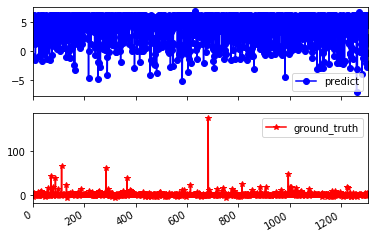

In [99]:
p = dfresult[['predict','ground_truth']].plot(subplots = True, style=['b-o','r-*'])
plt.show()

In [ ]:
#Seems not that accurate maybe need more .